# <font color='purple'>Preprocessing QC statistics </font> 
## Noam, July 2023


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
MOMAPS_HOME = '/home/labs/hornsteinlab/Collaboration/MOmaps_Noam/MOmaps'
MOMAPS_DATA_HOME = '/home/labs/hornsteinlab/Collaboration/MOmaps'
LOGS_PATH = os.path.join(MOMAPS_DATA_HOME, 'src', 'preprocessing', 'logs')
PLOT_PATH = os.path.join(MOMAPS_HOME, 'src', 'preprocessing', 'notebooks','figures','Neurons')
os.chdir(MOMAPS_HOME)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1.5)
sns.color_palette("husl", 8)
plt.rcParams["image.cmap"] = "Set1"
from tqdm.notebook import tqdm
from src.common.lib.preprocessing_utils import rescale_intensity
from src.common.lib.images_qc import *
#sys.path.insert(1, "/home/labs/hornsteinlab/Collaboration/MOmaps_Sagy/MOmaps/src/common/lib")
import contextlib
import io
import matplotlib
import warnings
warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)
from src.common.lib.qc_config_tmp import *
from src.common.lib.image_sampling_utils import *

In [12]:
df = log_files_qc(LOGS_PATH)


Total of 14 files were read.
Before dup handeling  (157248, 20)
After duplication removal #1: (137837, 21)
After duplication removal #2: (136396, 21)


## validate folder structure and files existence

In [4]:
# choose batches
batches = [f'batch{i}' for i in range (3,7)] + ['batch7_16bit','batch8_16bit','batch9_16bit']
#batches=['batch7']

### Raw Files

batch3
Folder structure is invalid. Missing paths:
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/batch3/FUSHomozygous/panelA
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/batch3/FUSHomozygous/panelB
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/batch3/FUSHomozygous/panelC
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/batch3/TDP43/panelA
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/batch3/TDP43/panelB
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/batch3/TDP43/panelC
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/batch3/TBK1/panelA
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/batch3/TBK1/panelB
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/batch3/TBK1/panelC
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDis

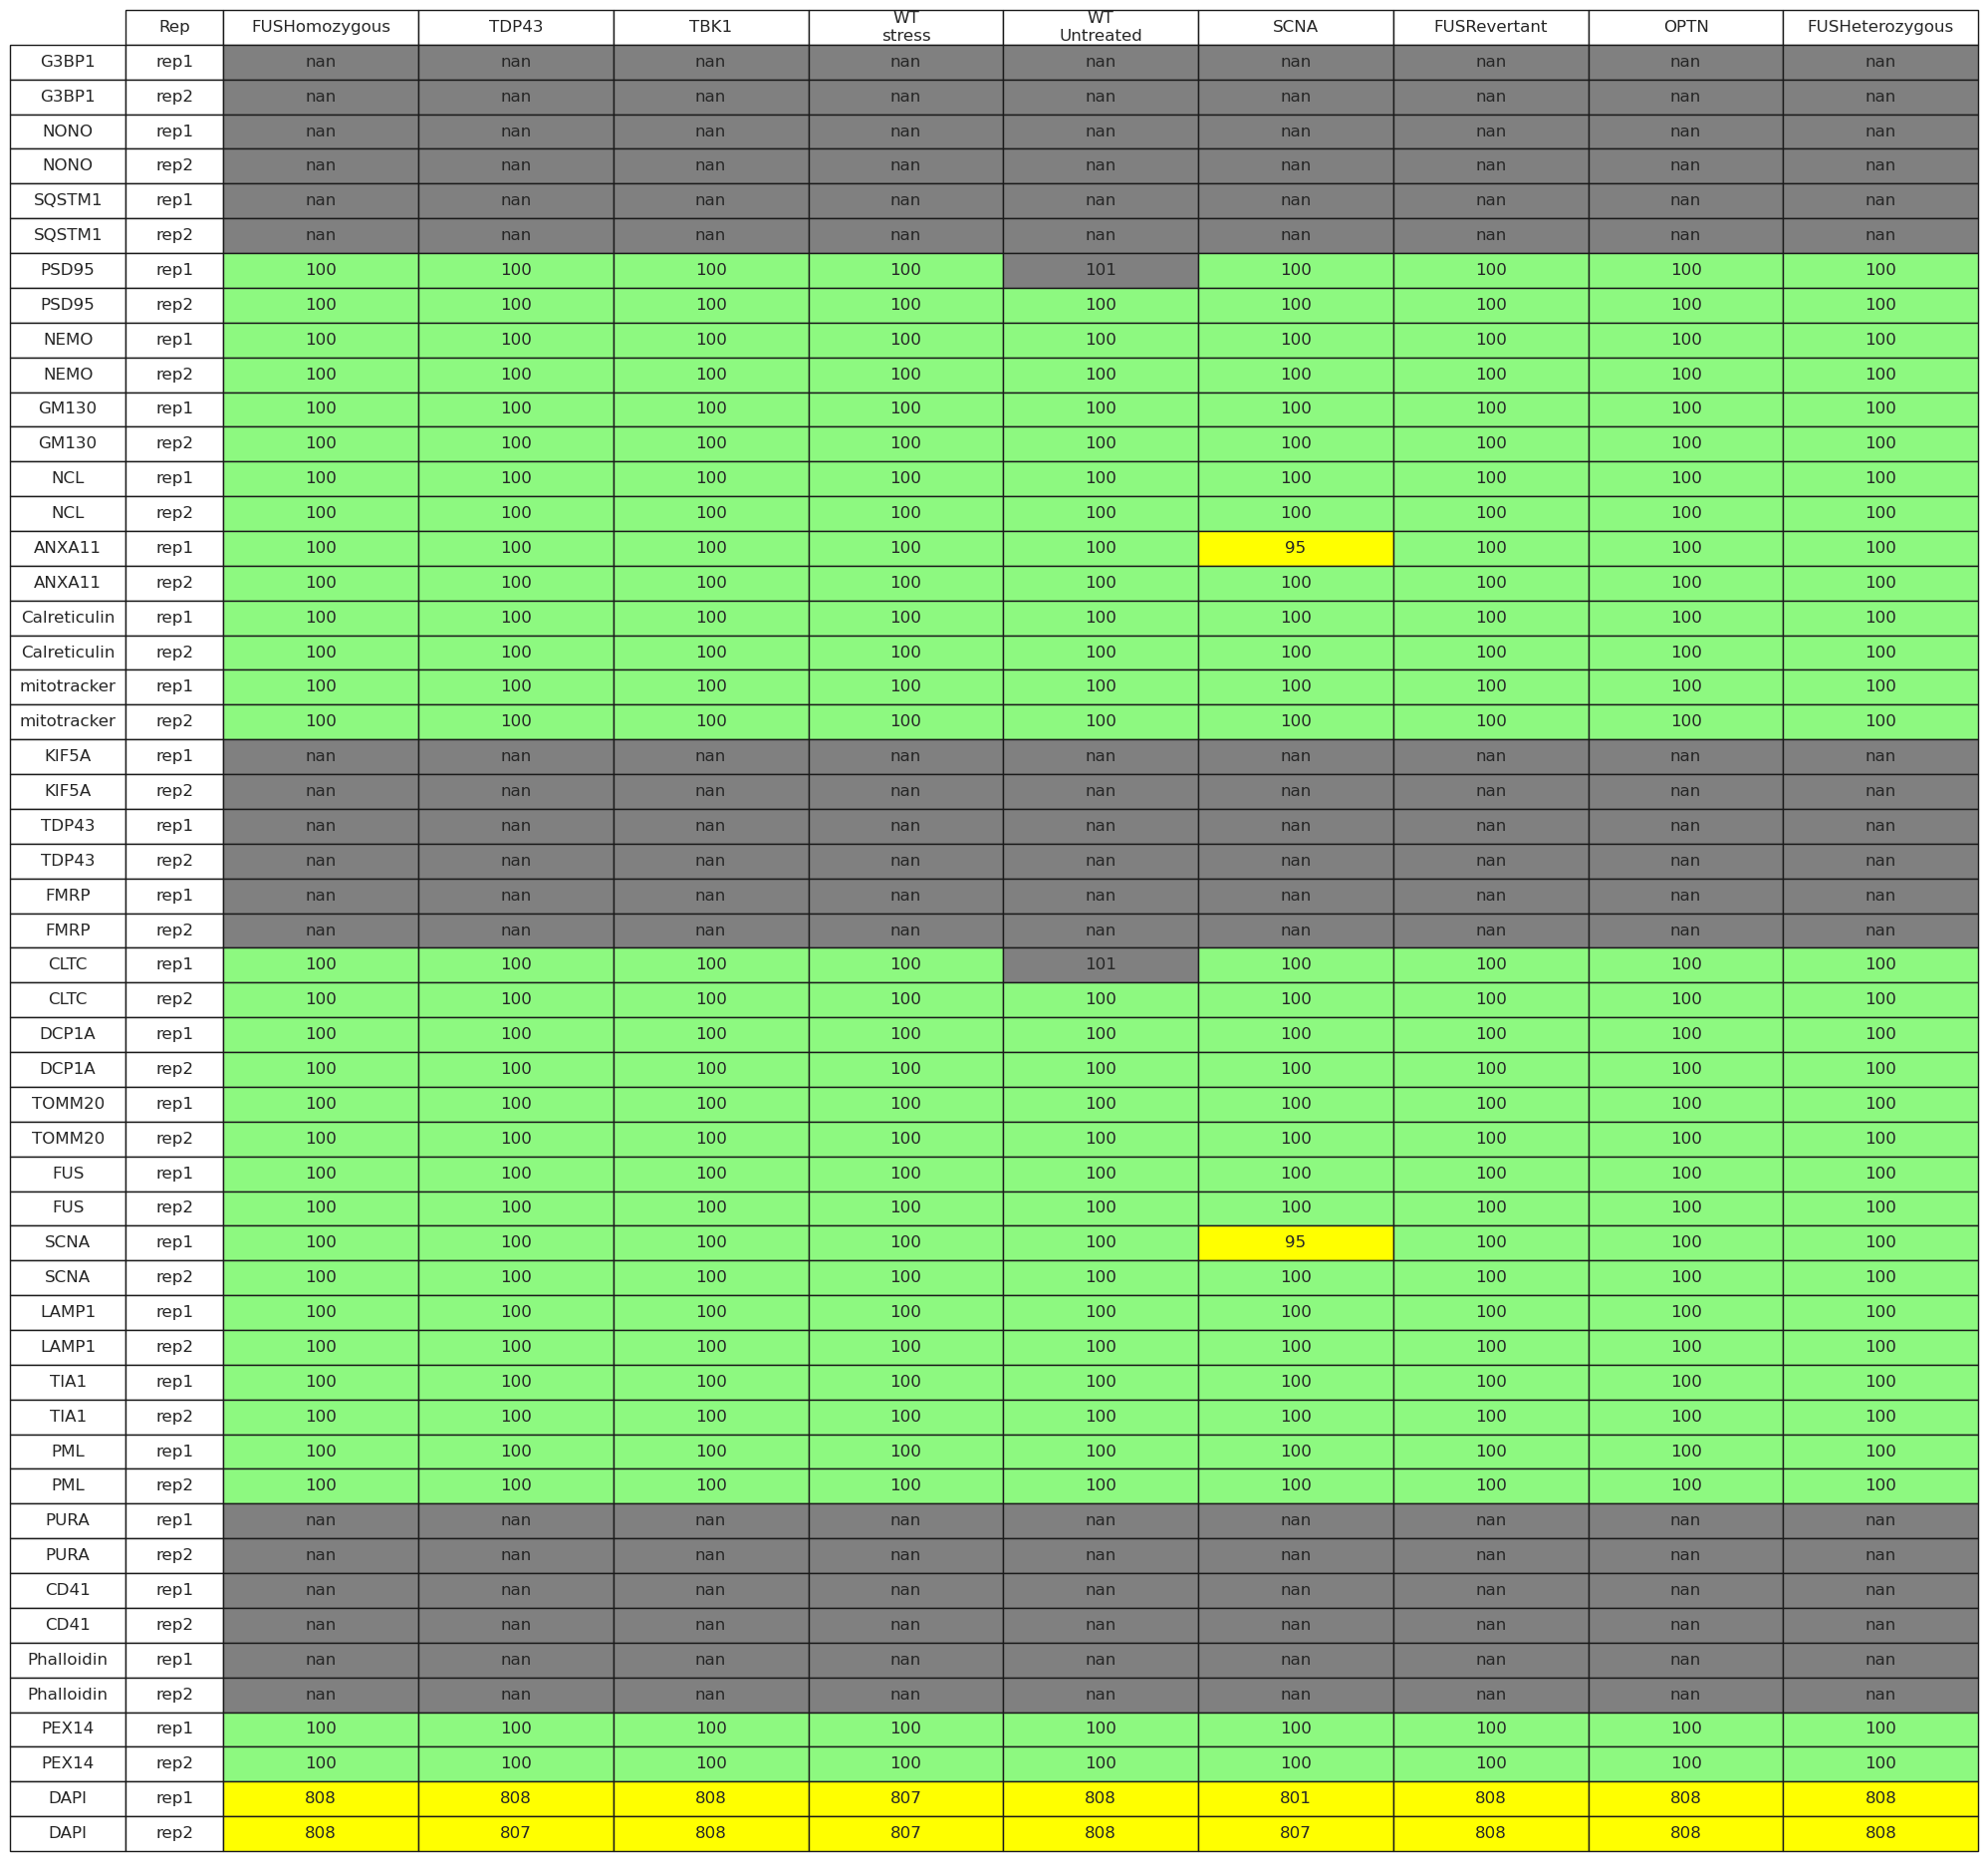

batch4
Folder structure is valid.
All files exists.
Total Sites:  64800


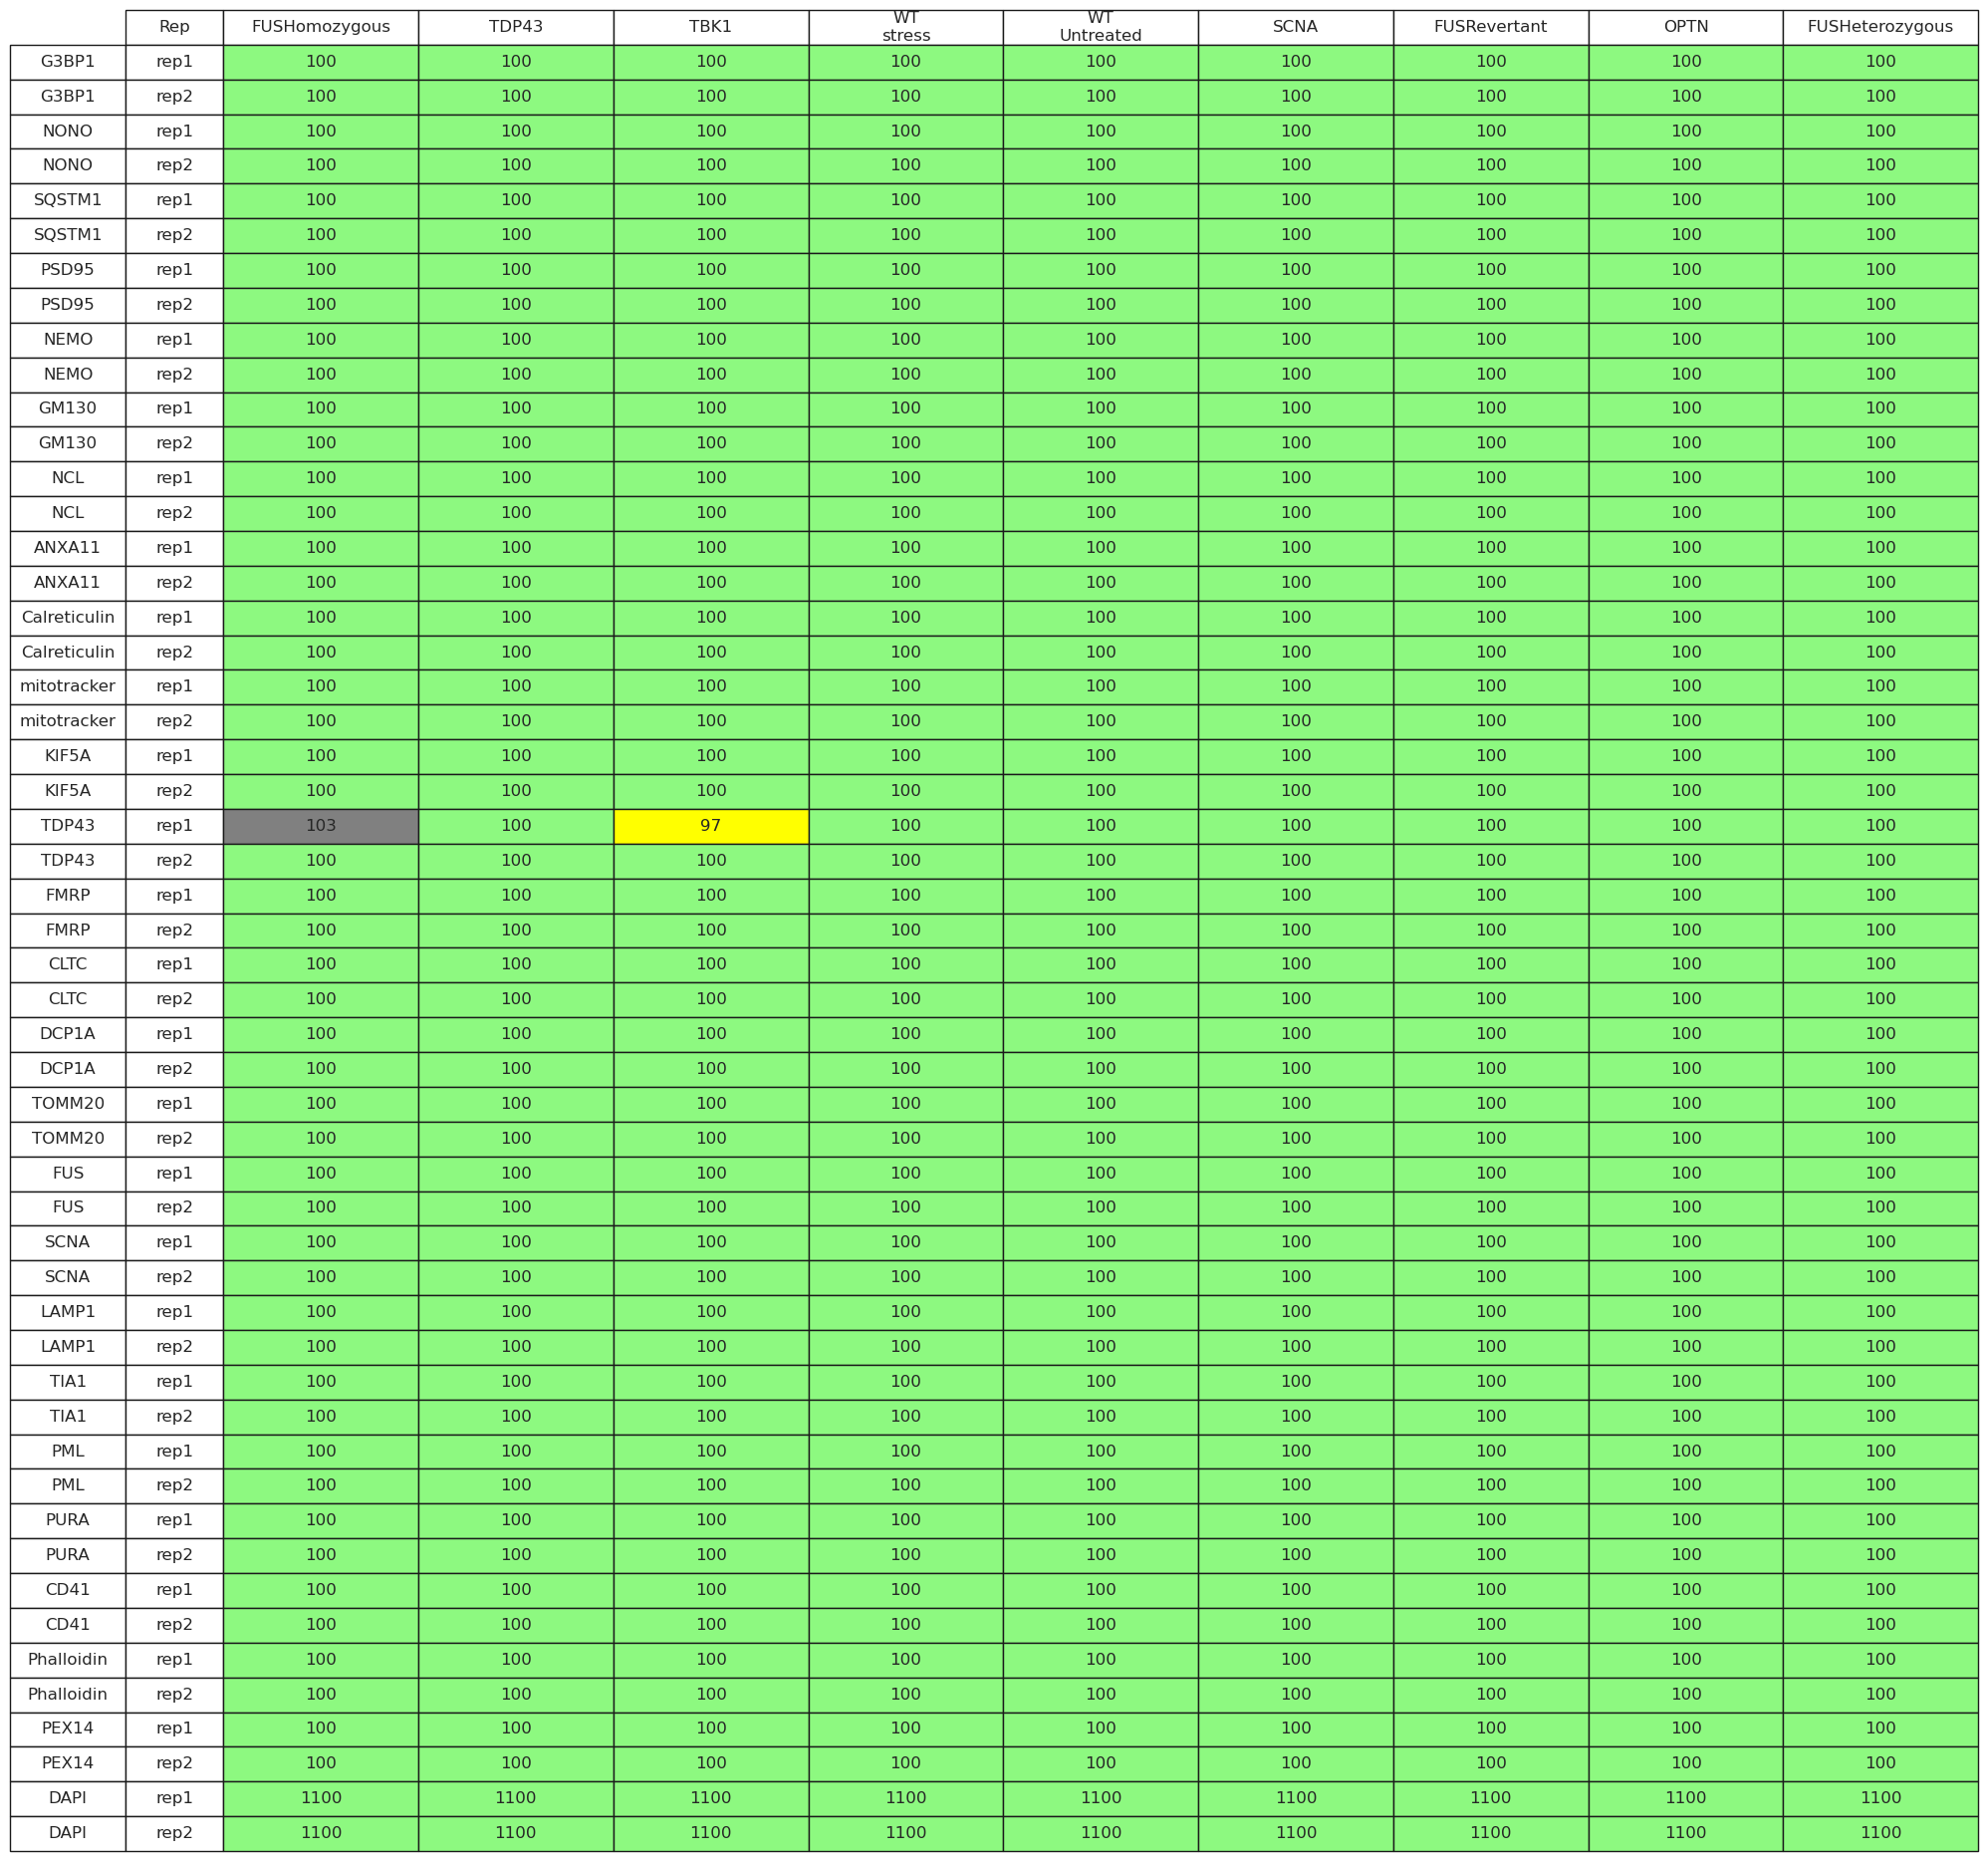

batch5
Folder structure is valid.
All files exists.
Total Sites:  64800


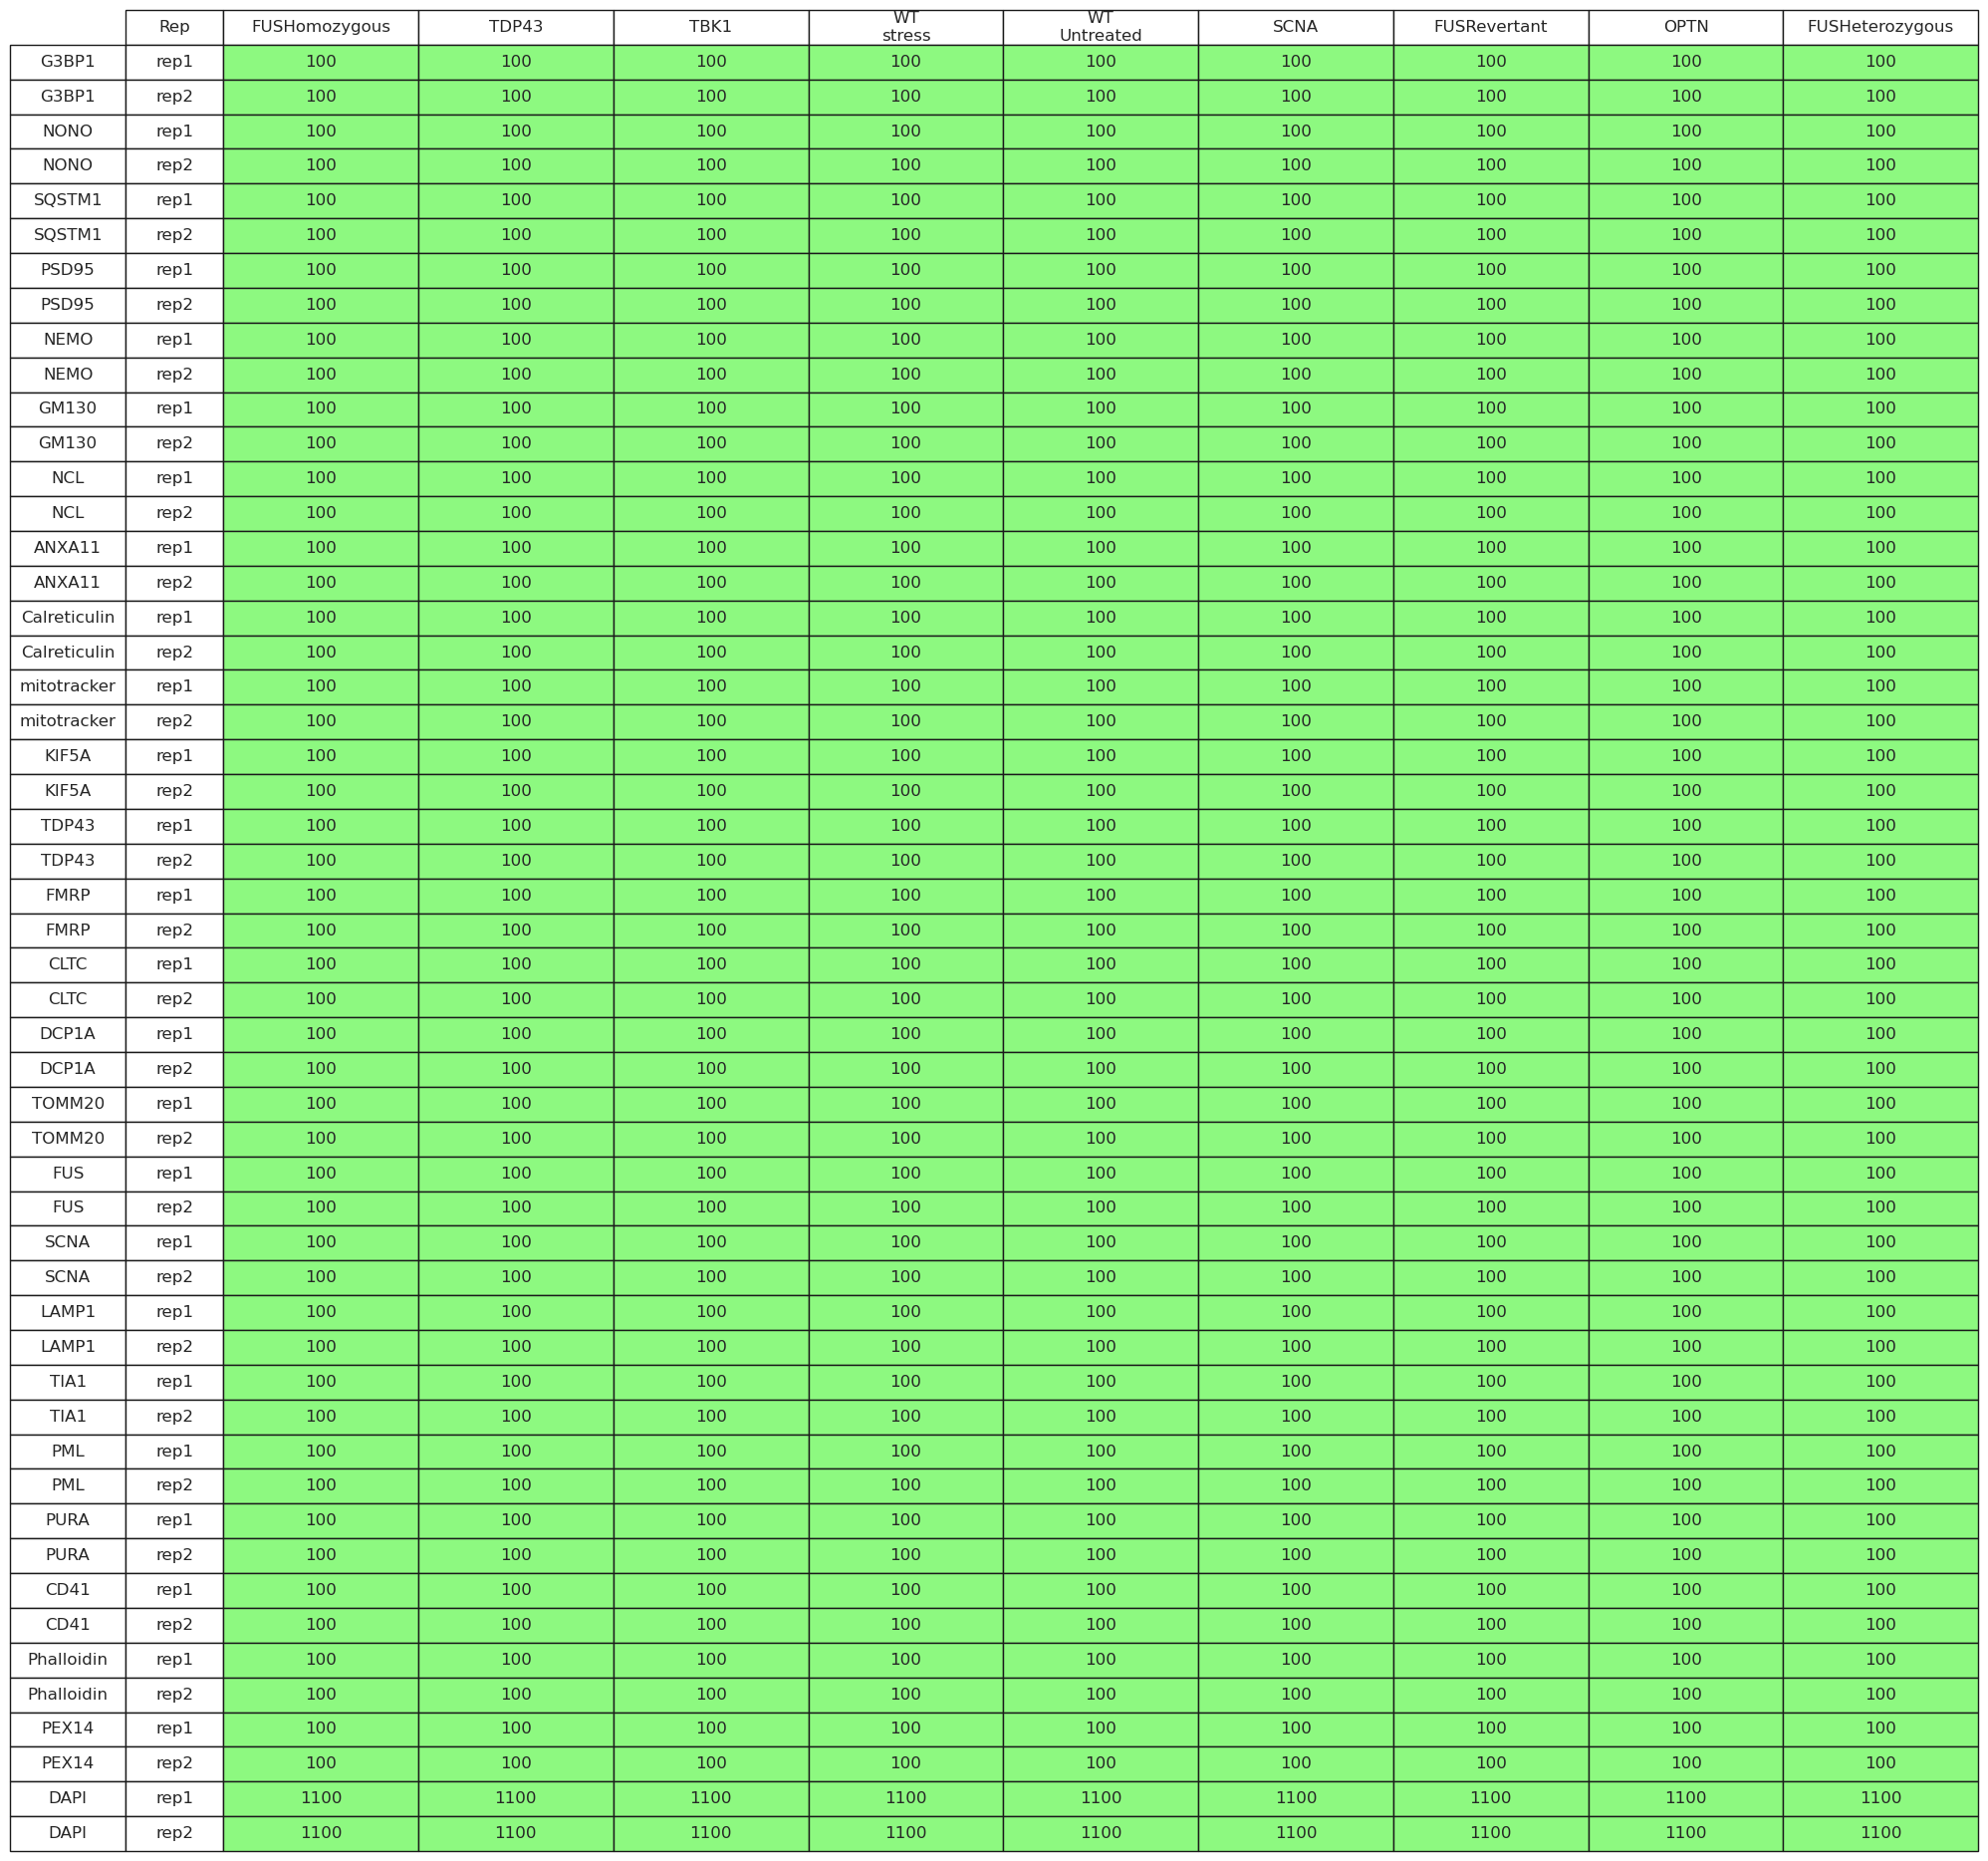

batch6
Folder structure is valid.
All files exists.
Total Sites:  64800


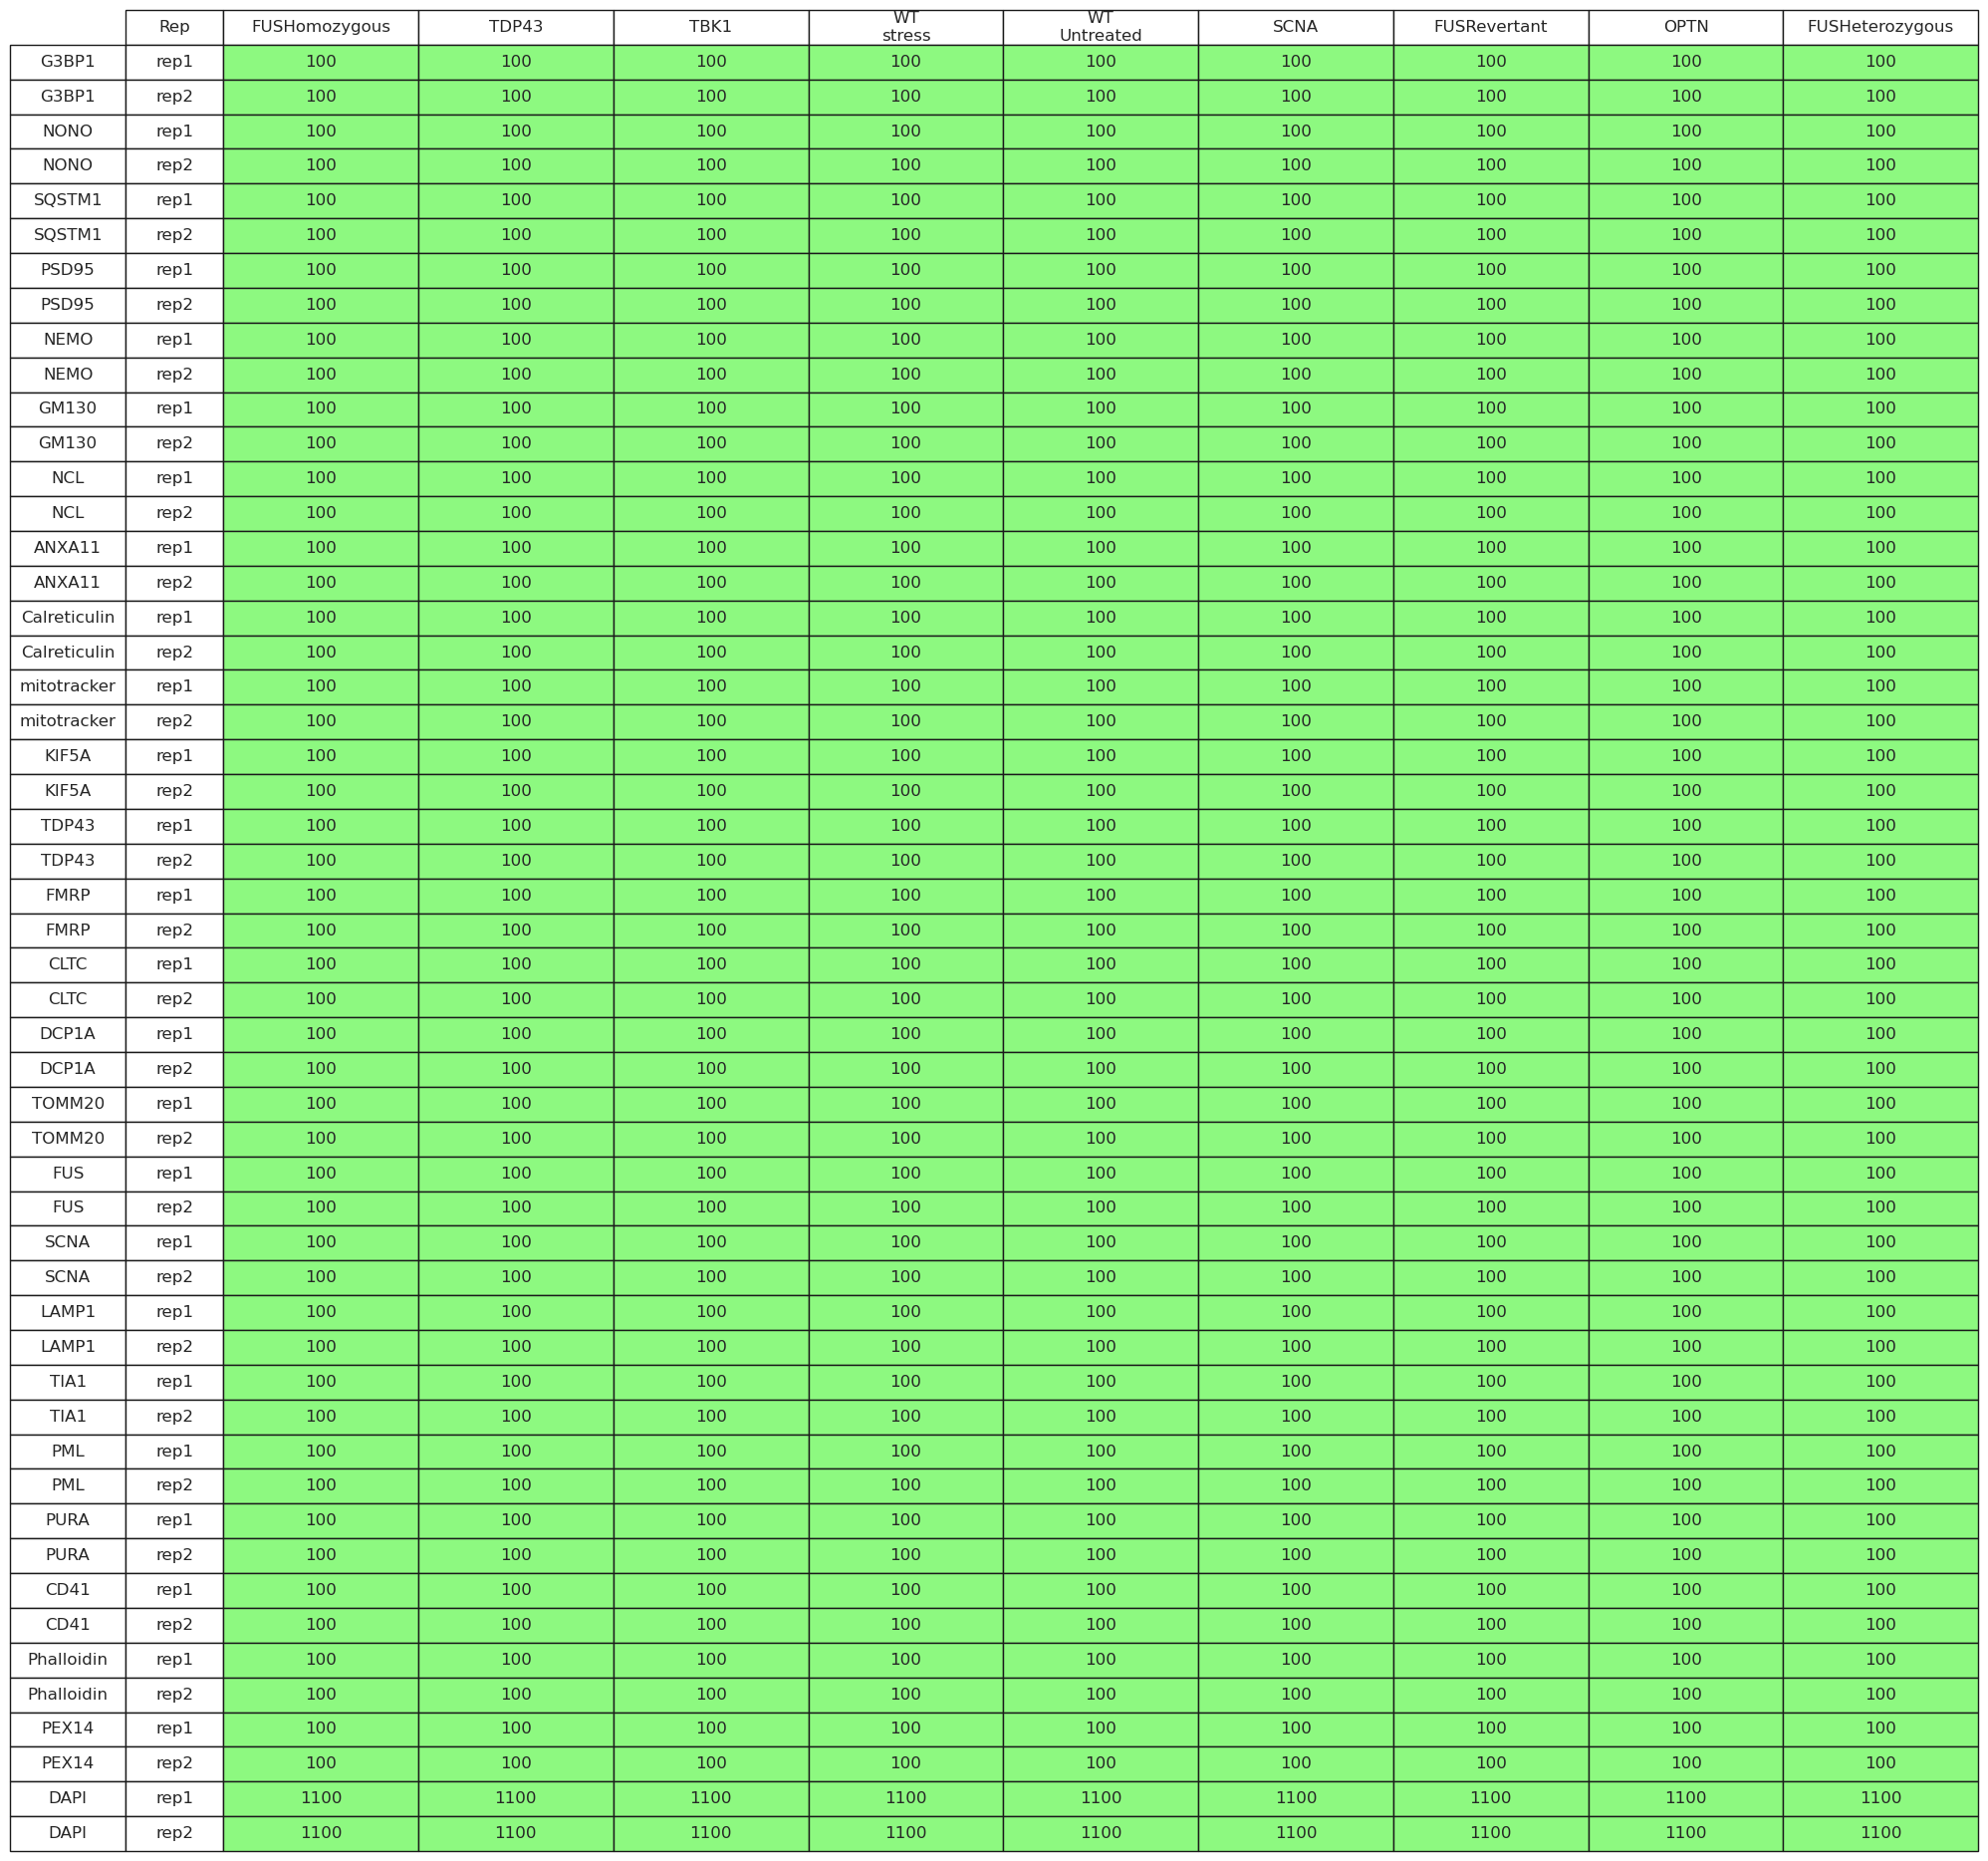

batch7
Folder structure is valid.
All files exists.
Total Sites:  64800


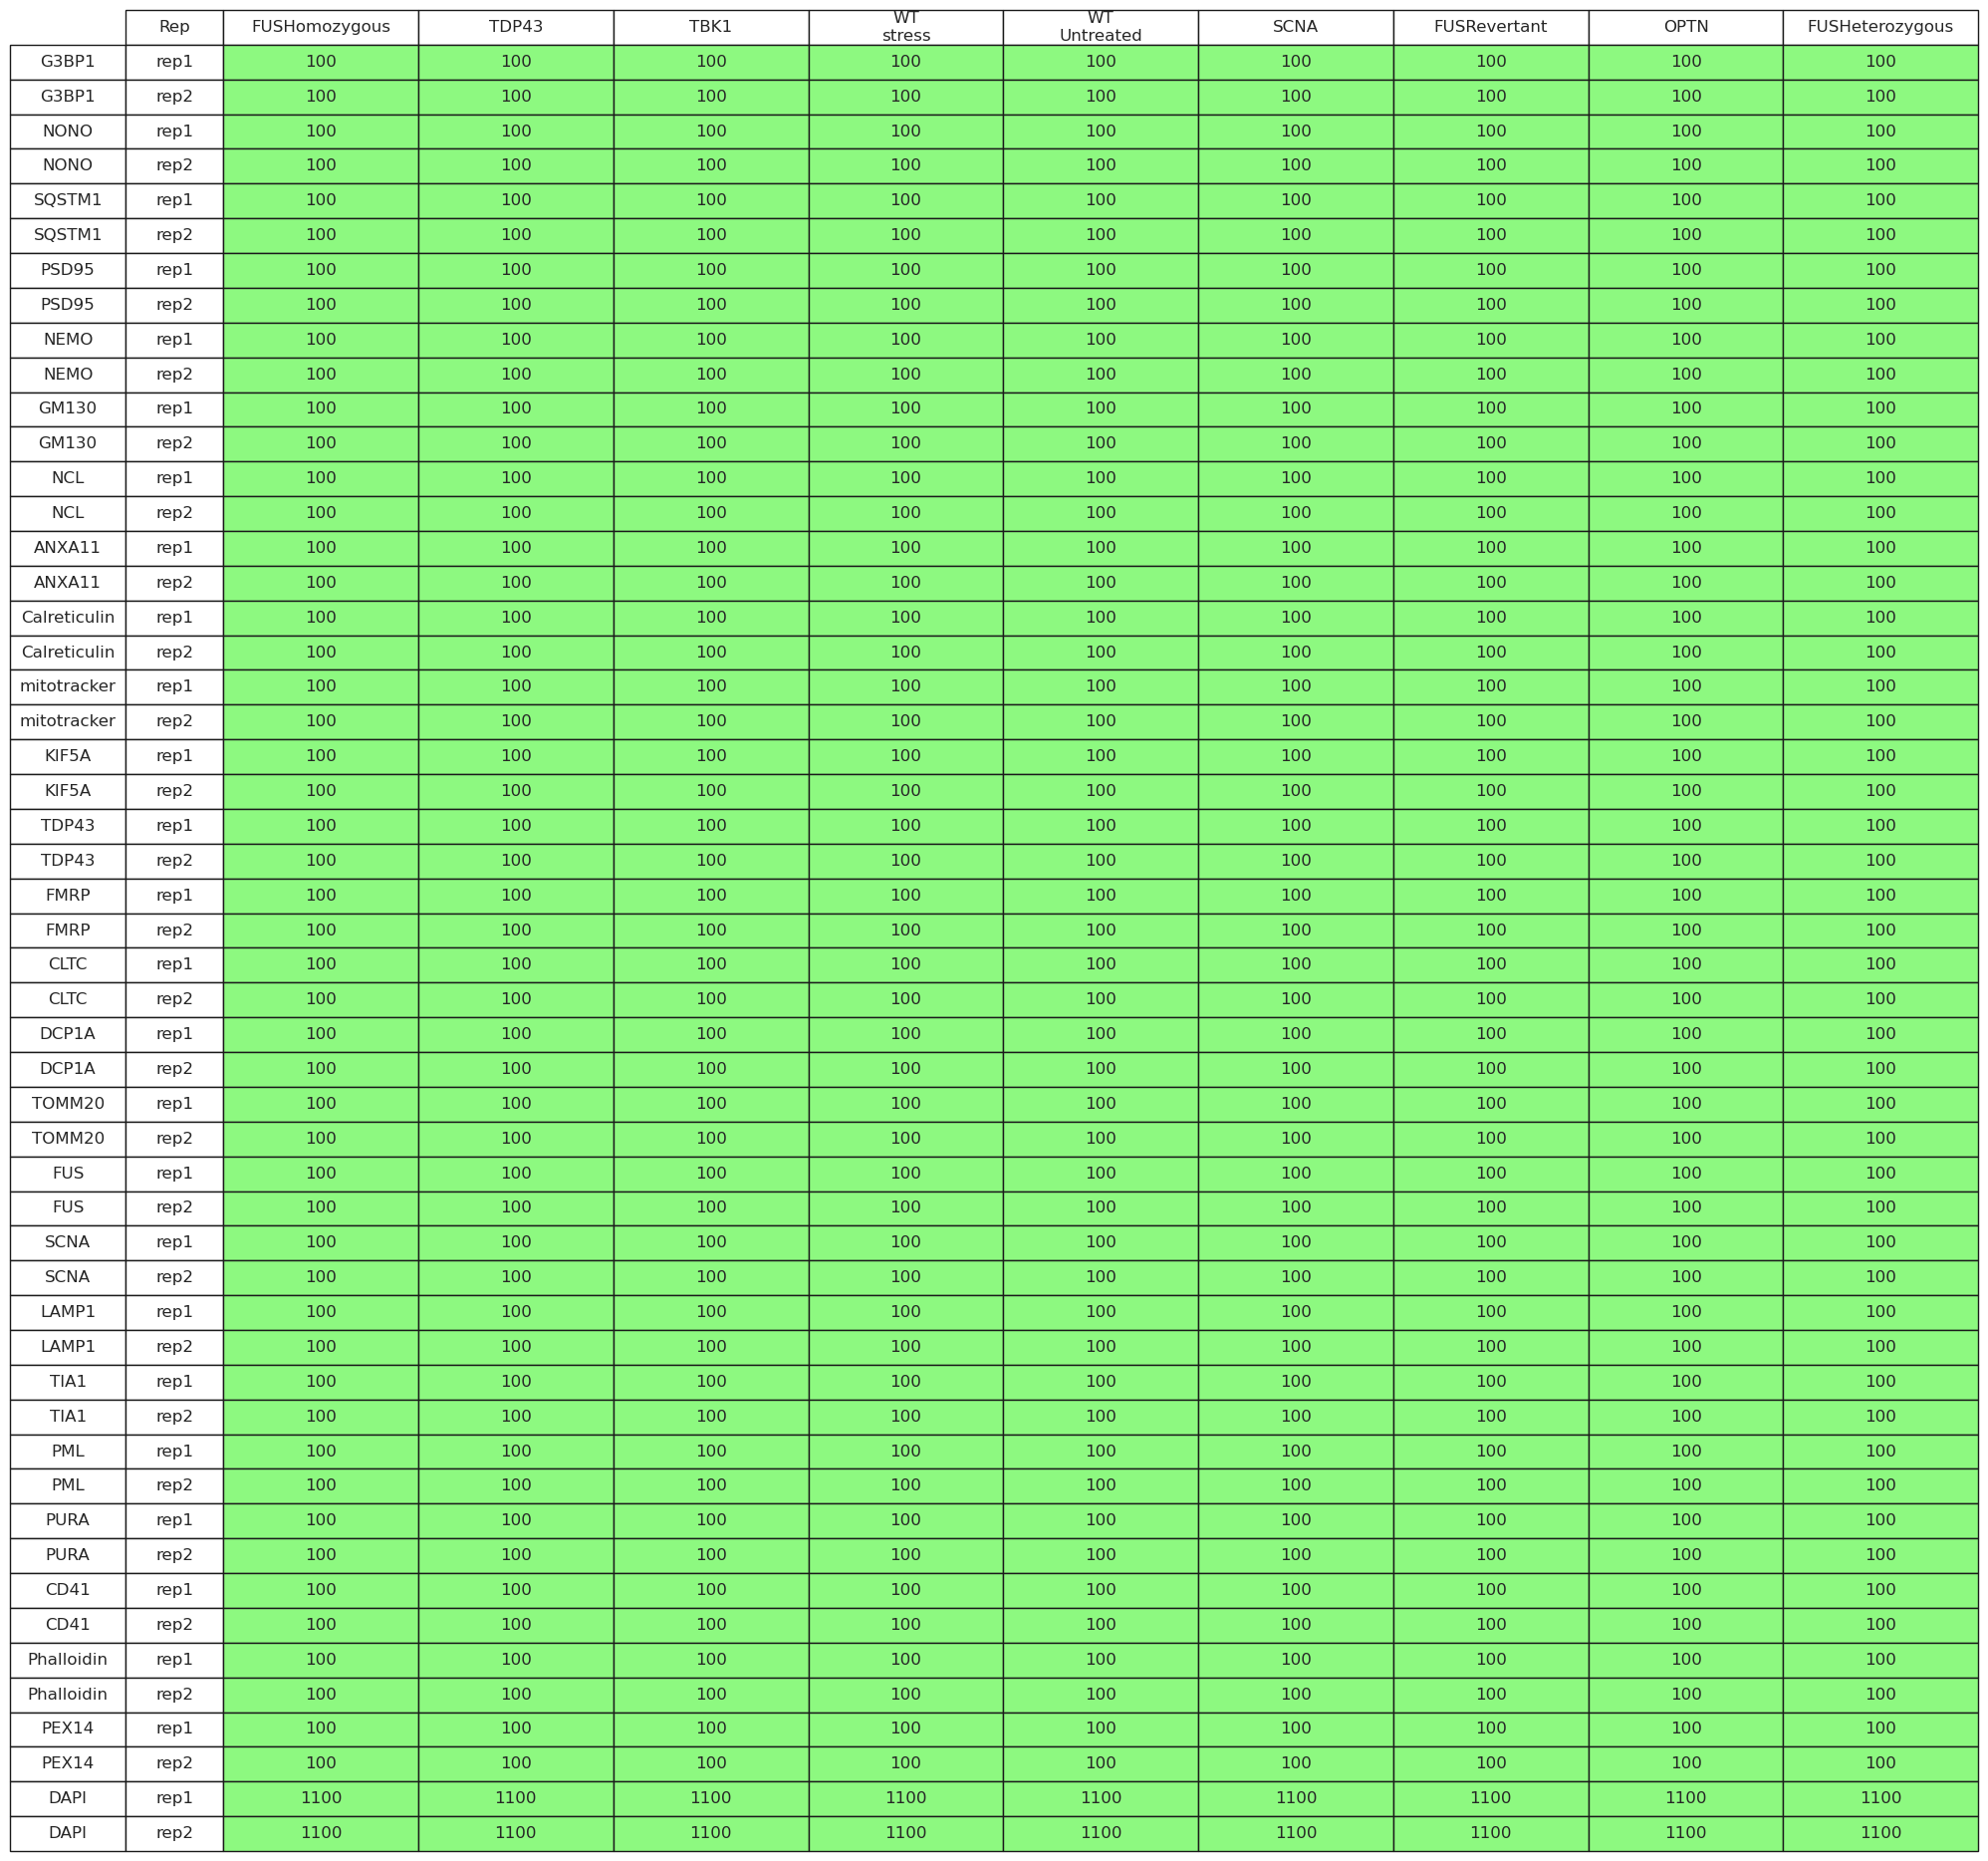

batch8
Folder structure is valid.
All files exists.
Total Sites:  64800


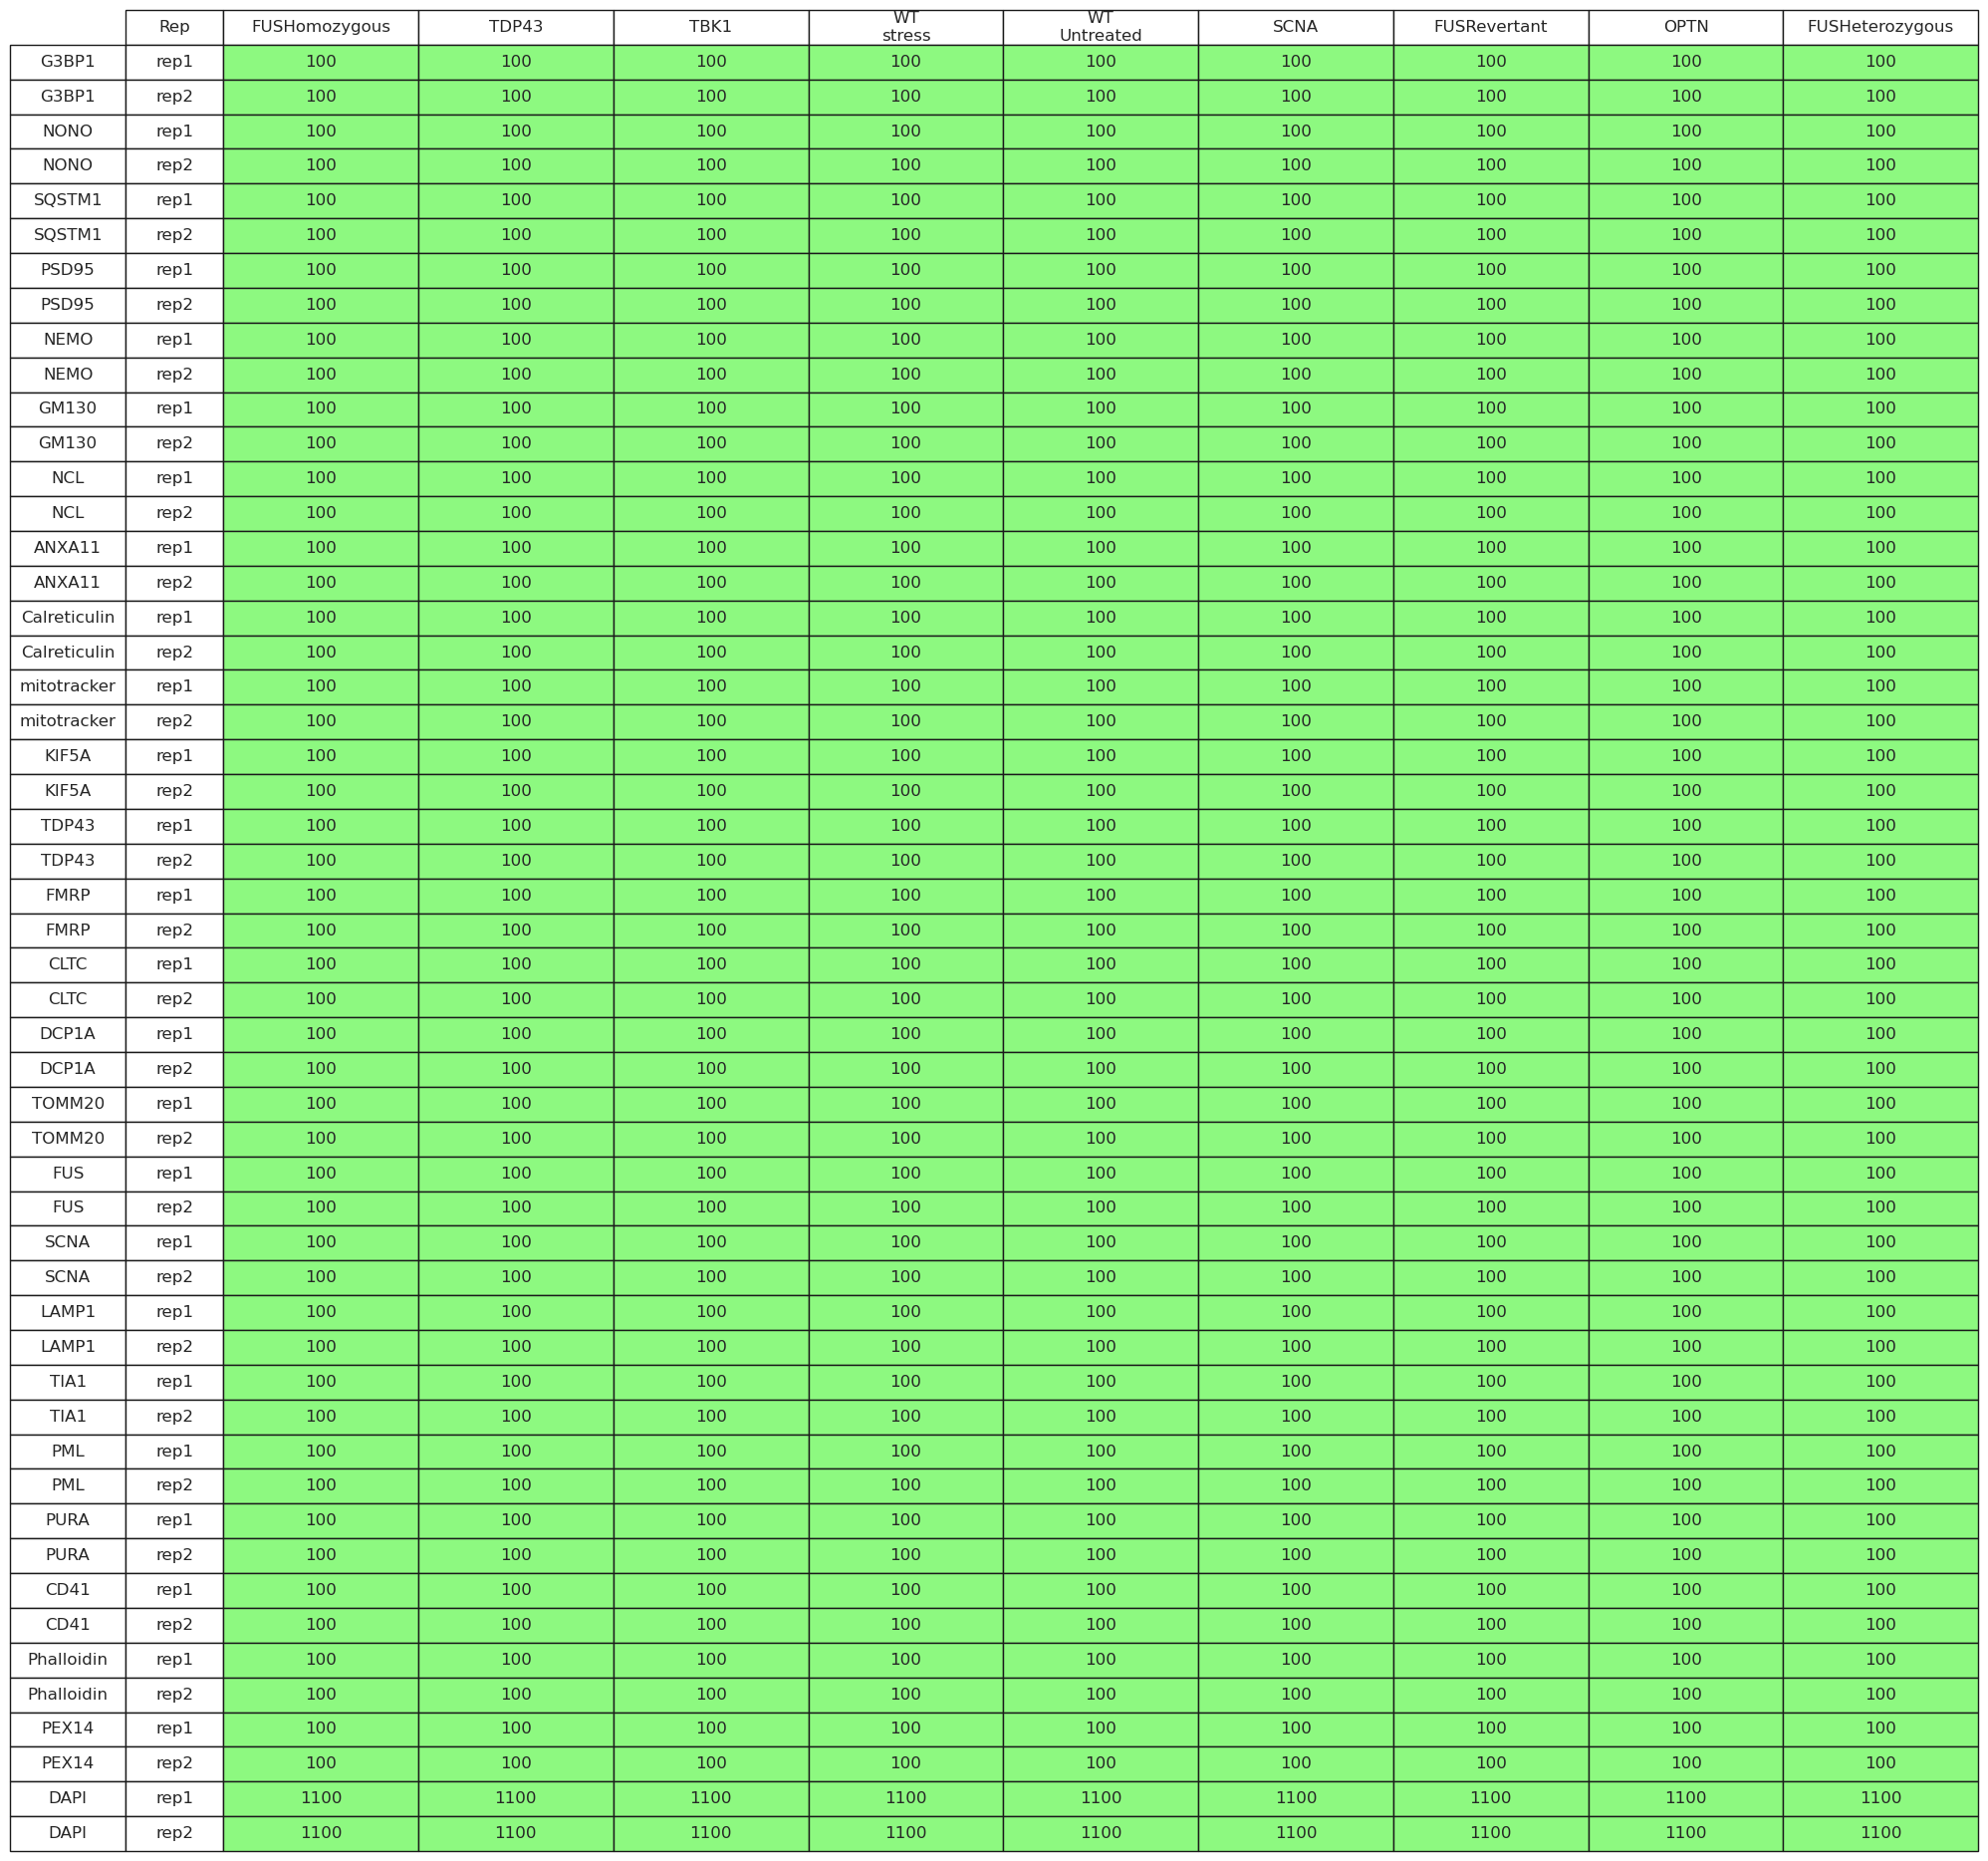

batch9
Folder structure is valid.
All files exists.
Total Sites:  64800


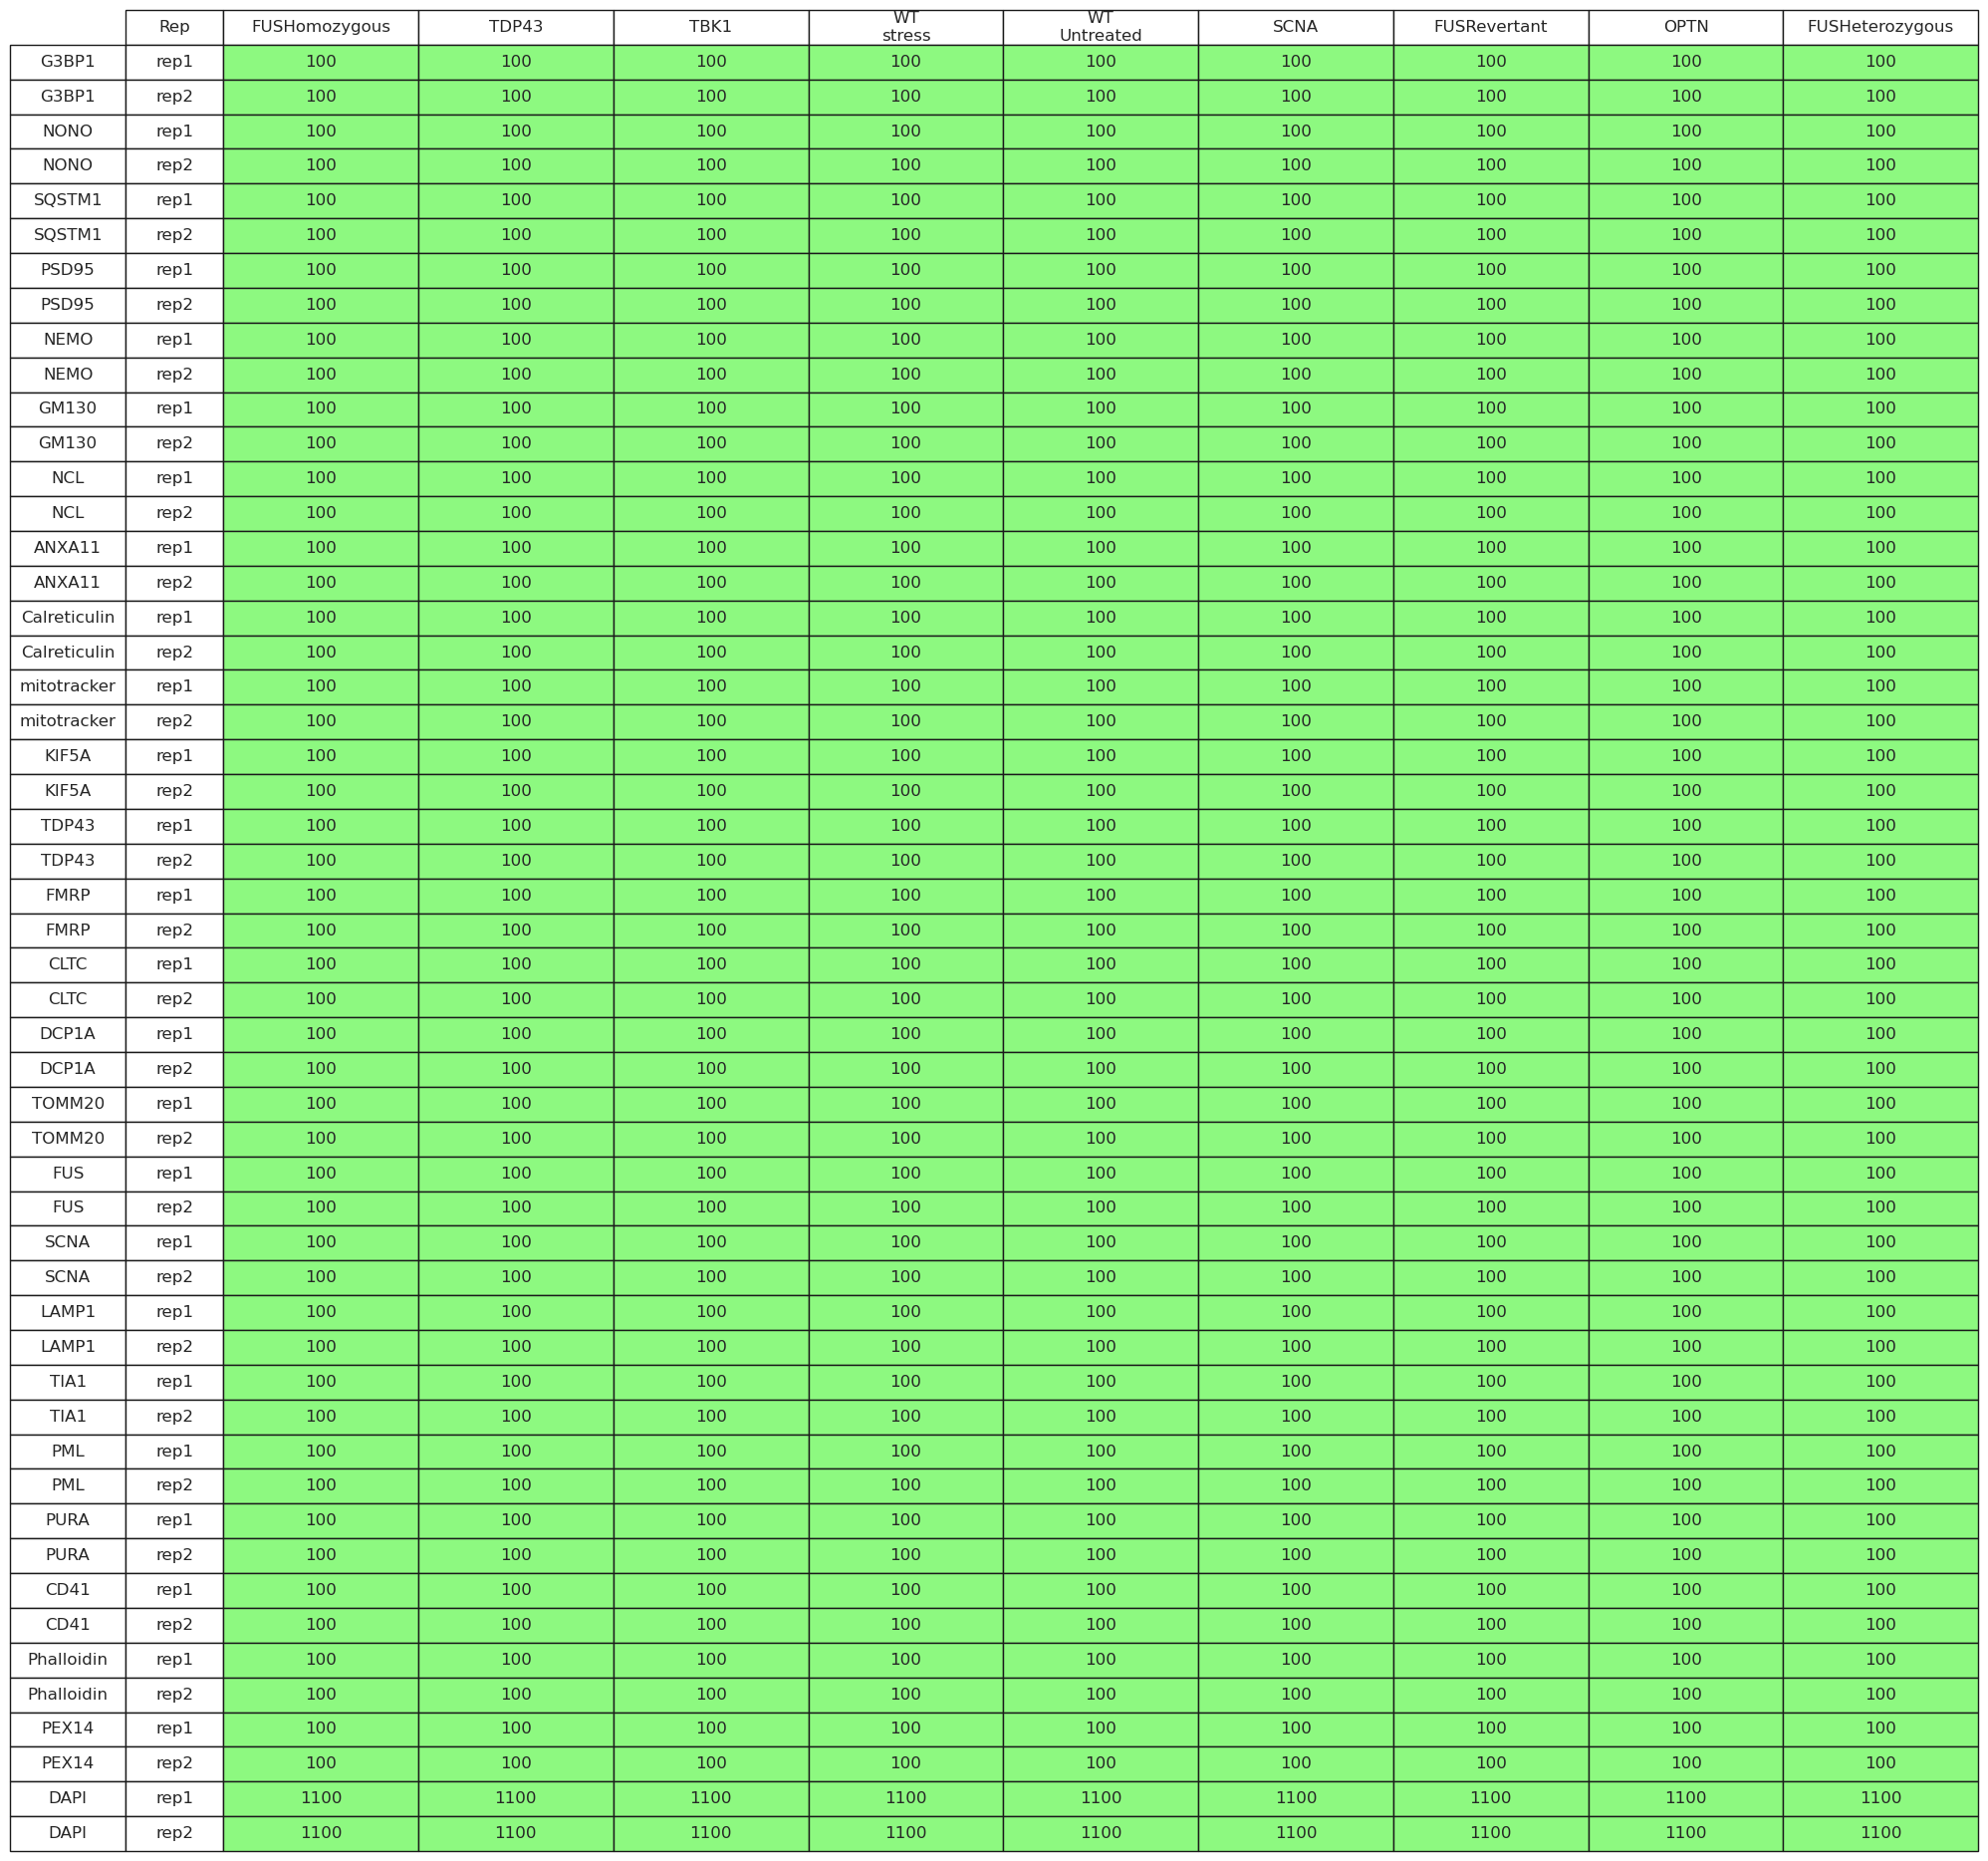

In [5]:

root_directory_raw = os.path.join(MOMAPS_DATA_HOME, 'input', 'images', 'raw', 'SpinningDisk')

batches_raw = [batch.replace("_16bit","") for batch in batches]
raws = run_validate_folder_structure(root_directory_raw, False, panels, markers,PLOT_PATH,marker_info,
                                    cell_lines_to_cond, reps, cell_lines_for_disp, expected_dapi_raw,
                                     batches=batches_raw)

### Processed

batch3
Folder structure is invalid. Missing paths:
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch3/FUSHomozygous/Untreated/G3BP1
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch3/FUSHomozygous/Untreated/NONO
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch3/FUSHomozygous/Untreated/SQSTM1
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch3/FUSHomozygous/Untreated/KIF5A
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch3/FUSHomozygous/Untreated/TDP43
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch3/FUSHomozygous/Untreated/FMRP
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batch3/FUSHomozygous/Untreated/PURA
/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/batc

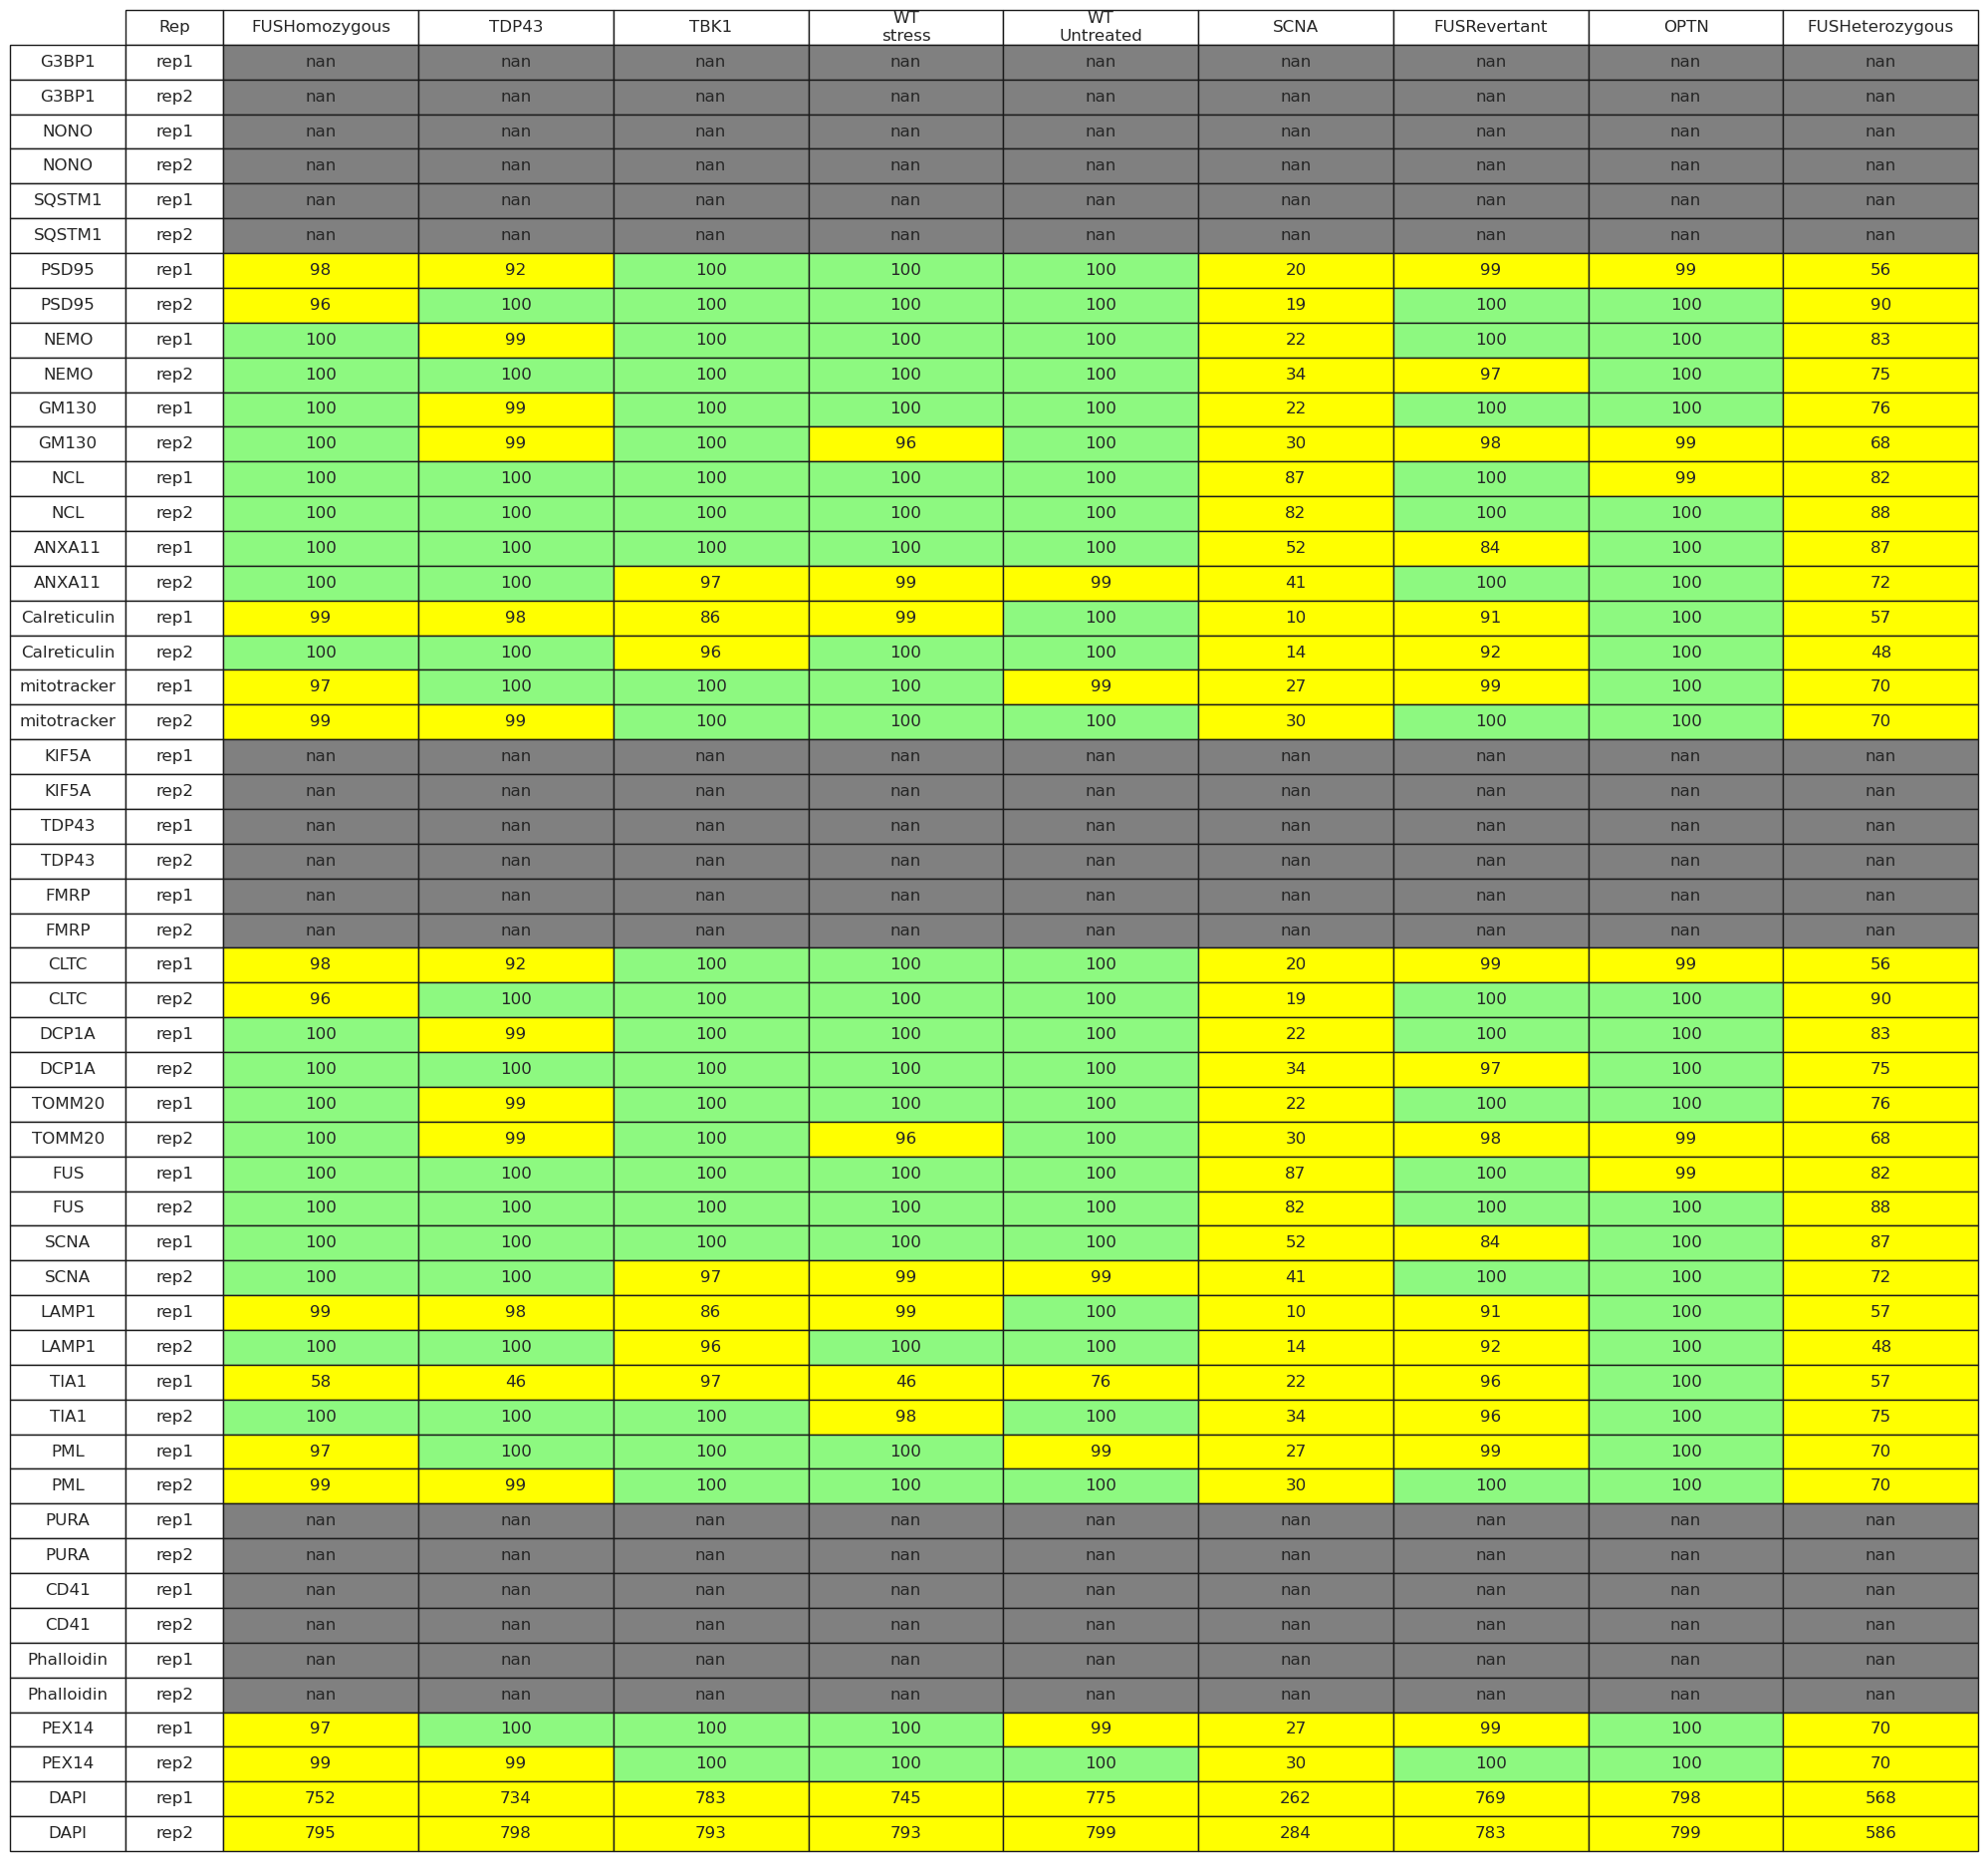

batch4
Folder structure is valid.
All files exists.
Total Sites:  53977


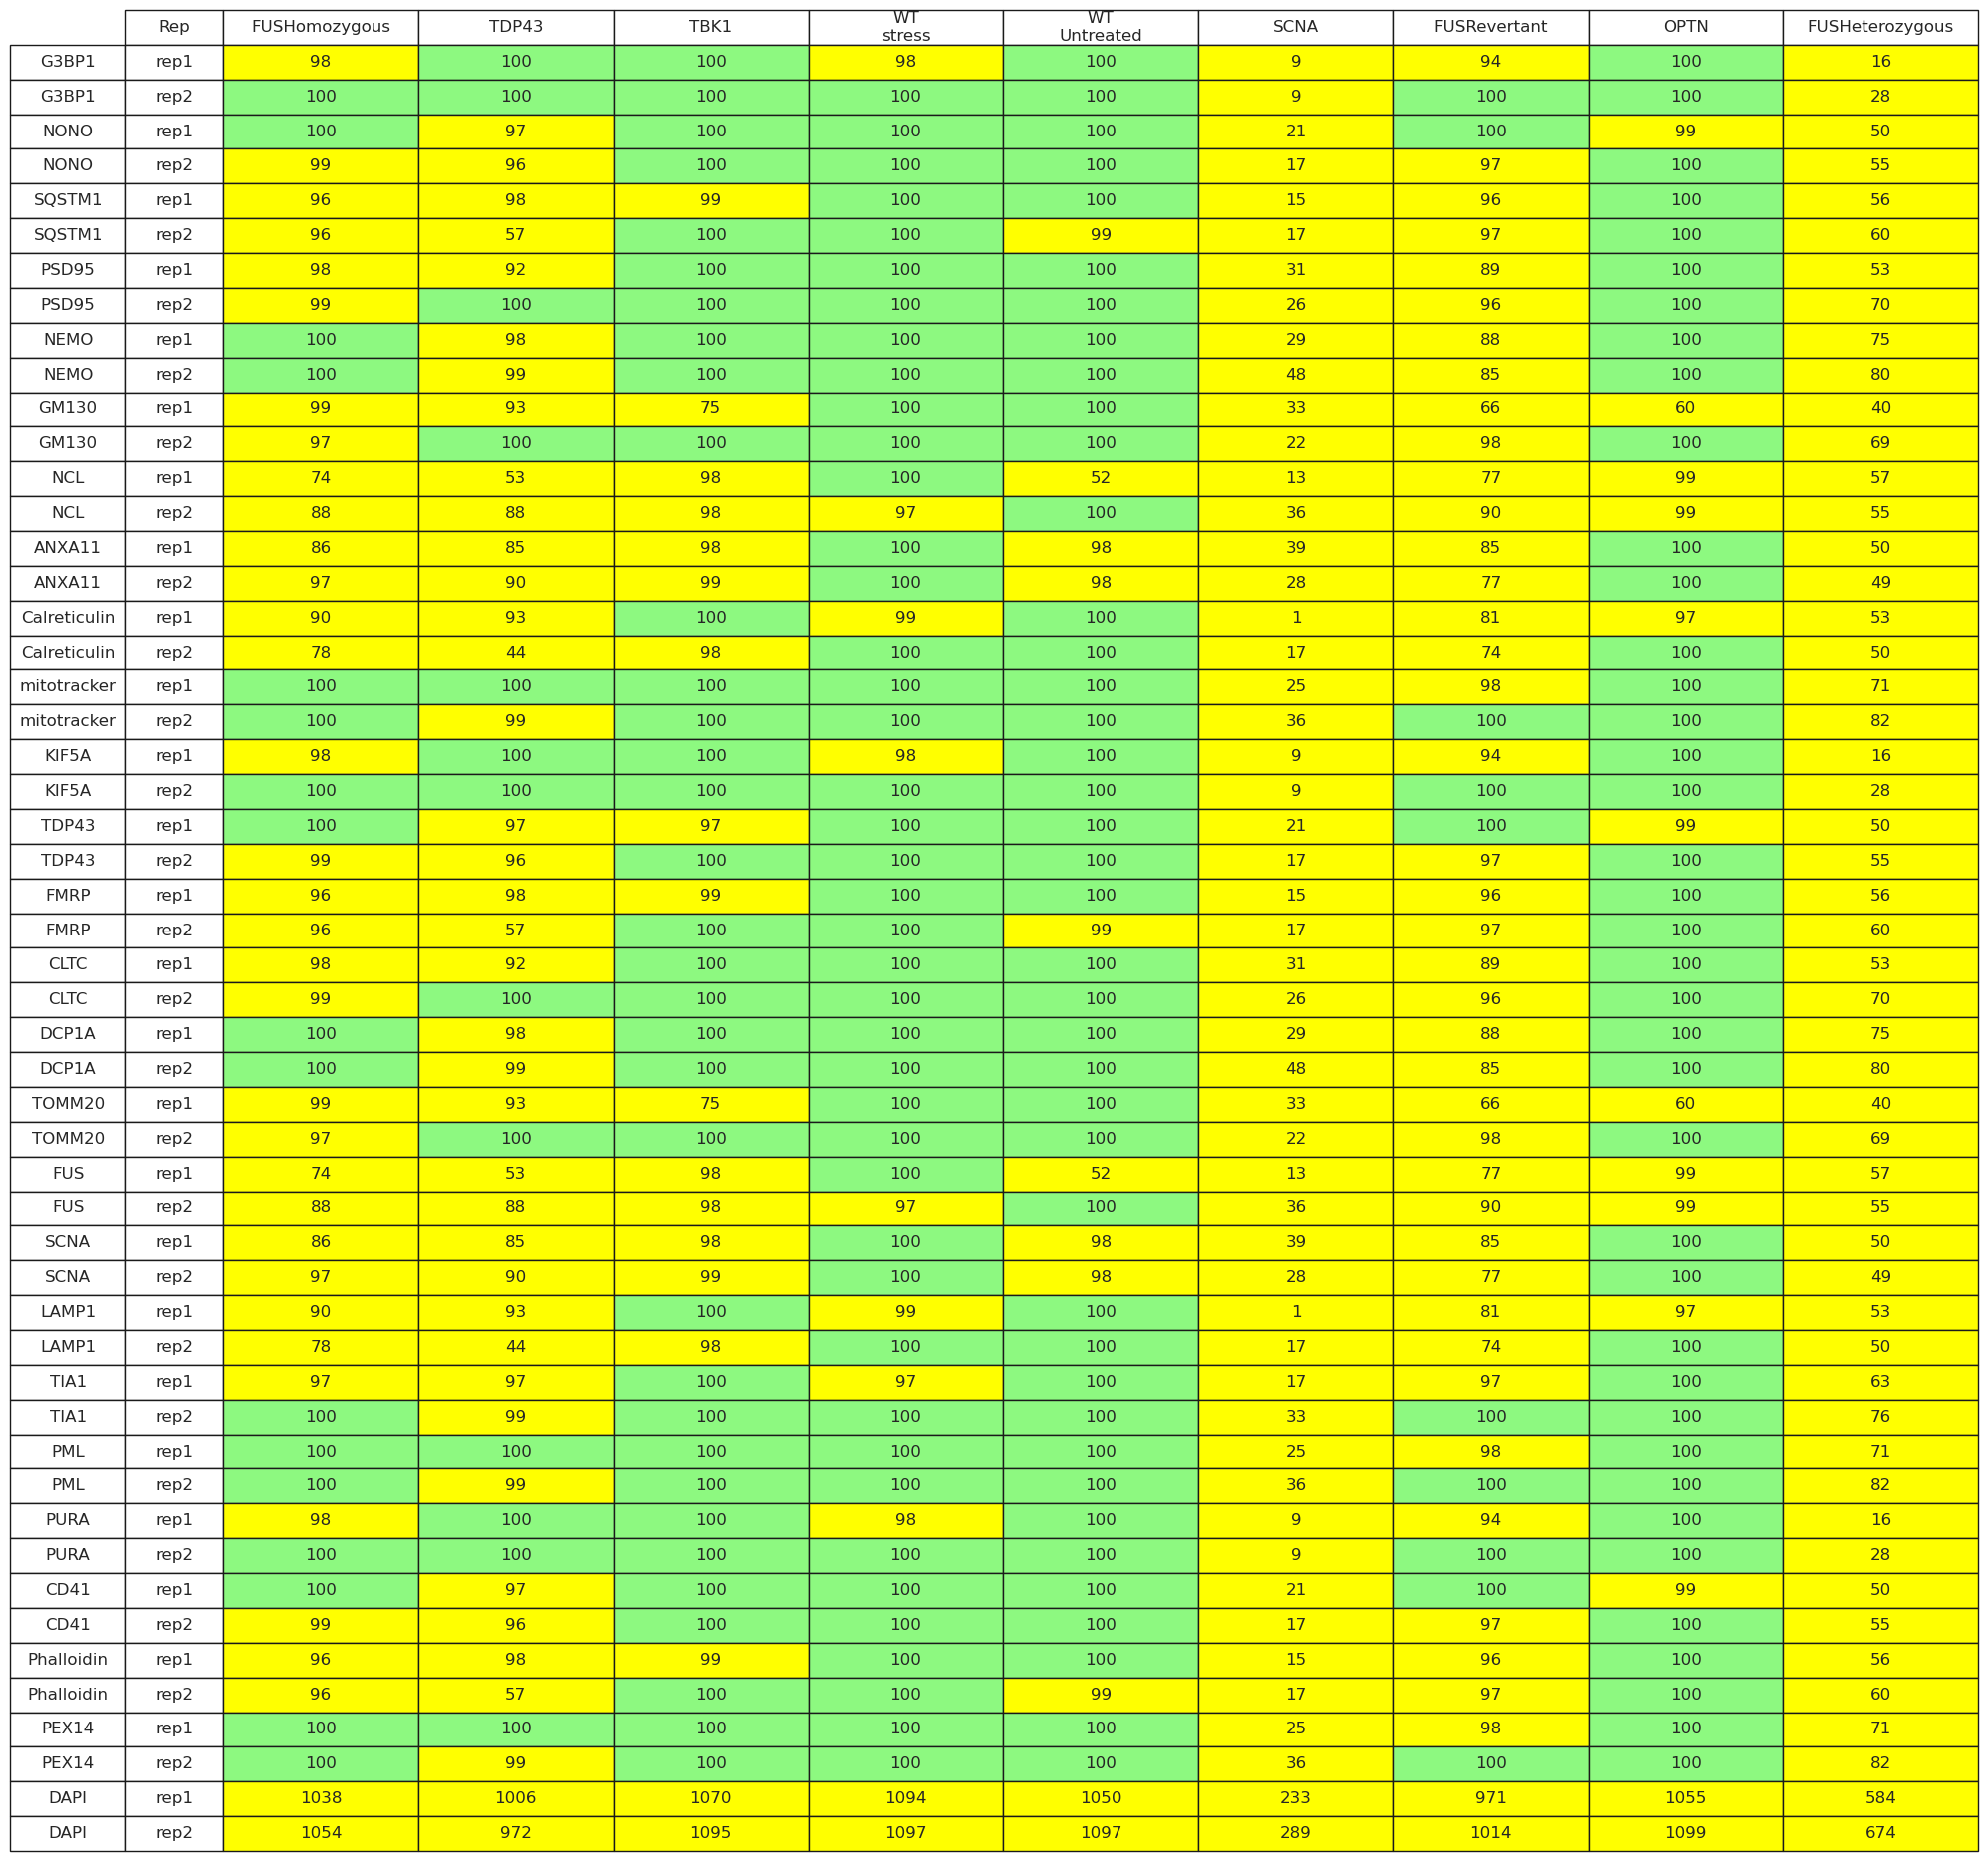

batch5
Folder structure is valid.
All files exists.
Total Sites:  54282


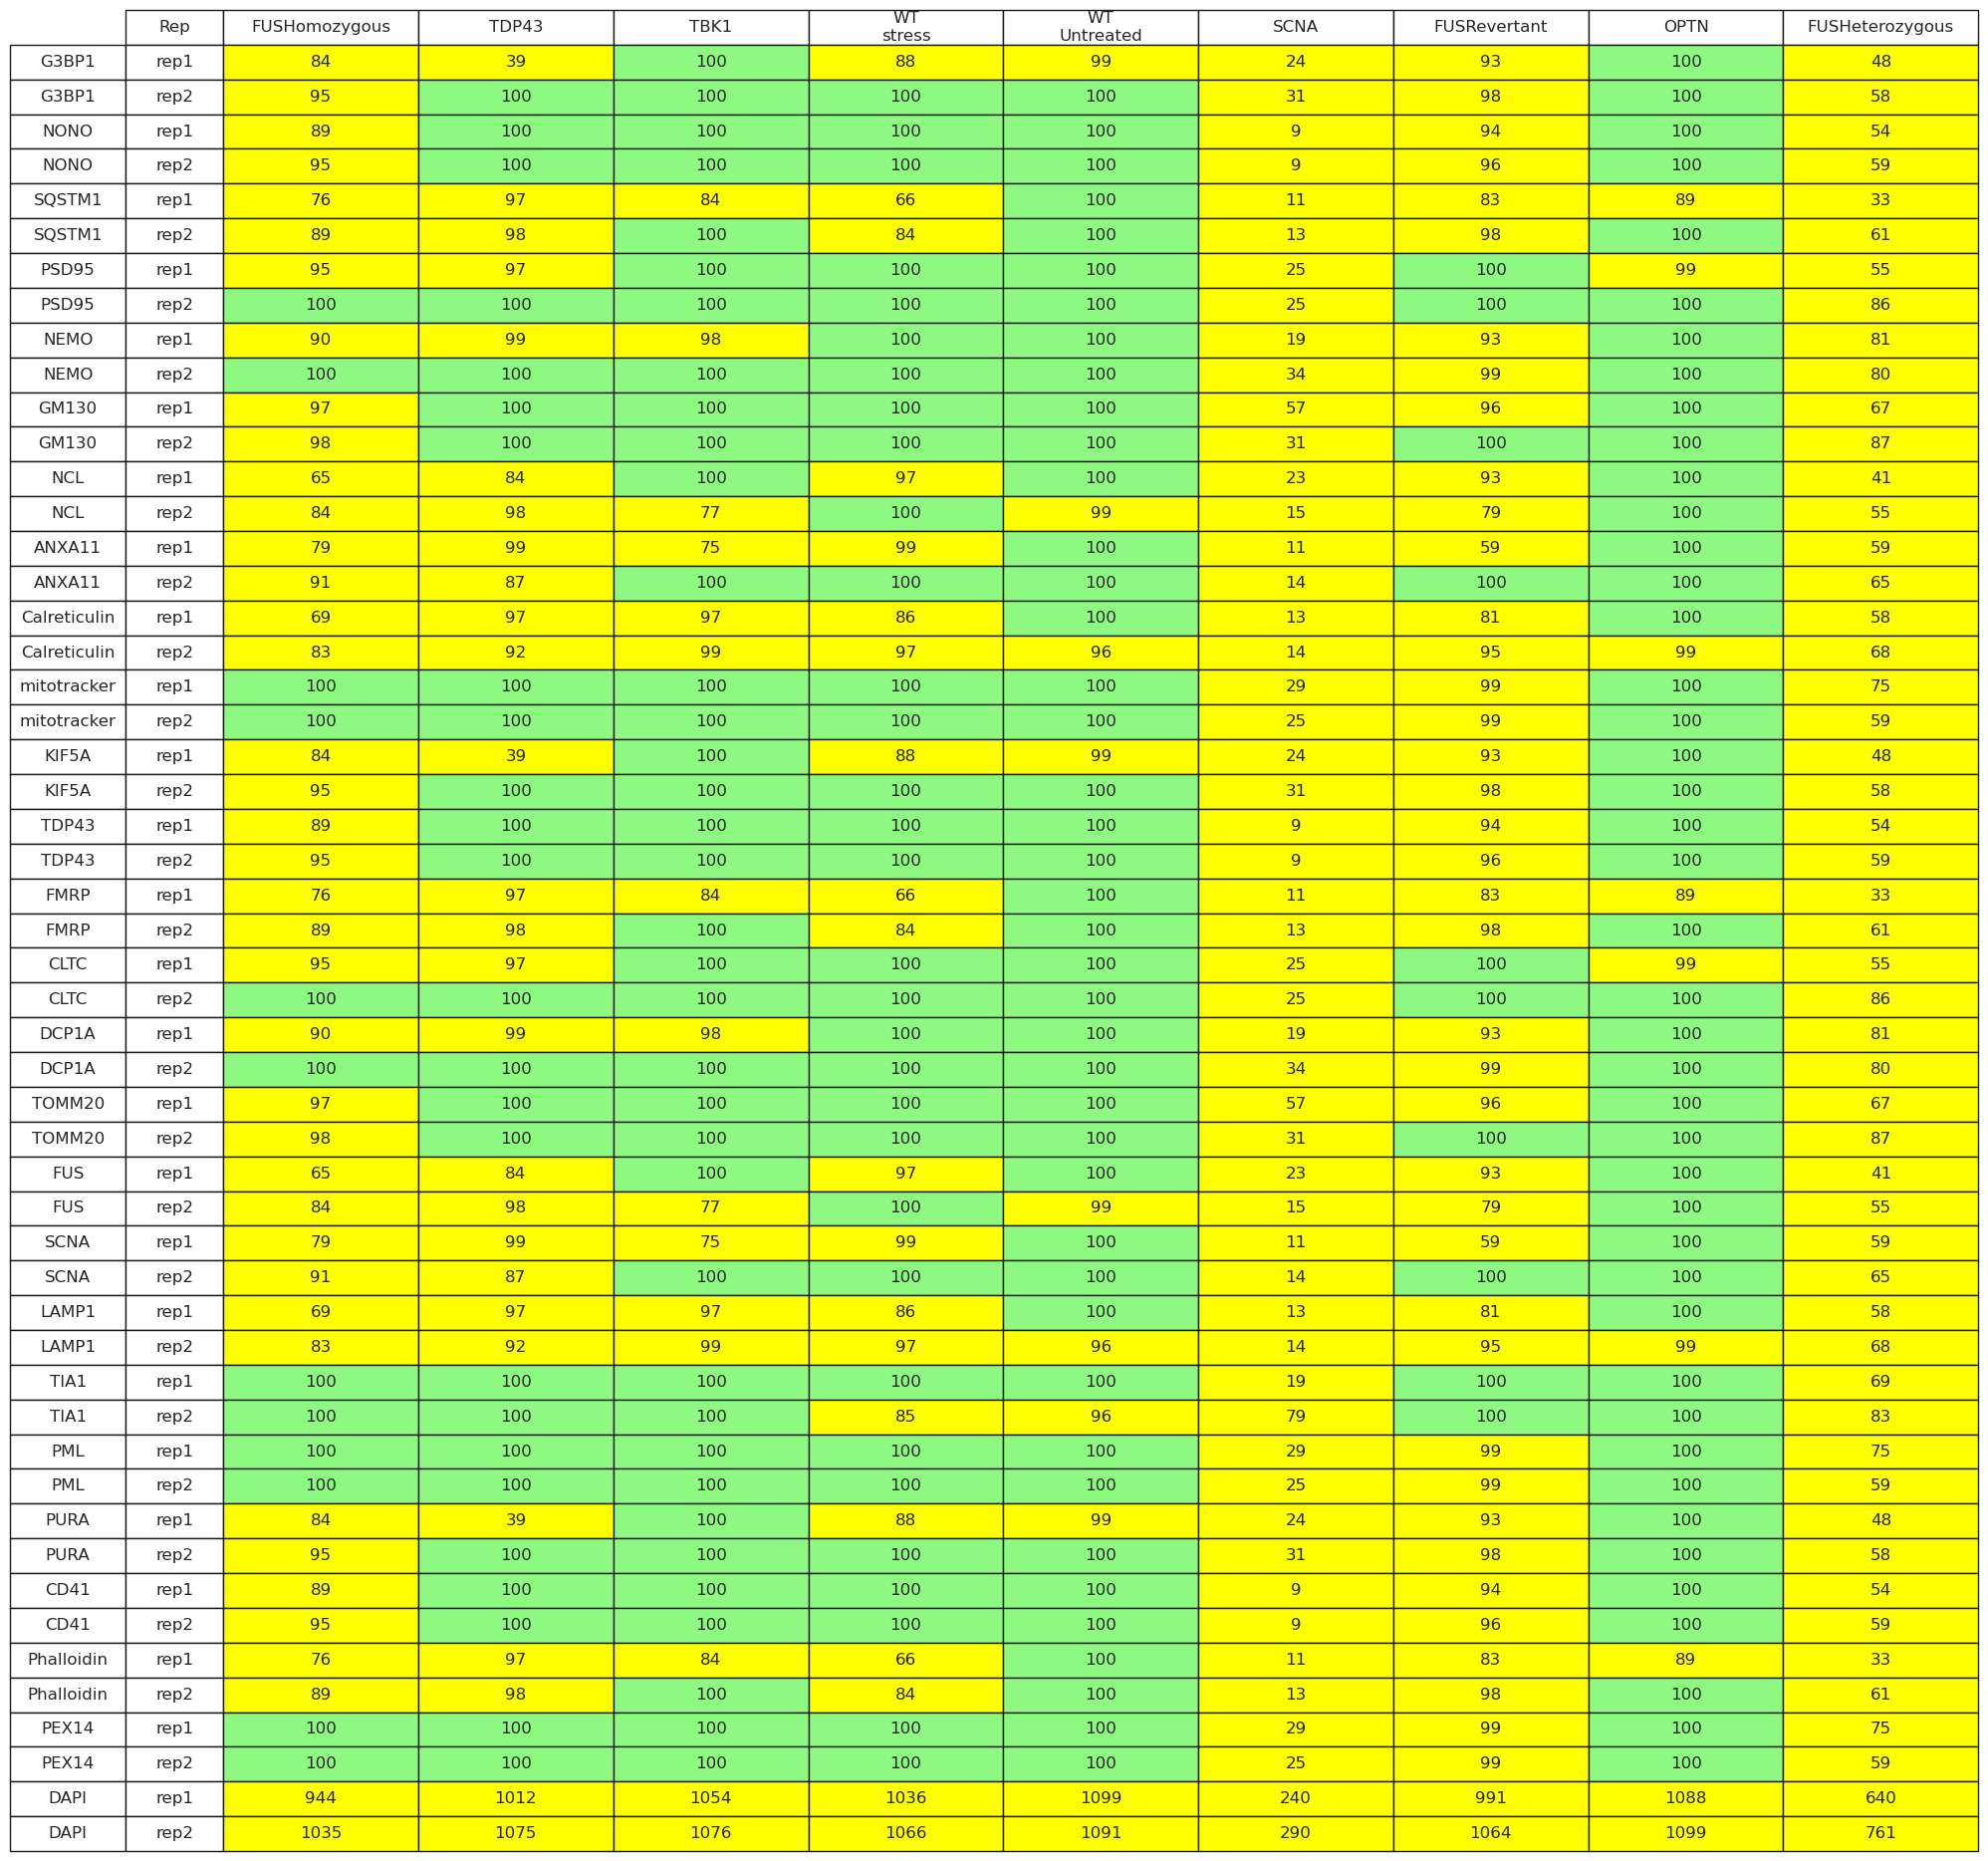

batch6
Folder structure is valid.
All files exists.
Total Sites:  64339


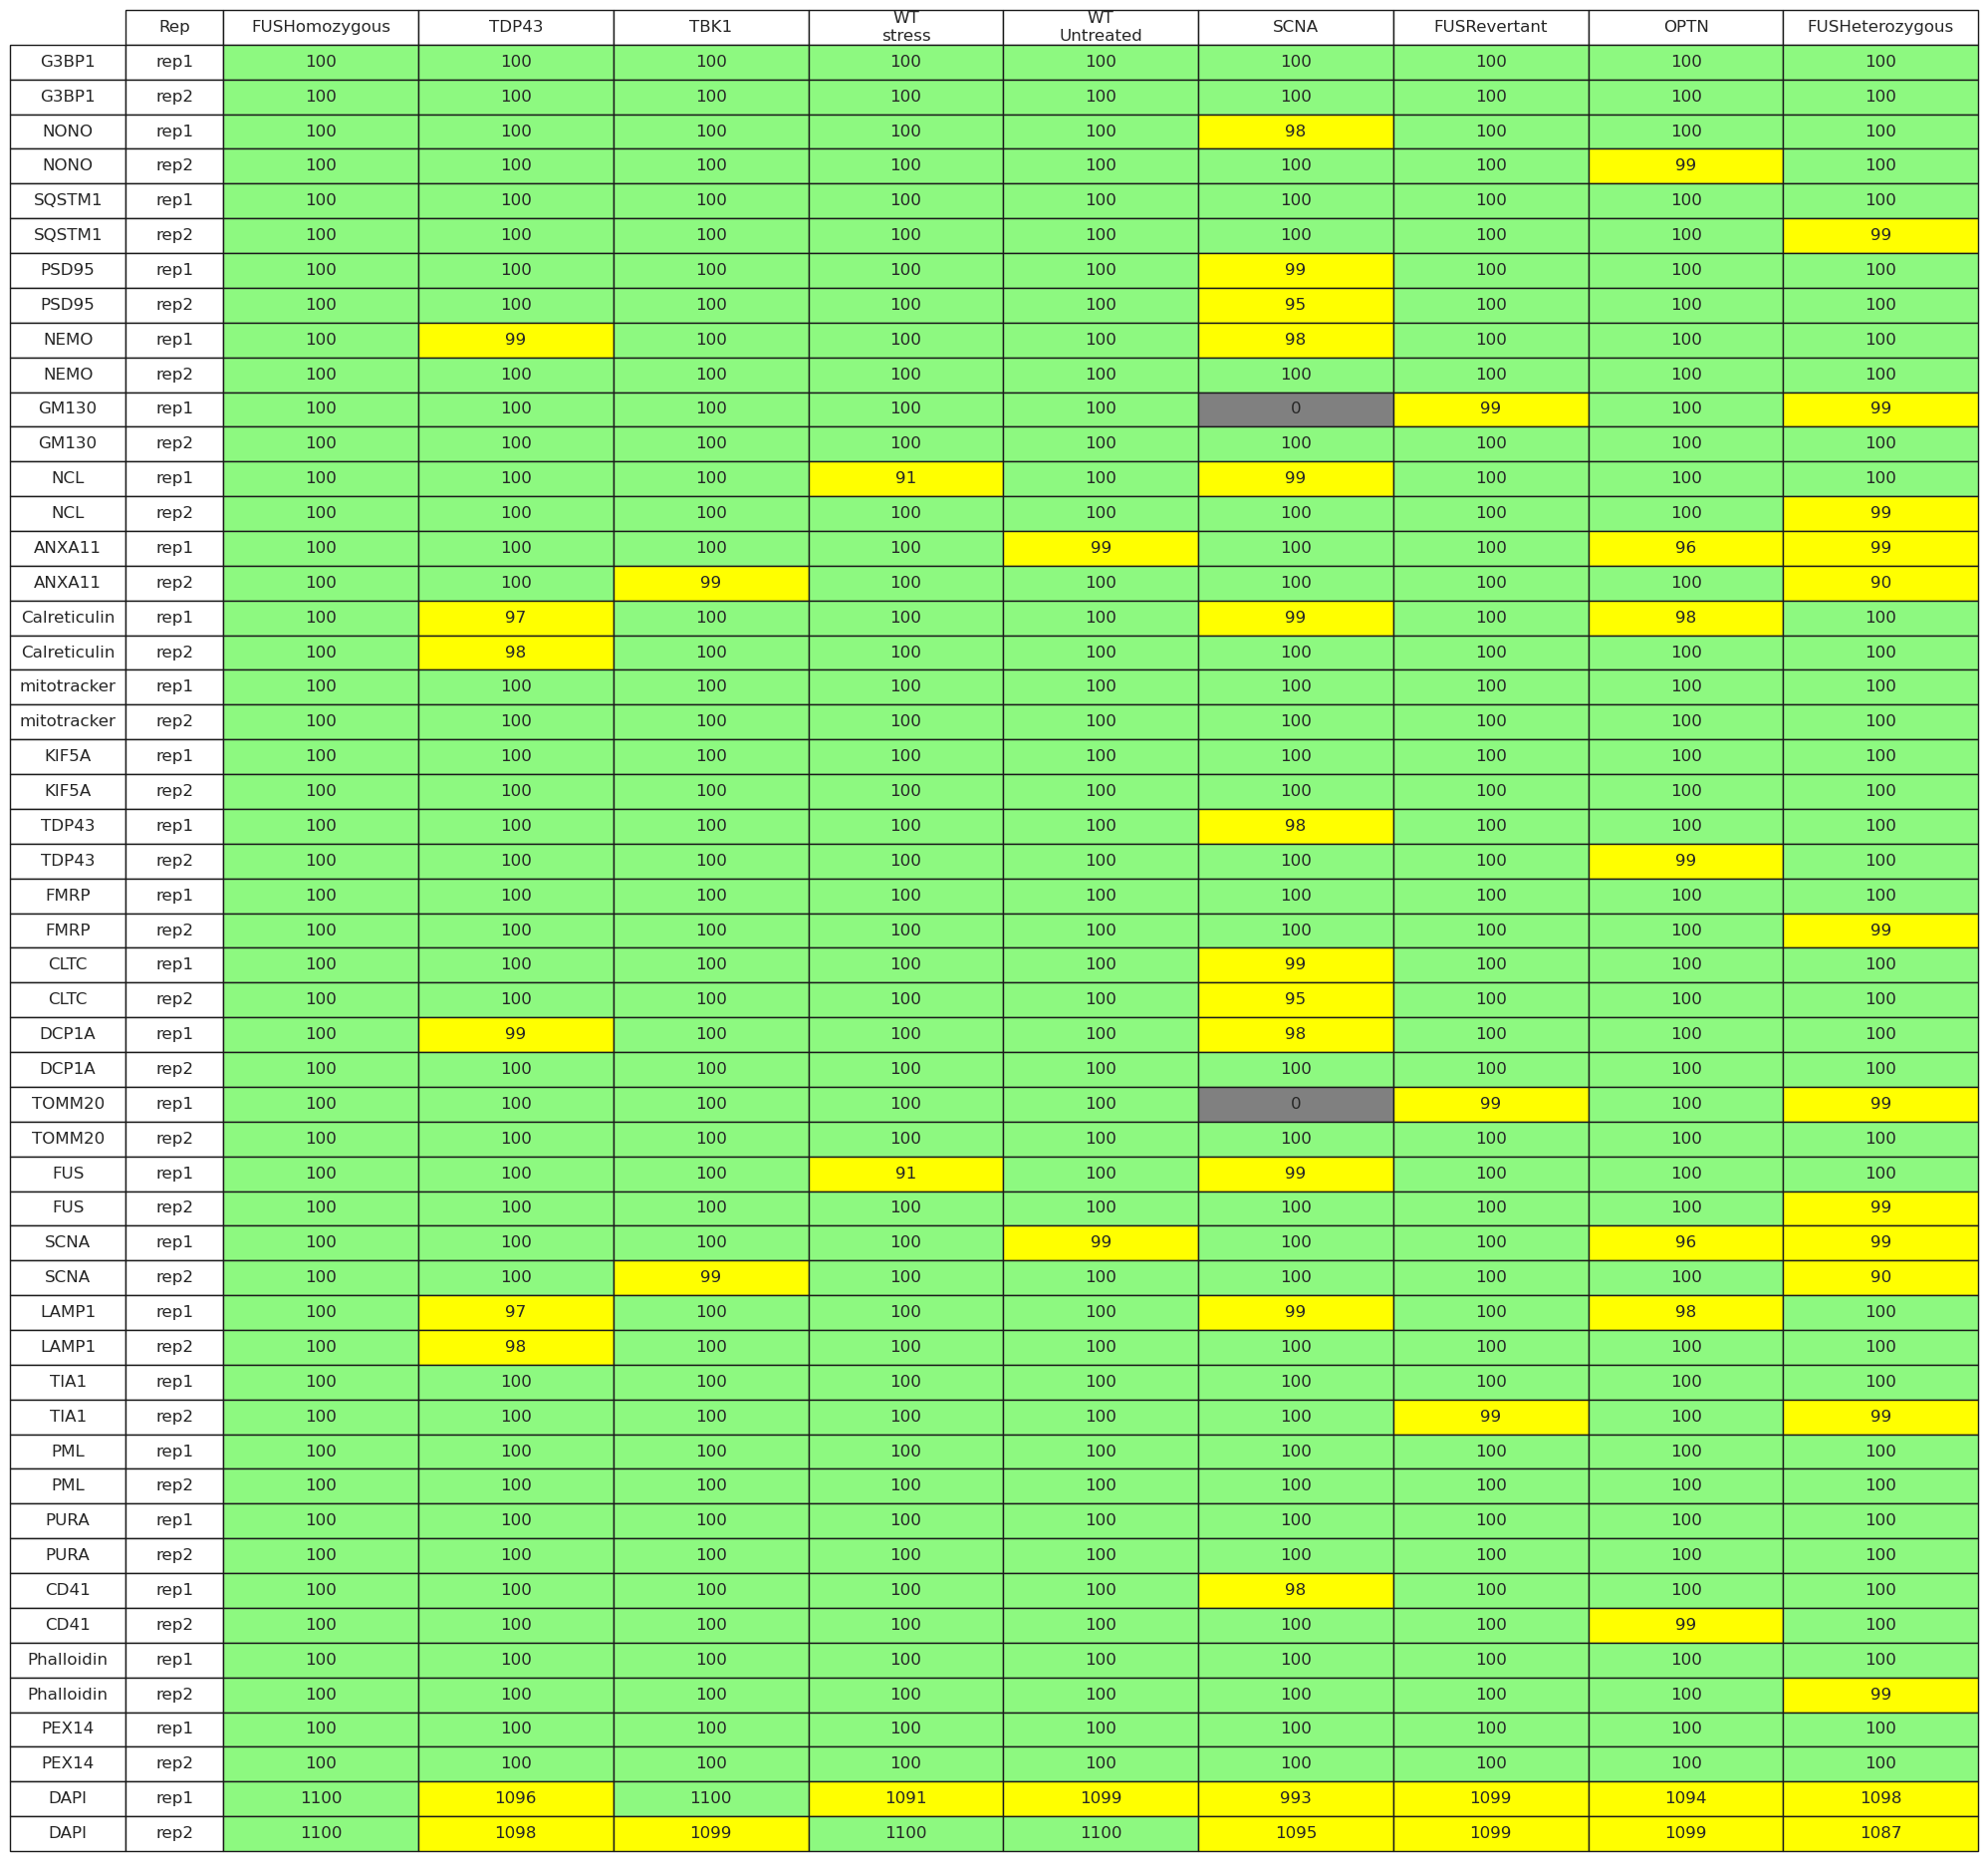

batch7_16bit
Folder structure is valid.
All files exists.
Total Sites:  64360


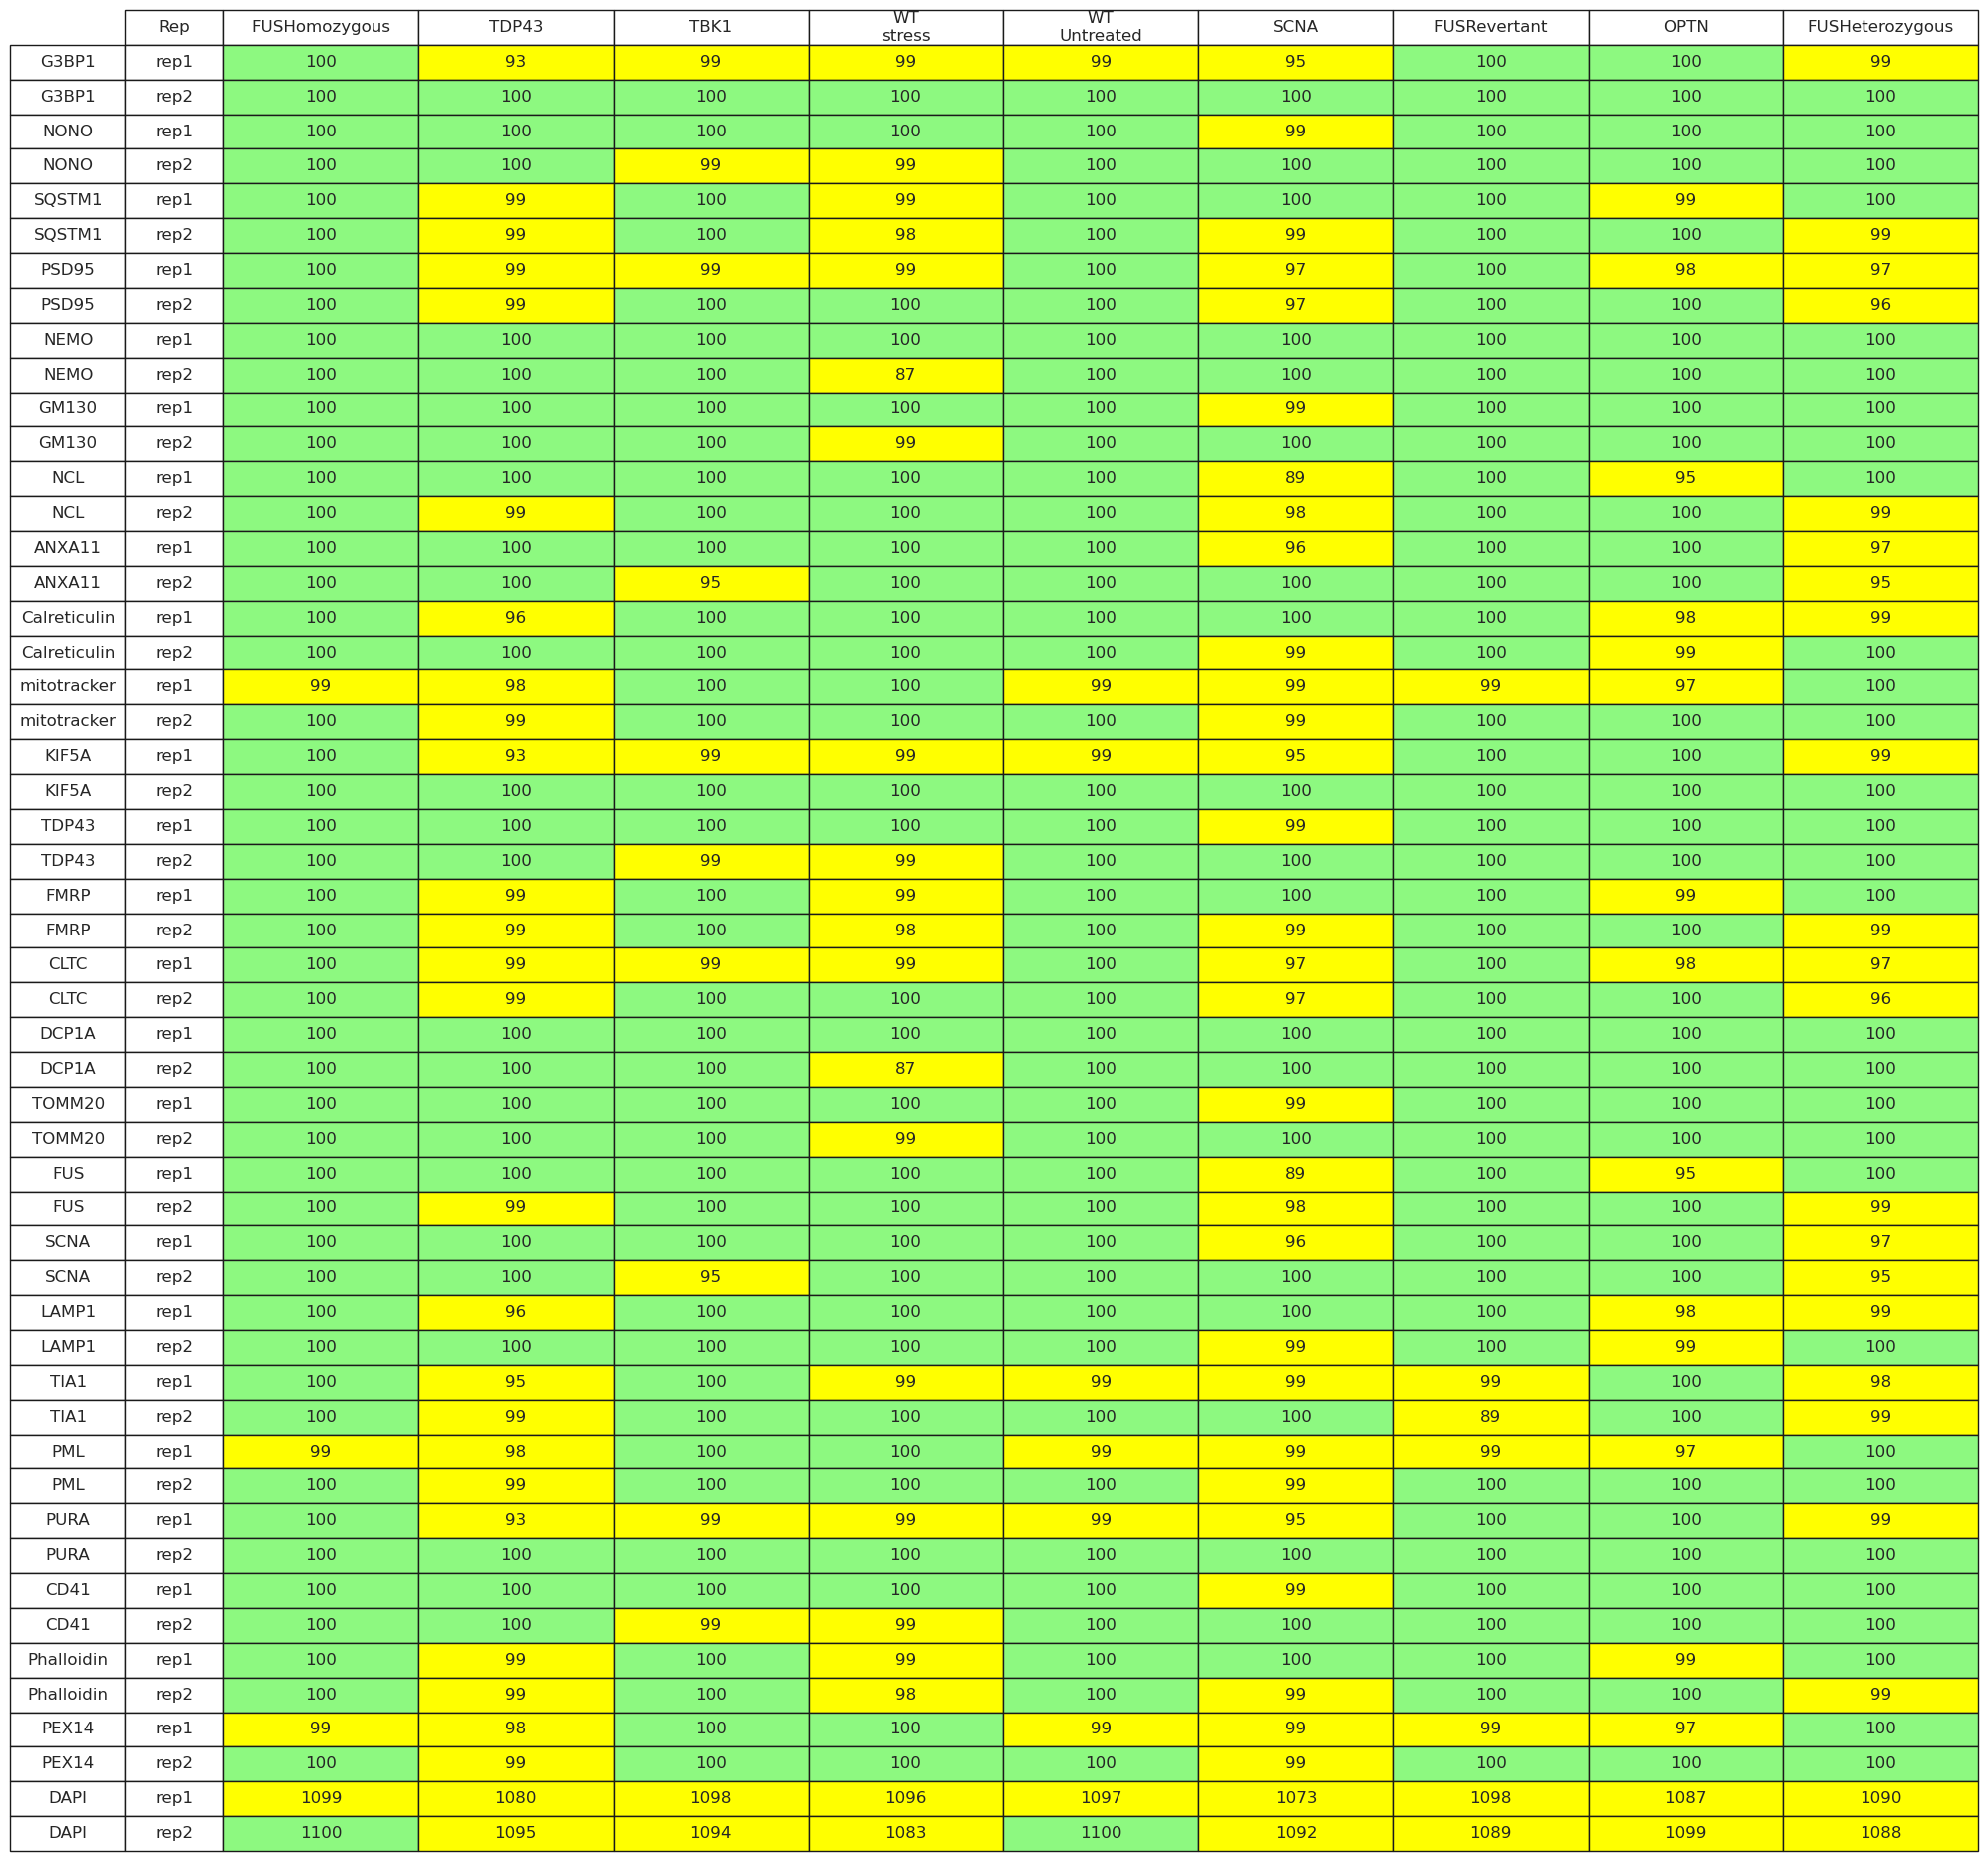

batch8_16bit
Folder structure is valid.
All files exists.
Total Sites:  64398


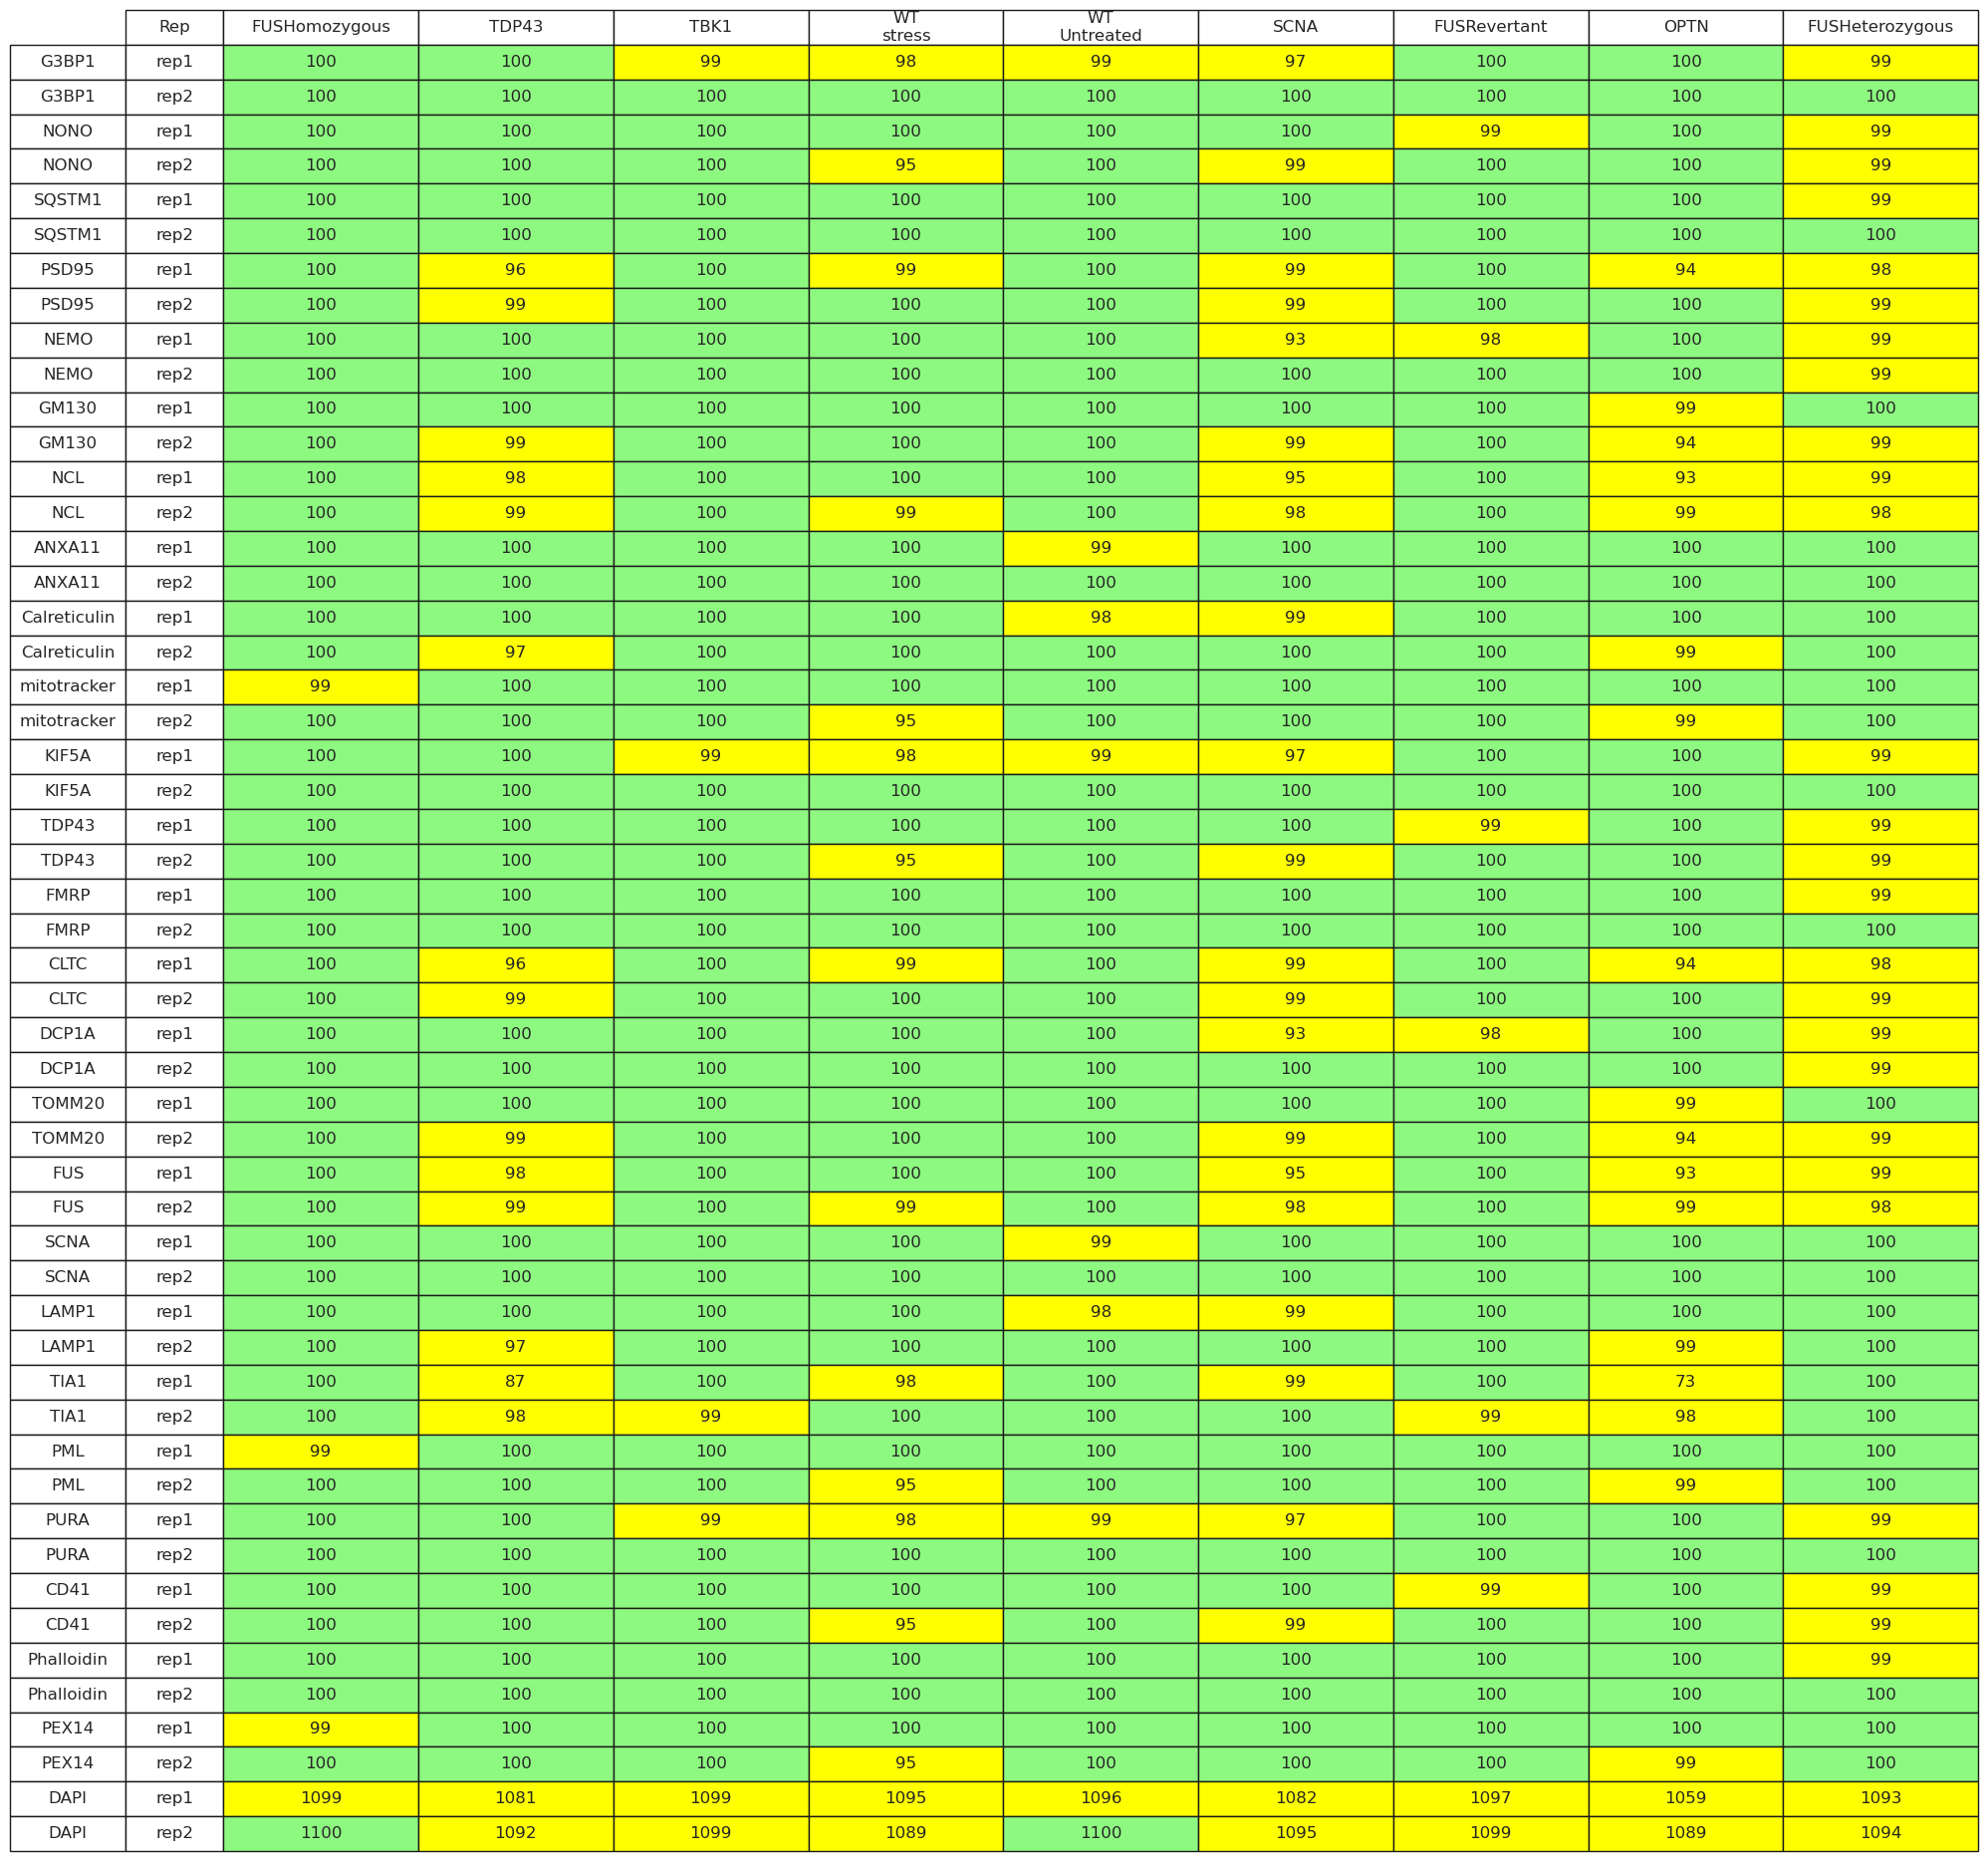

batch9_16bit
Folder structure is valid.
All files exists.
Total Sites:  63896


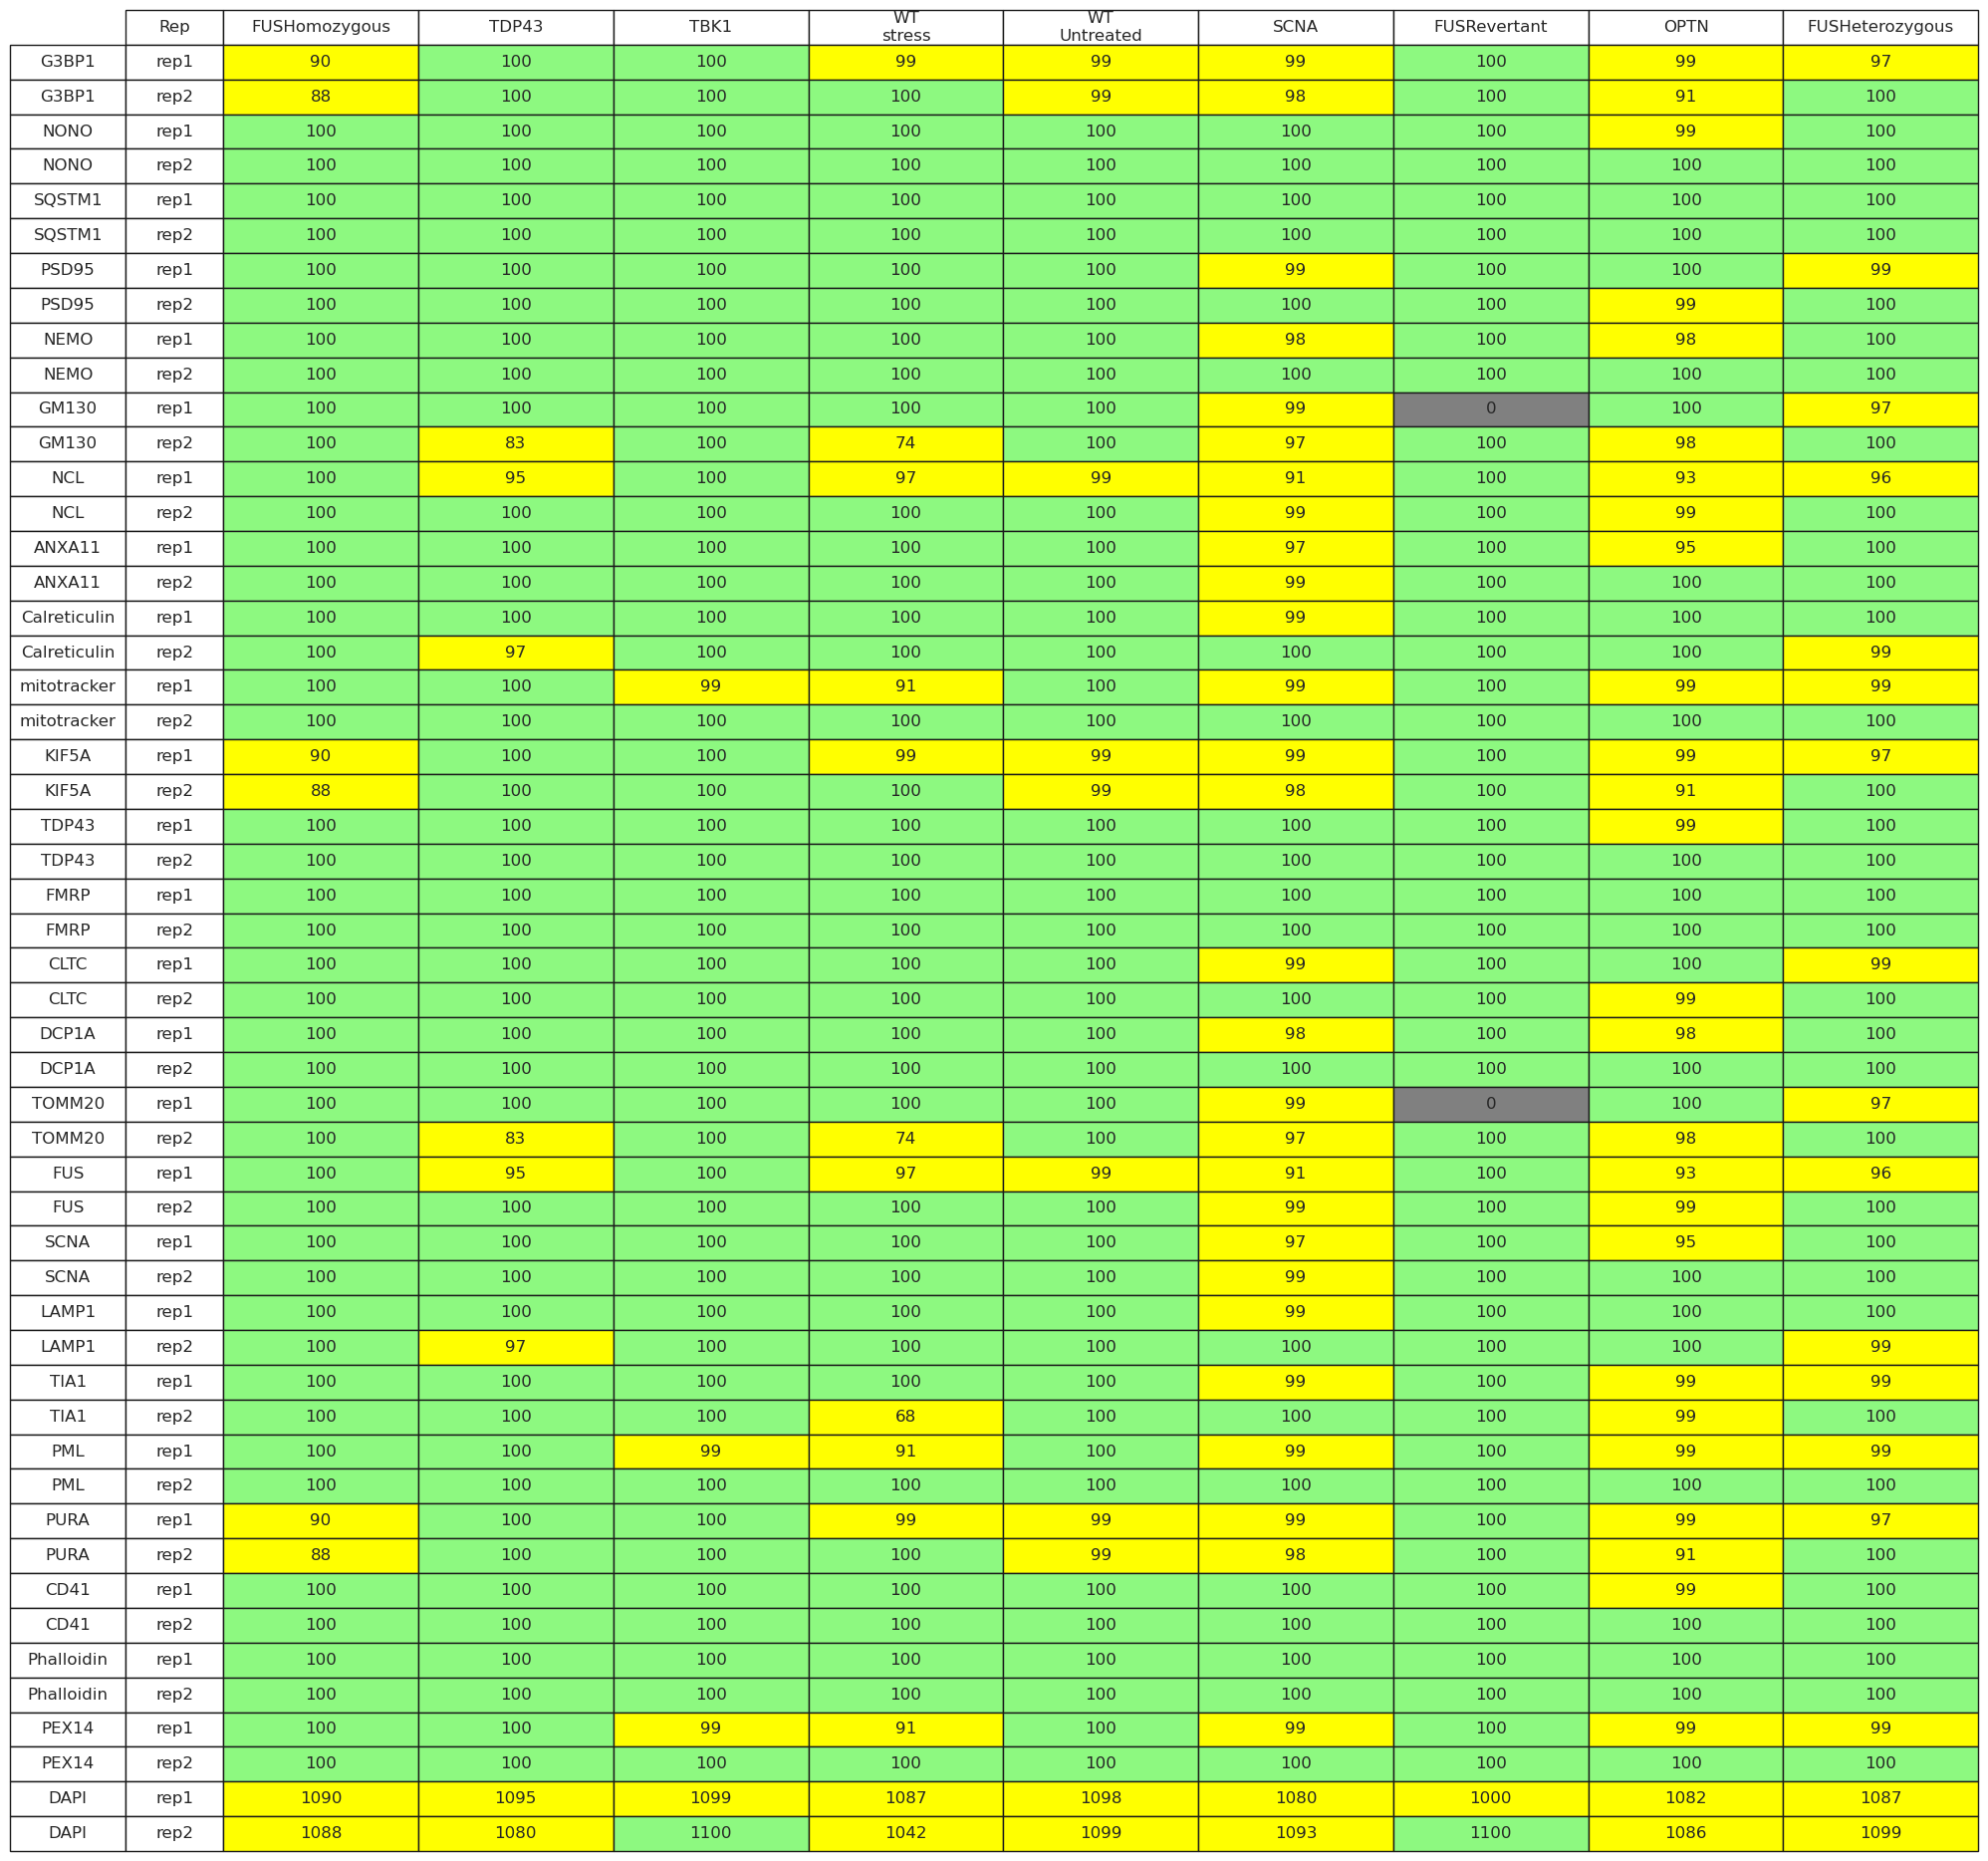

In [6]:
root_directory_proc = os.path.join(MOMAPS_DATA_HOME, 'input', 'images', 'processed', 'spd2',
                              'SpinningDisk')
procs = run_validate_folder_structure(root_directory_proc, True, panels, markers,PLOT_PATH,marker_info,
                                    cell_lines_to_cond, reps, cell_lines_for_disp, expected_dapi_raw,
                                     batches=batches)

### Difference between Raw and Processed

batch3


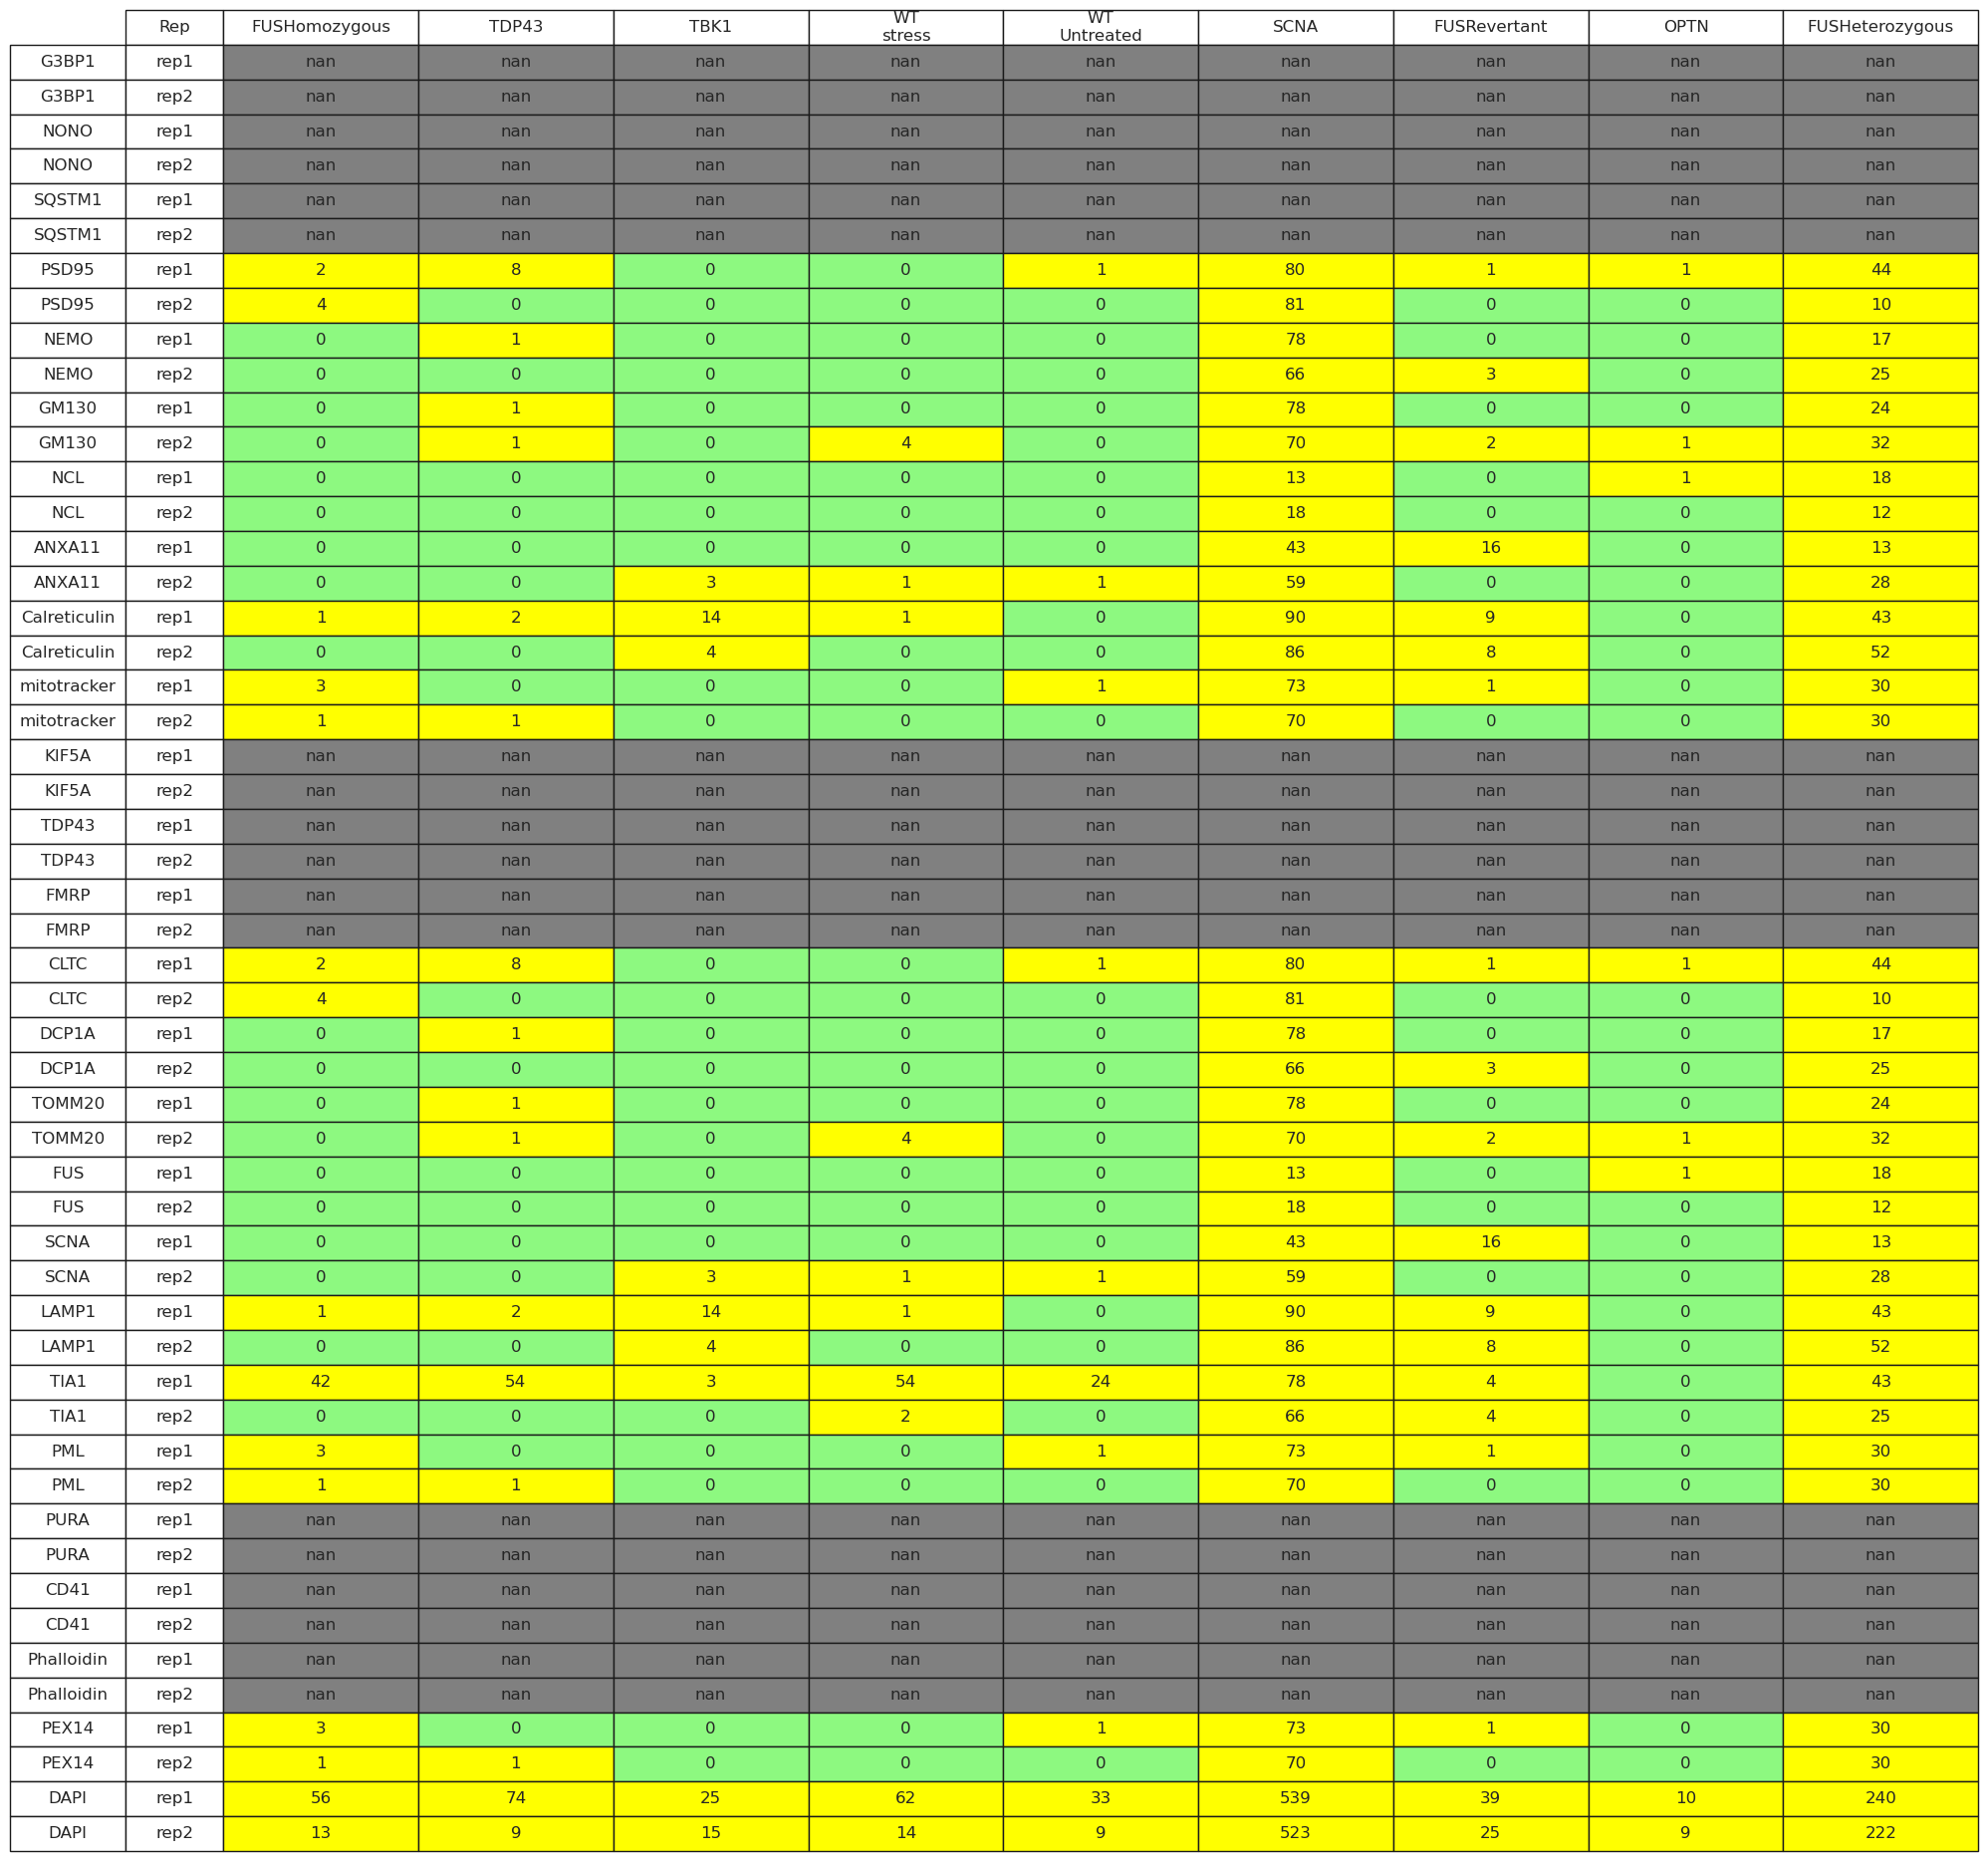

batch4


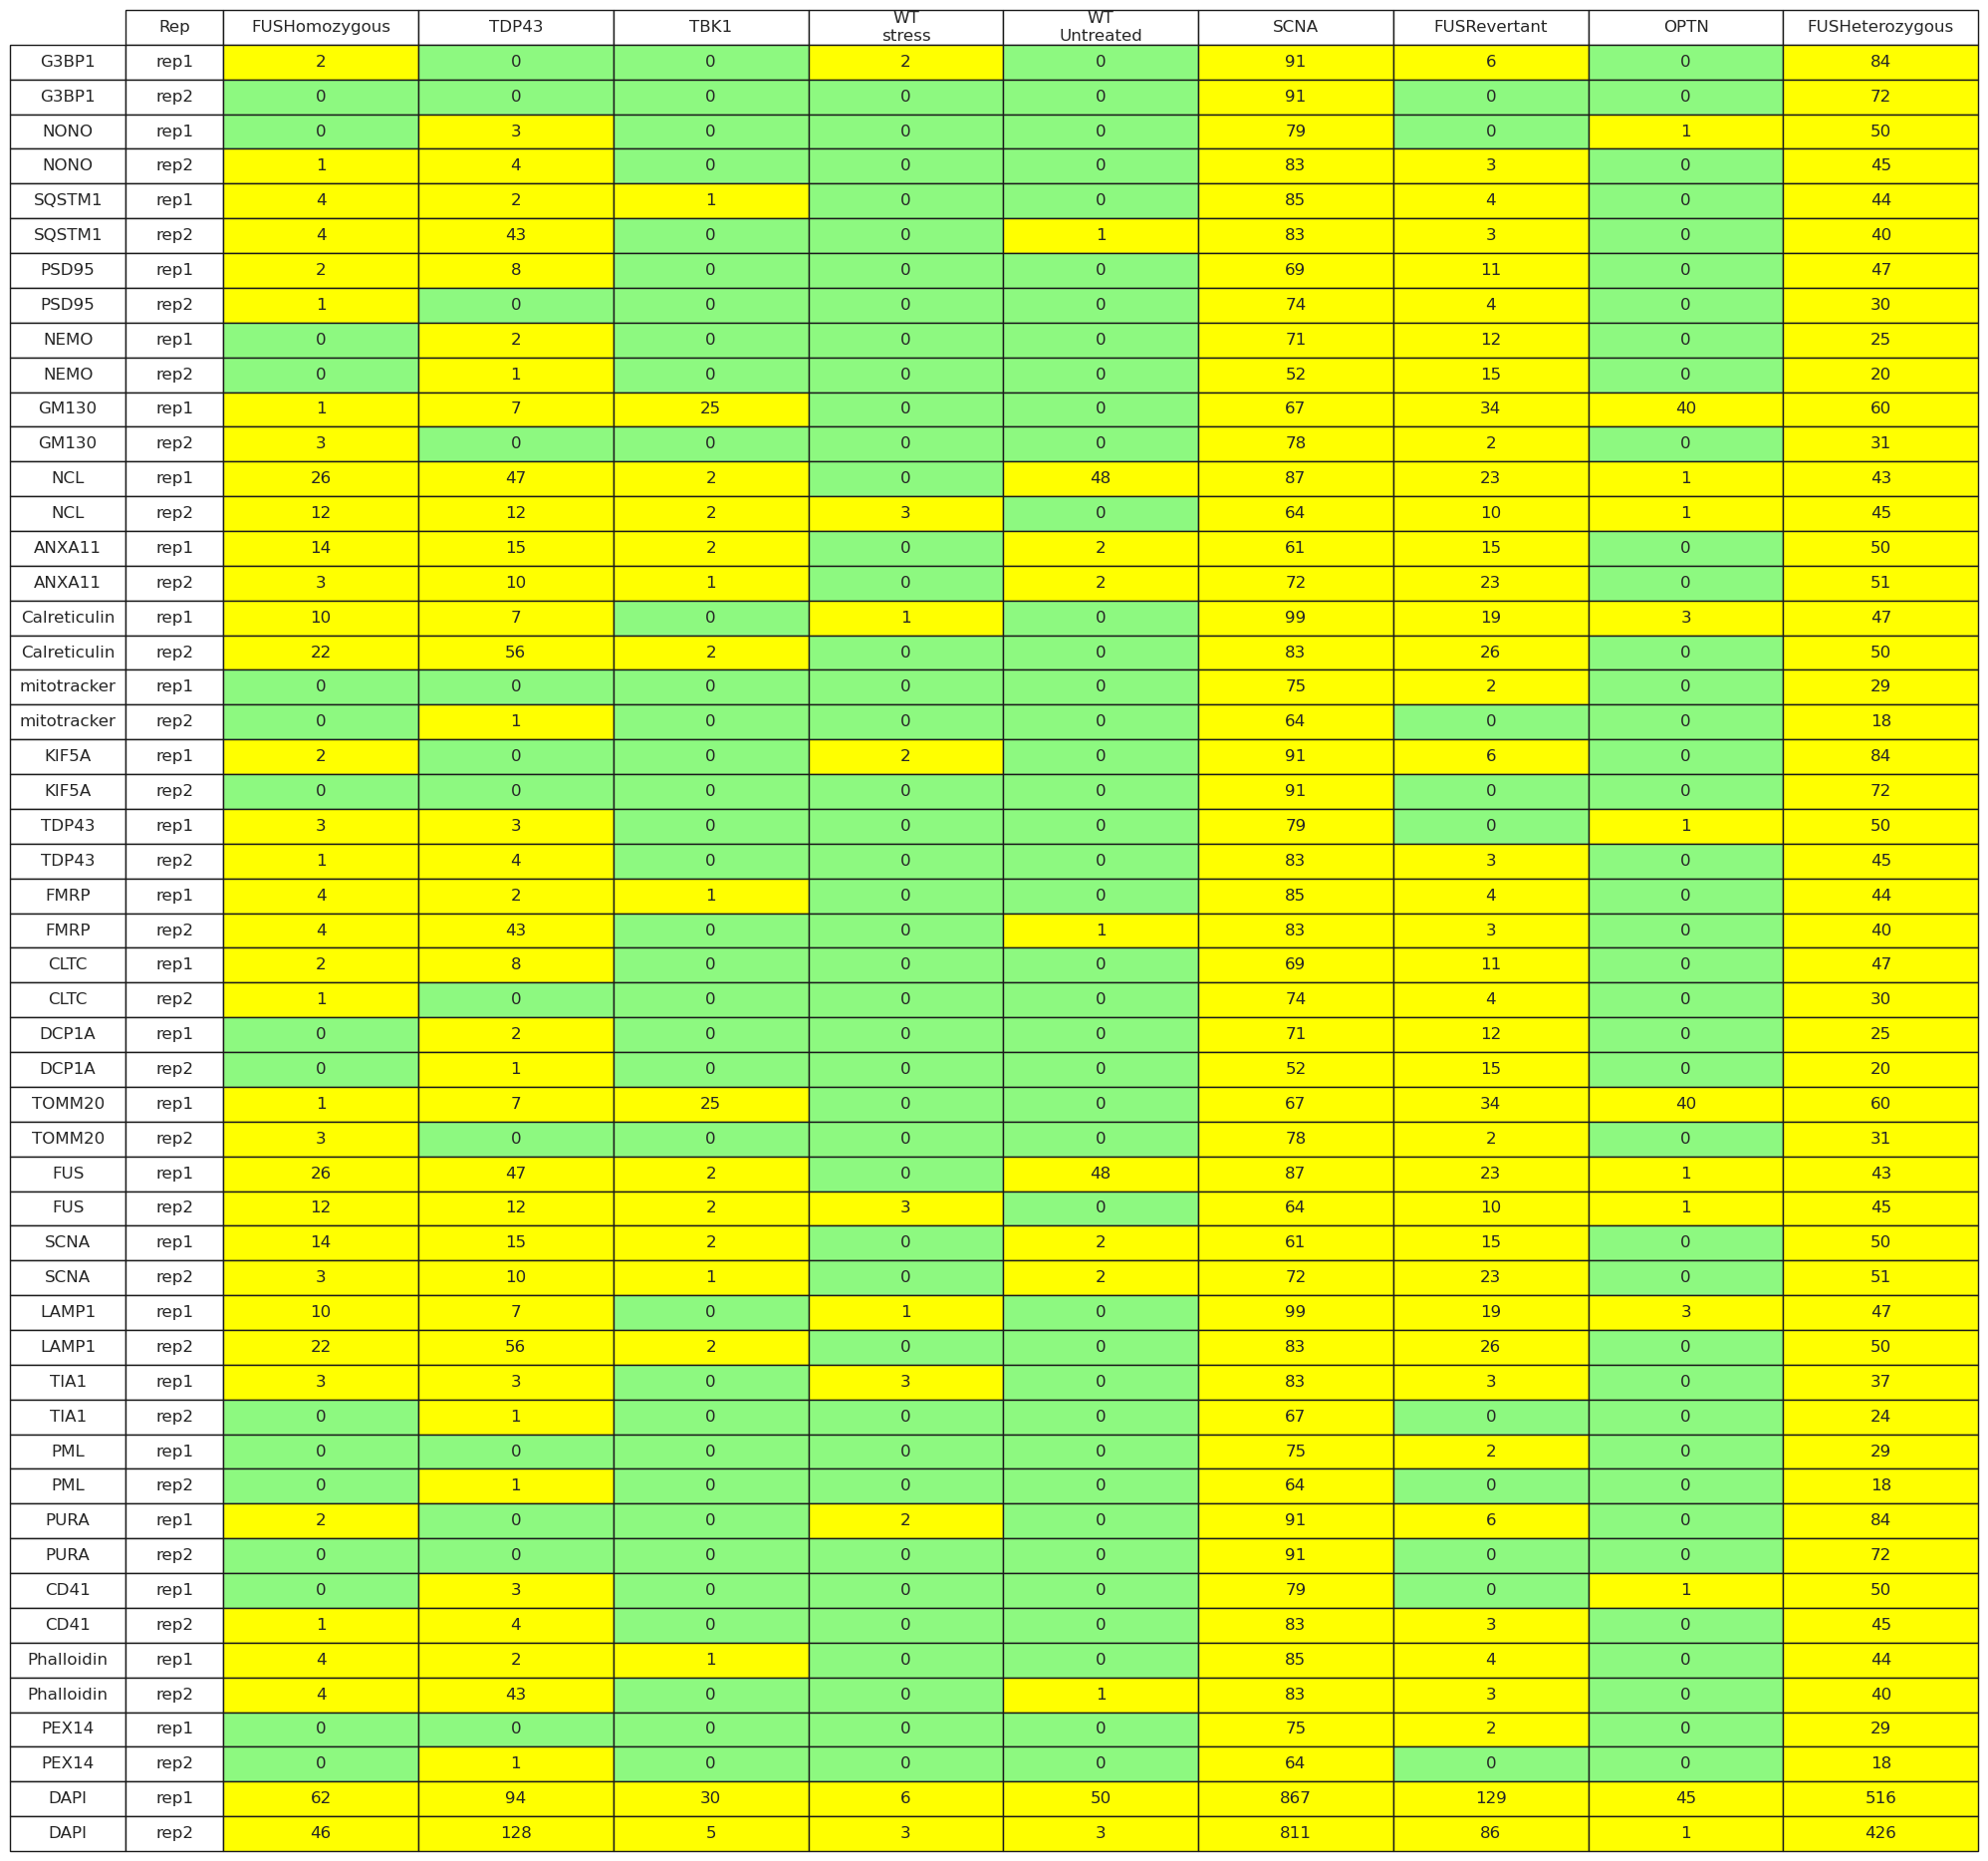

batch5


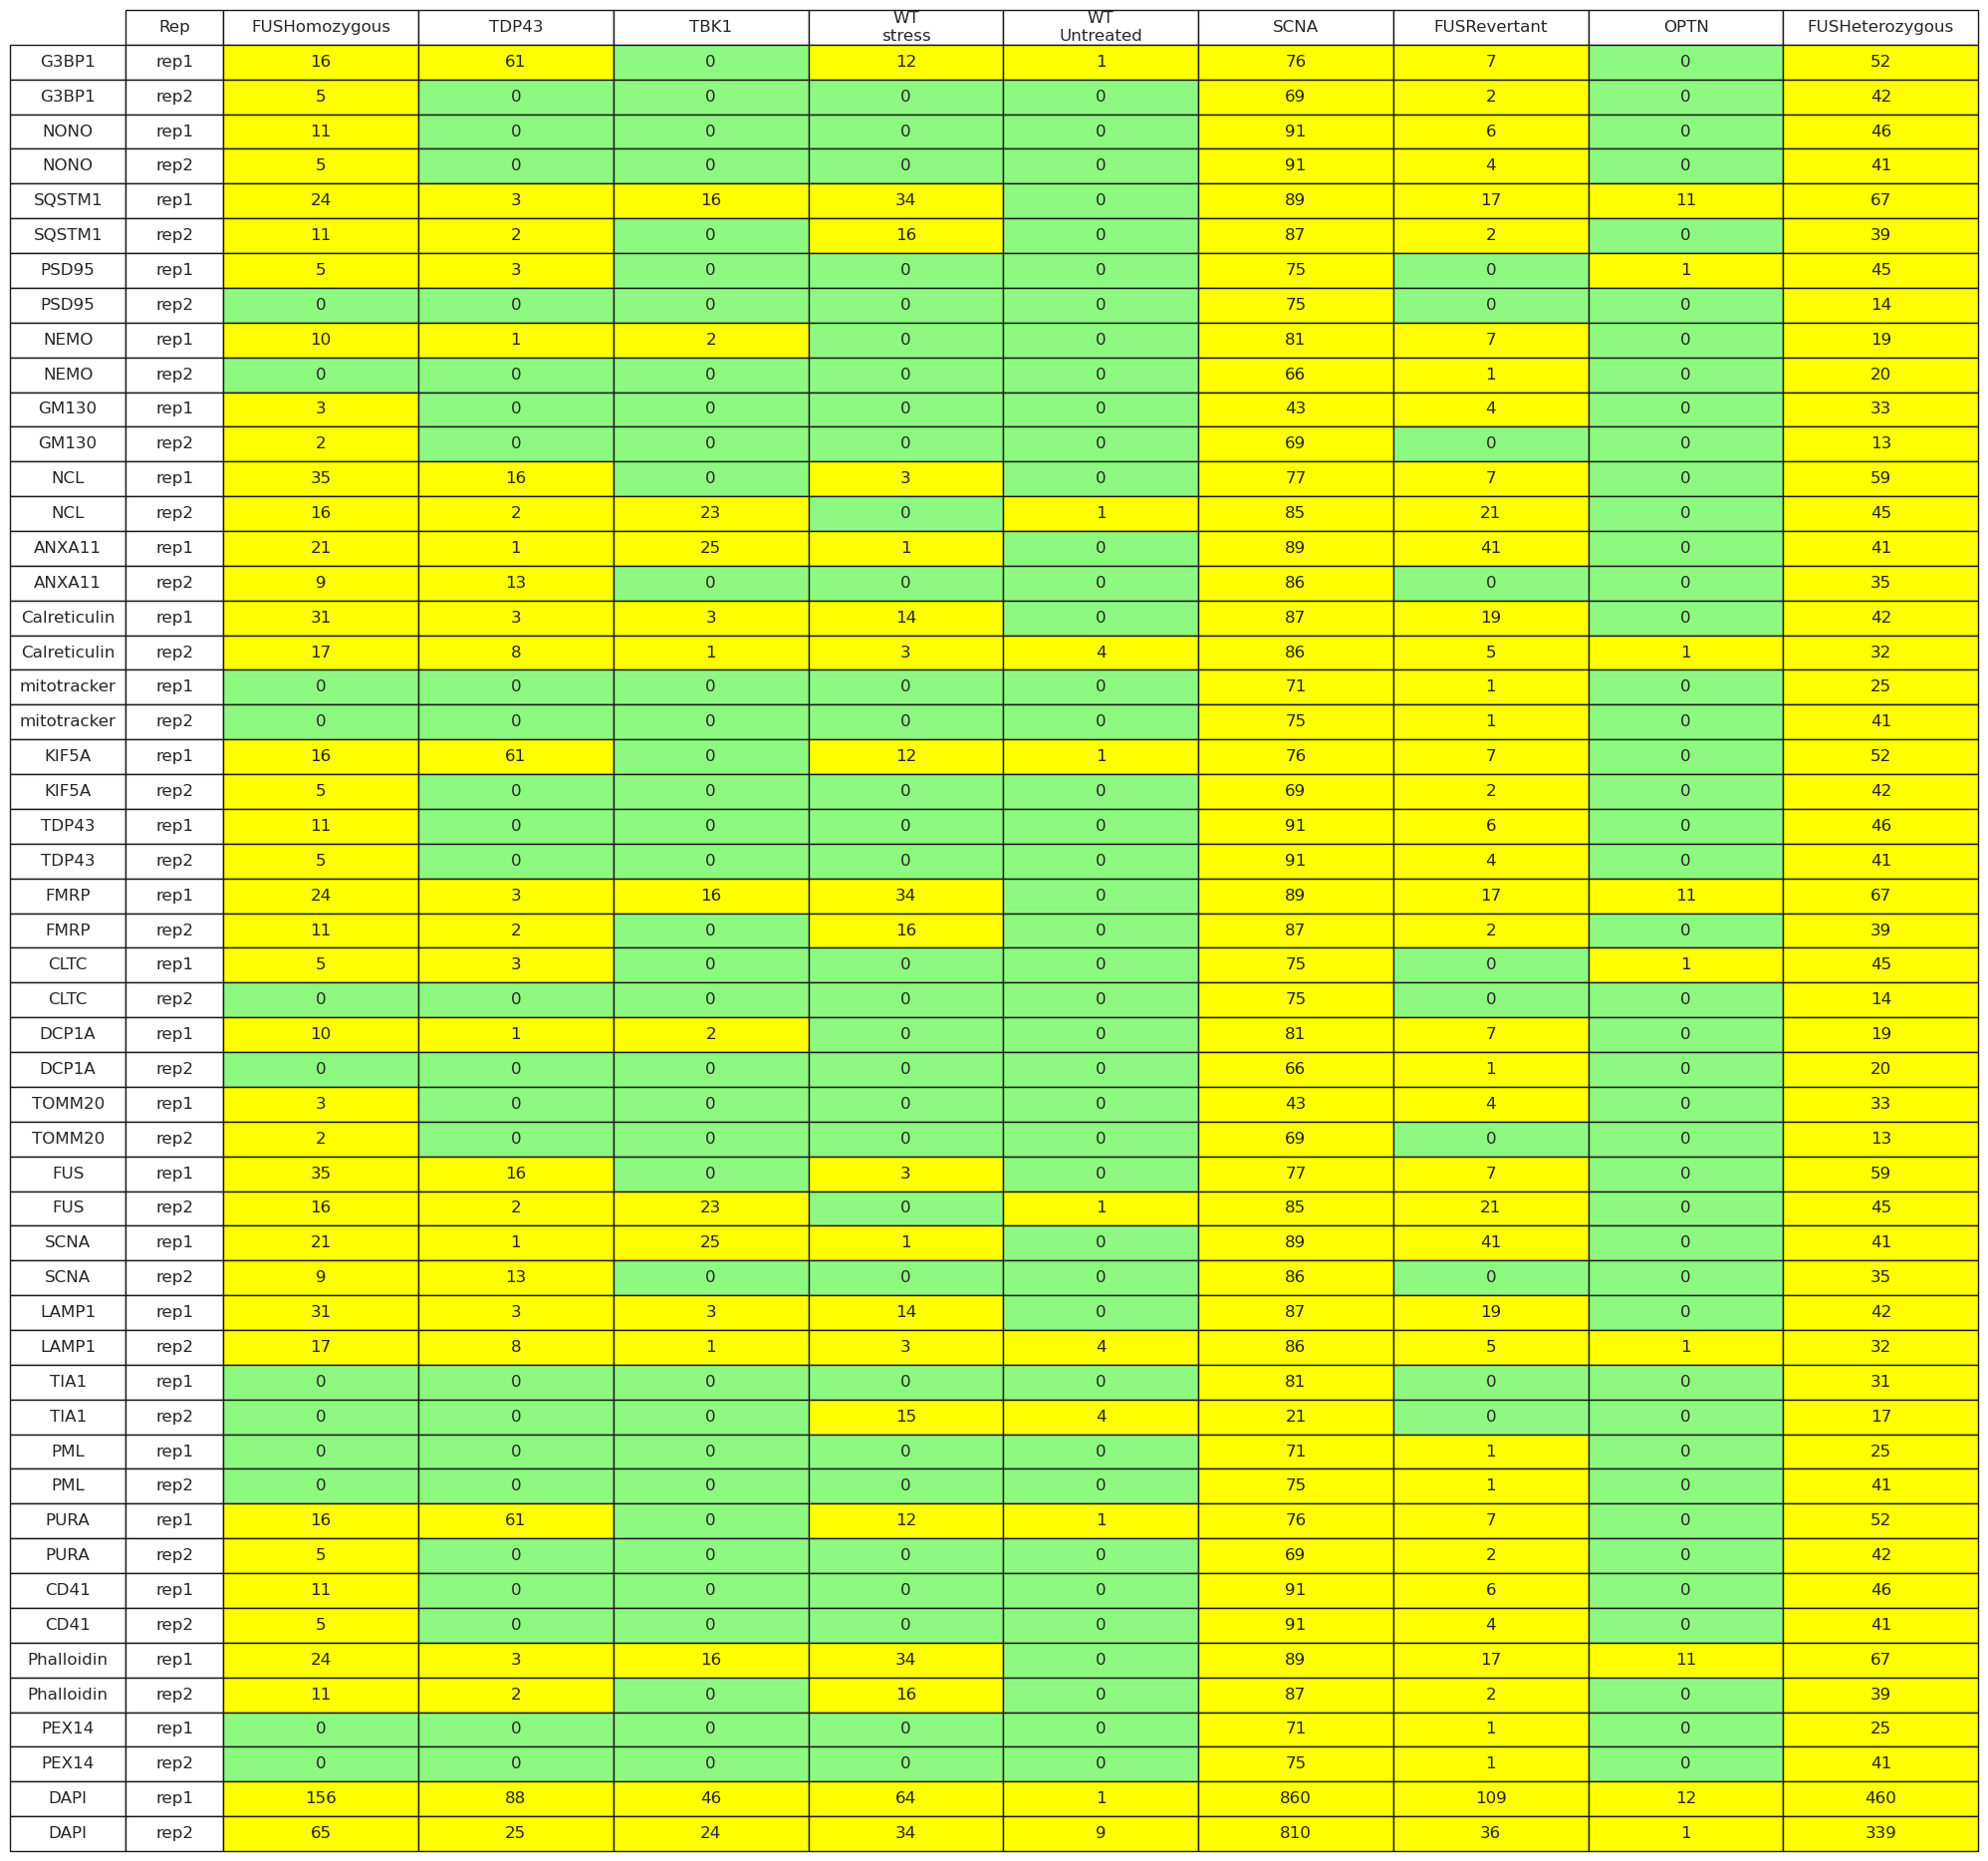

batch6


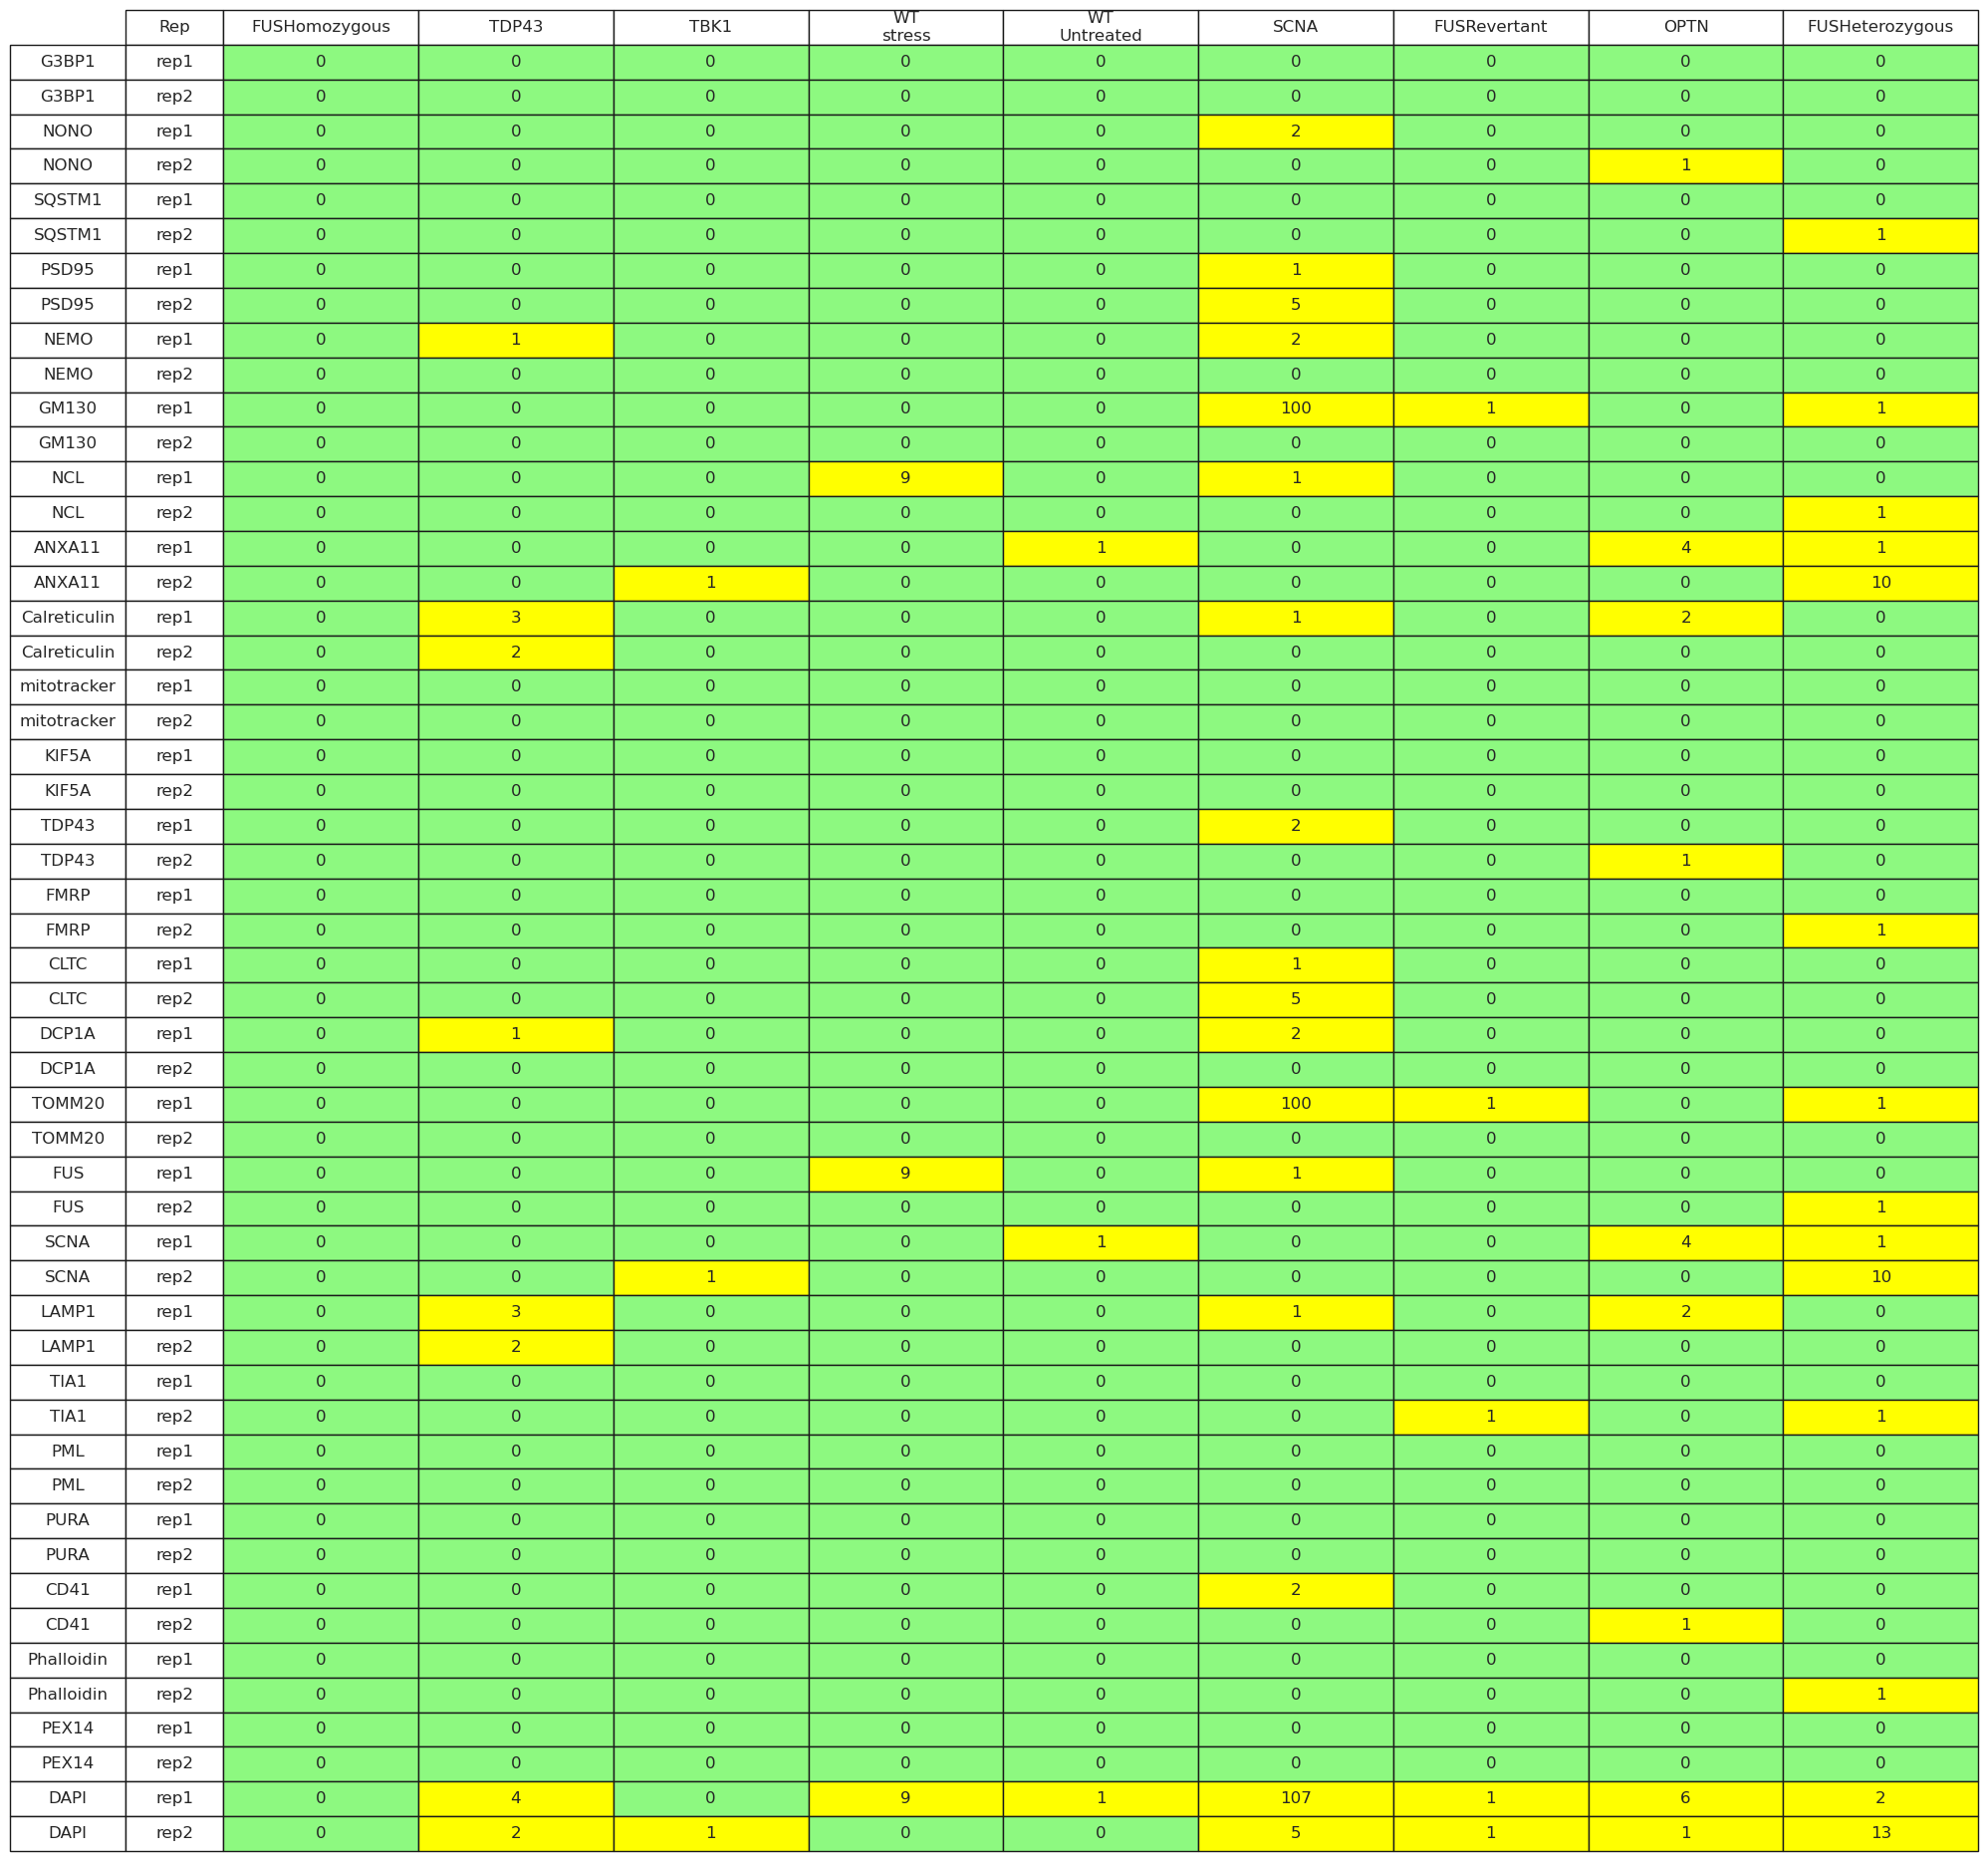

batch7_16bit


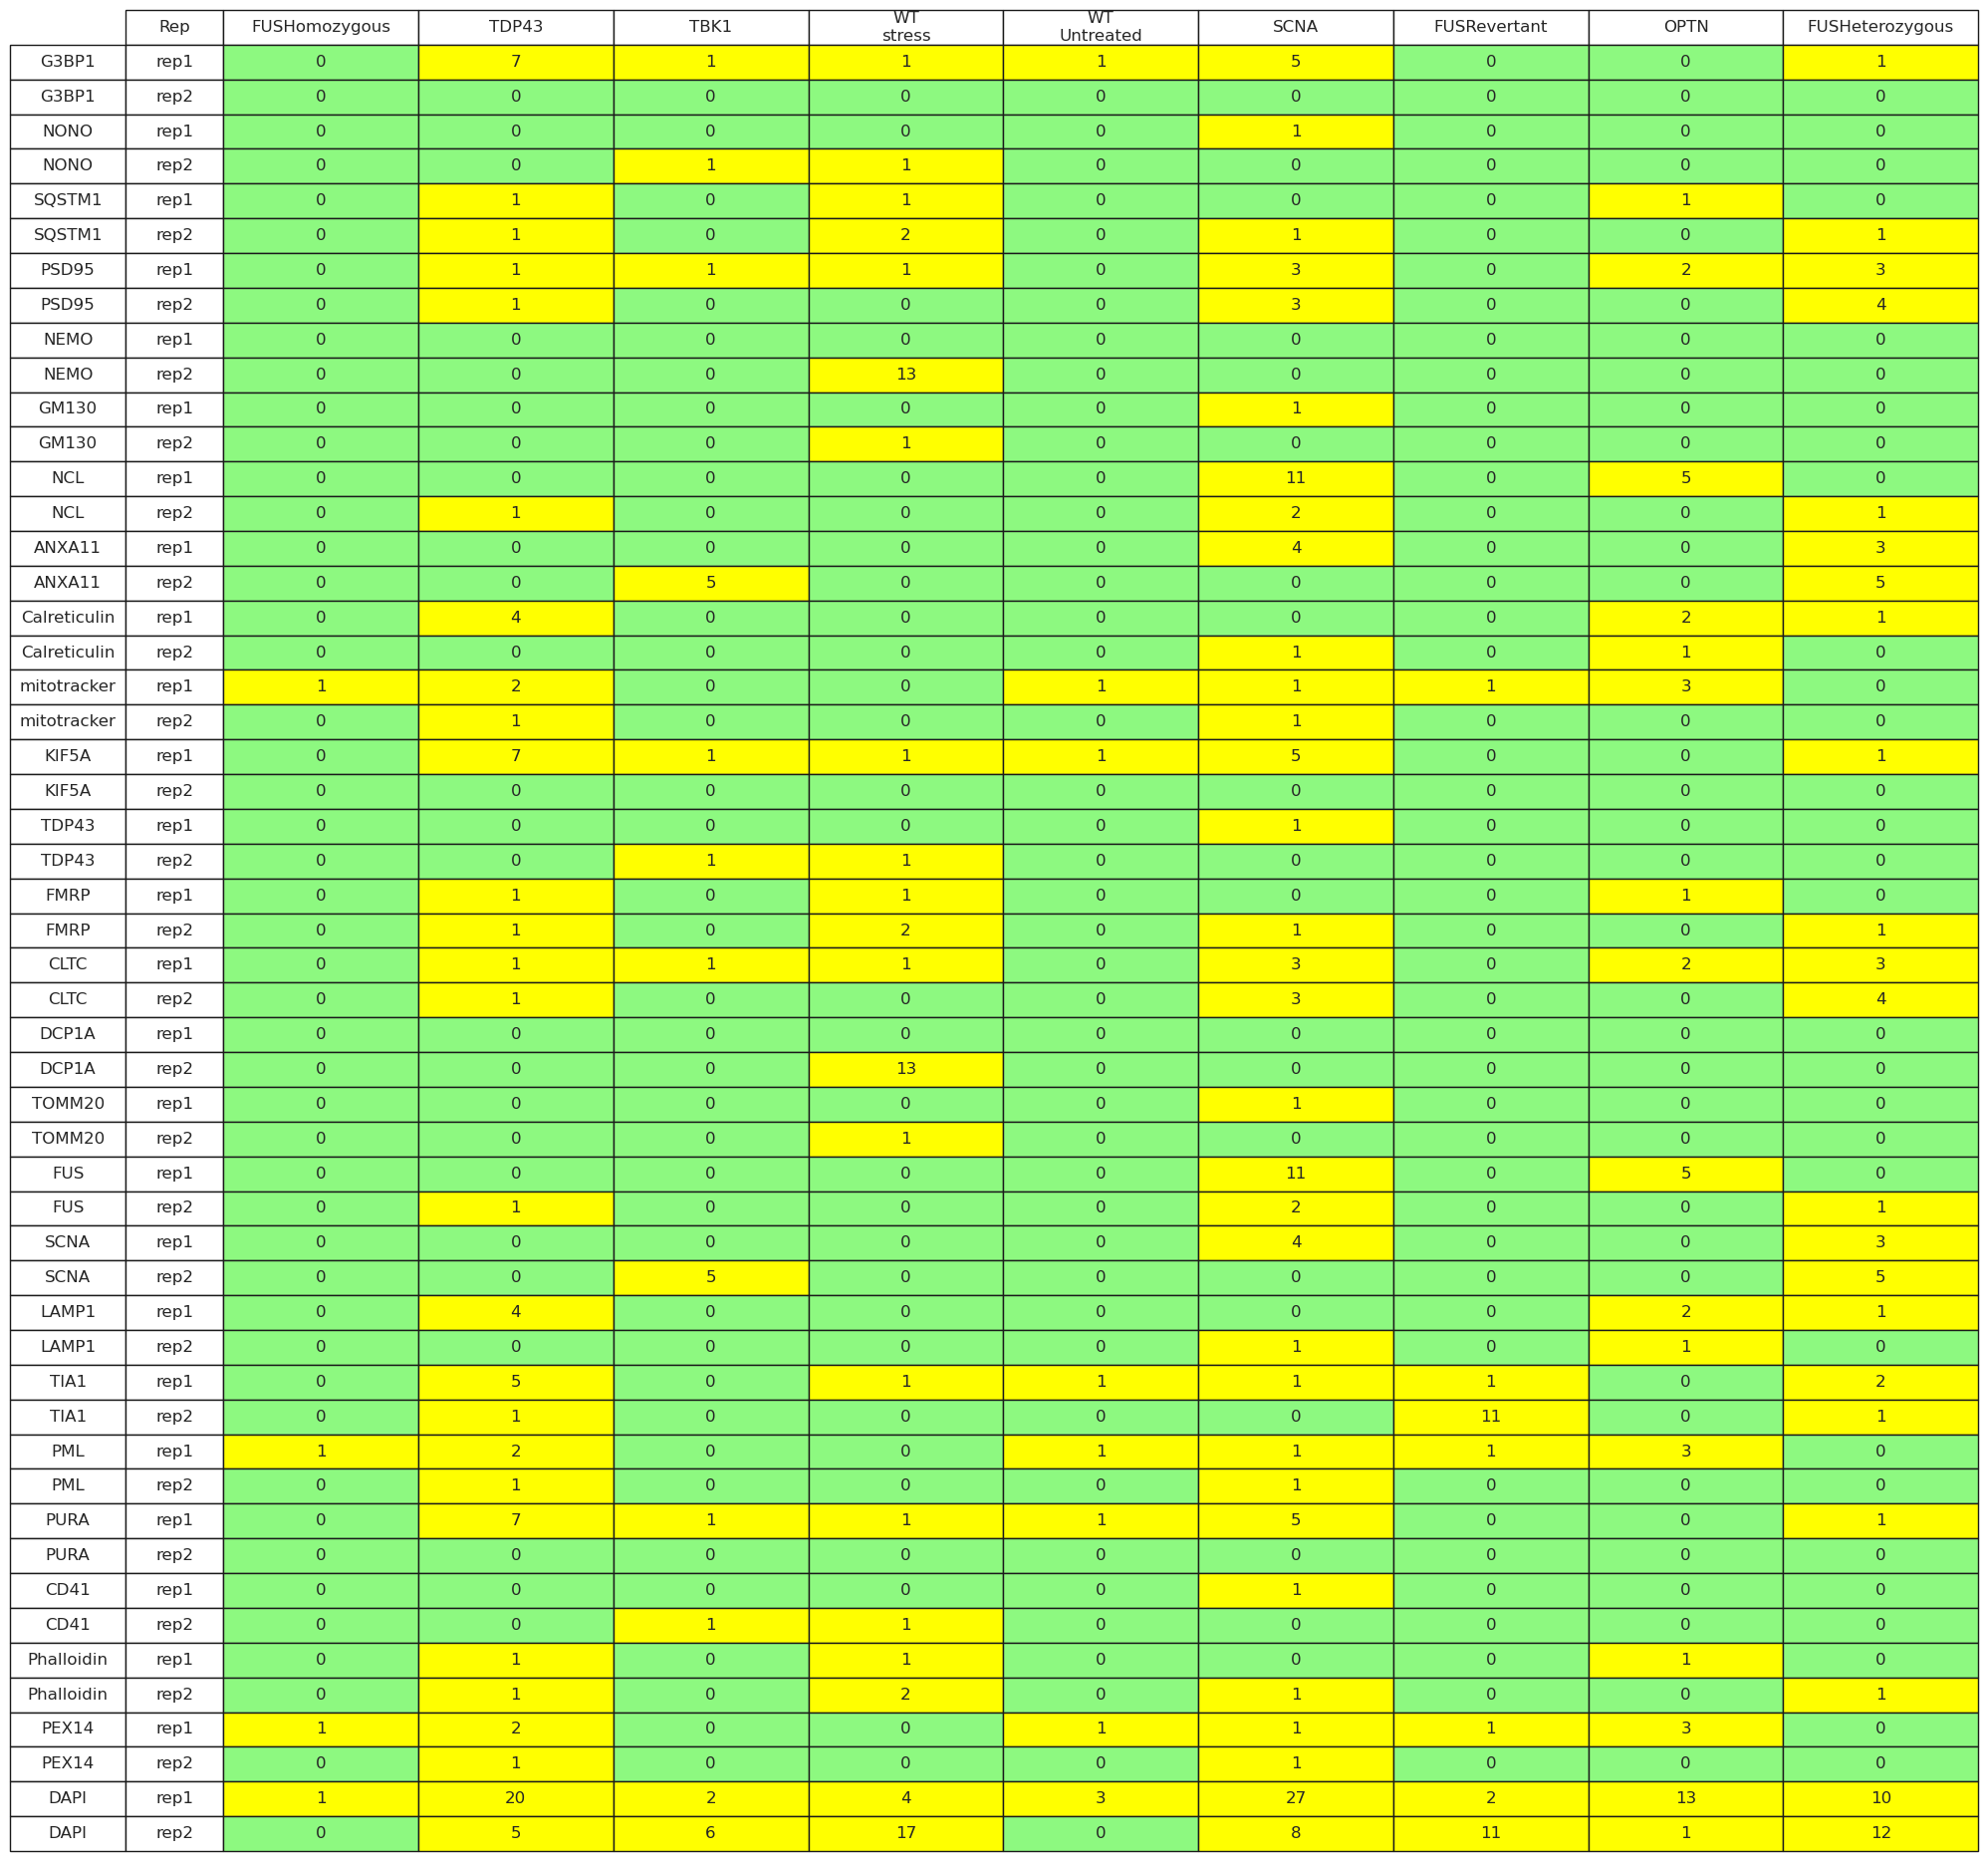

batch8_16bit


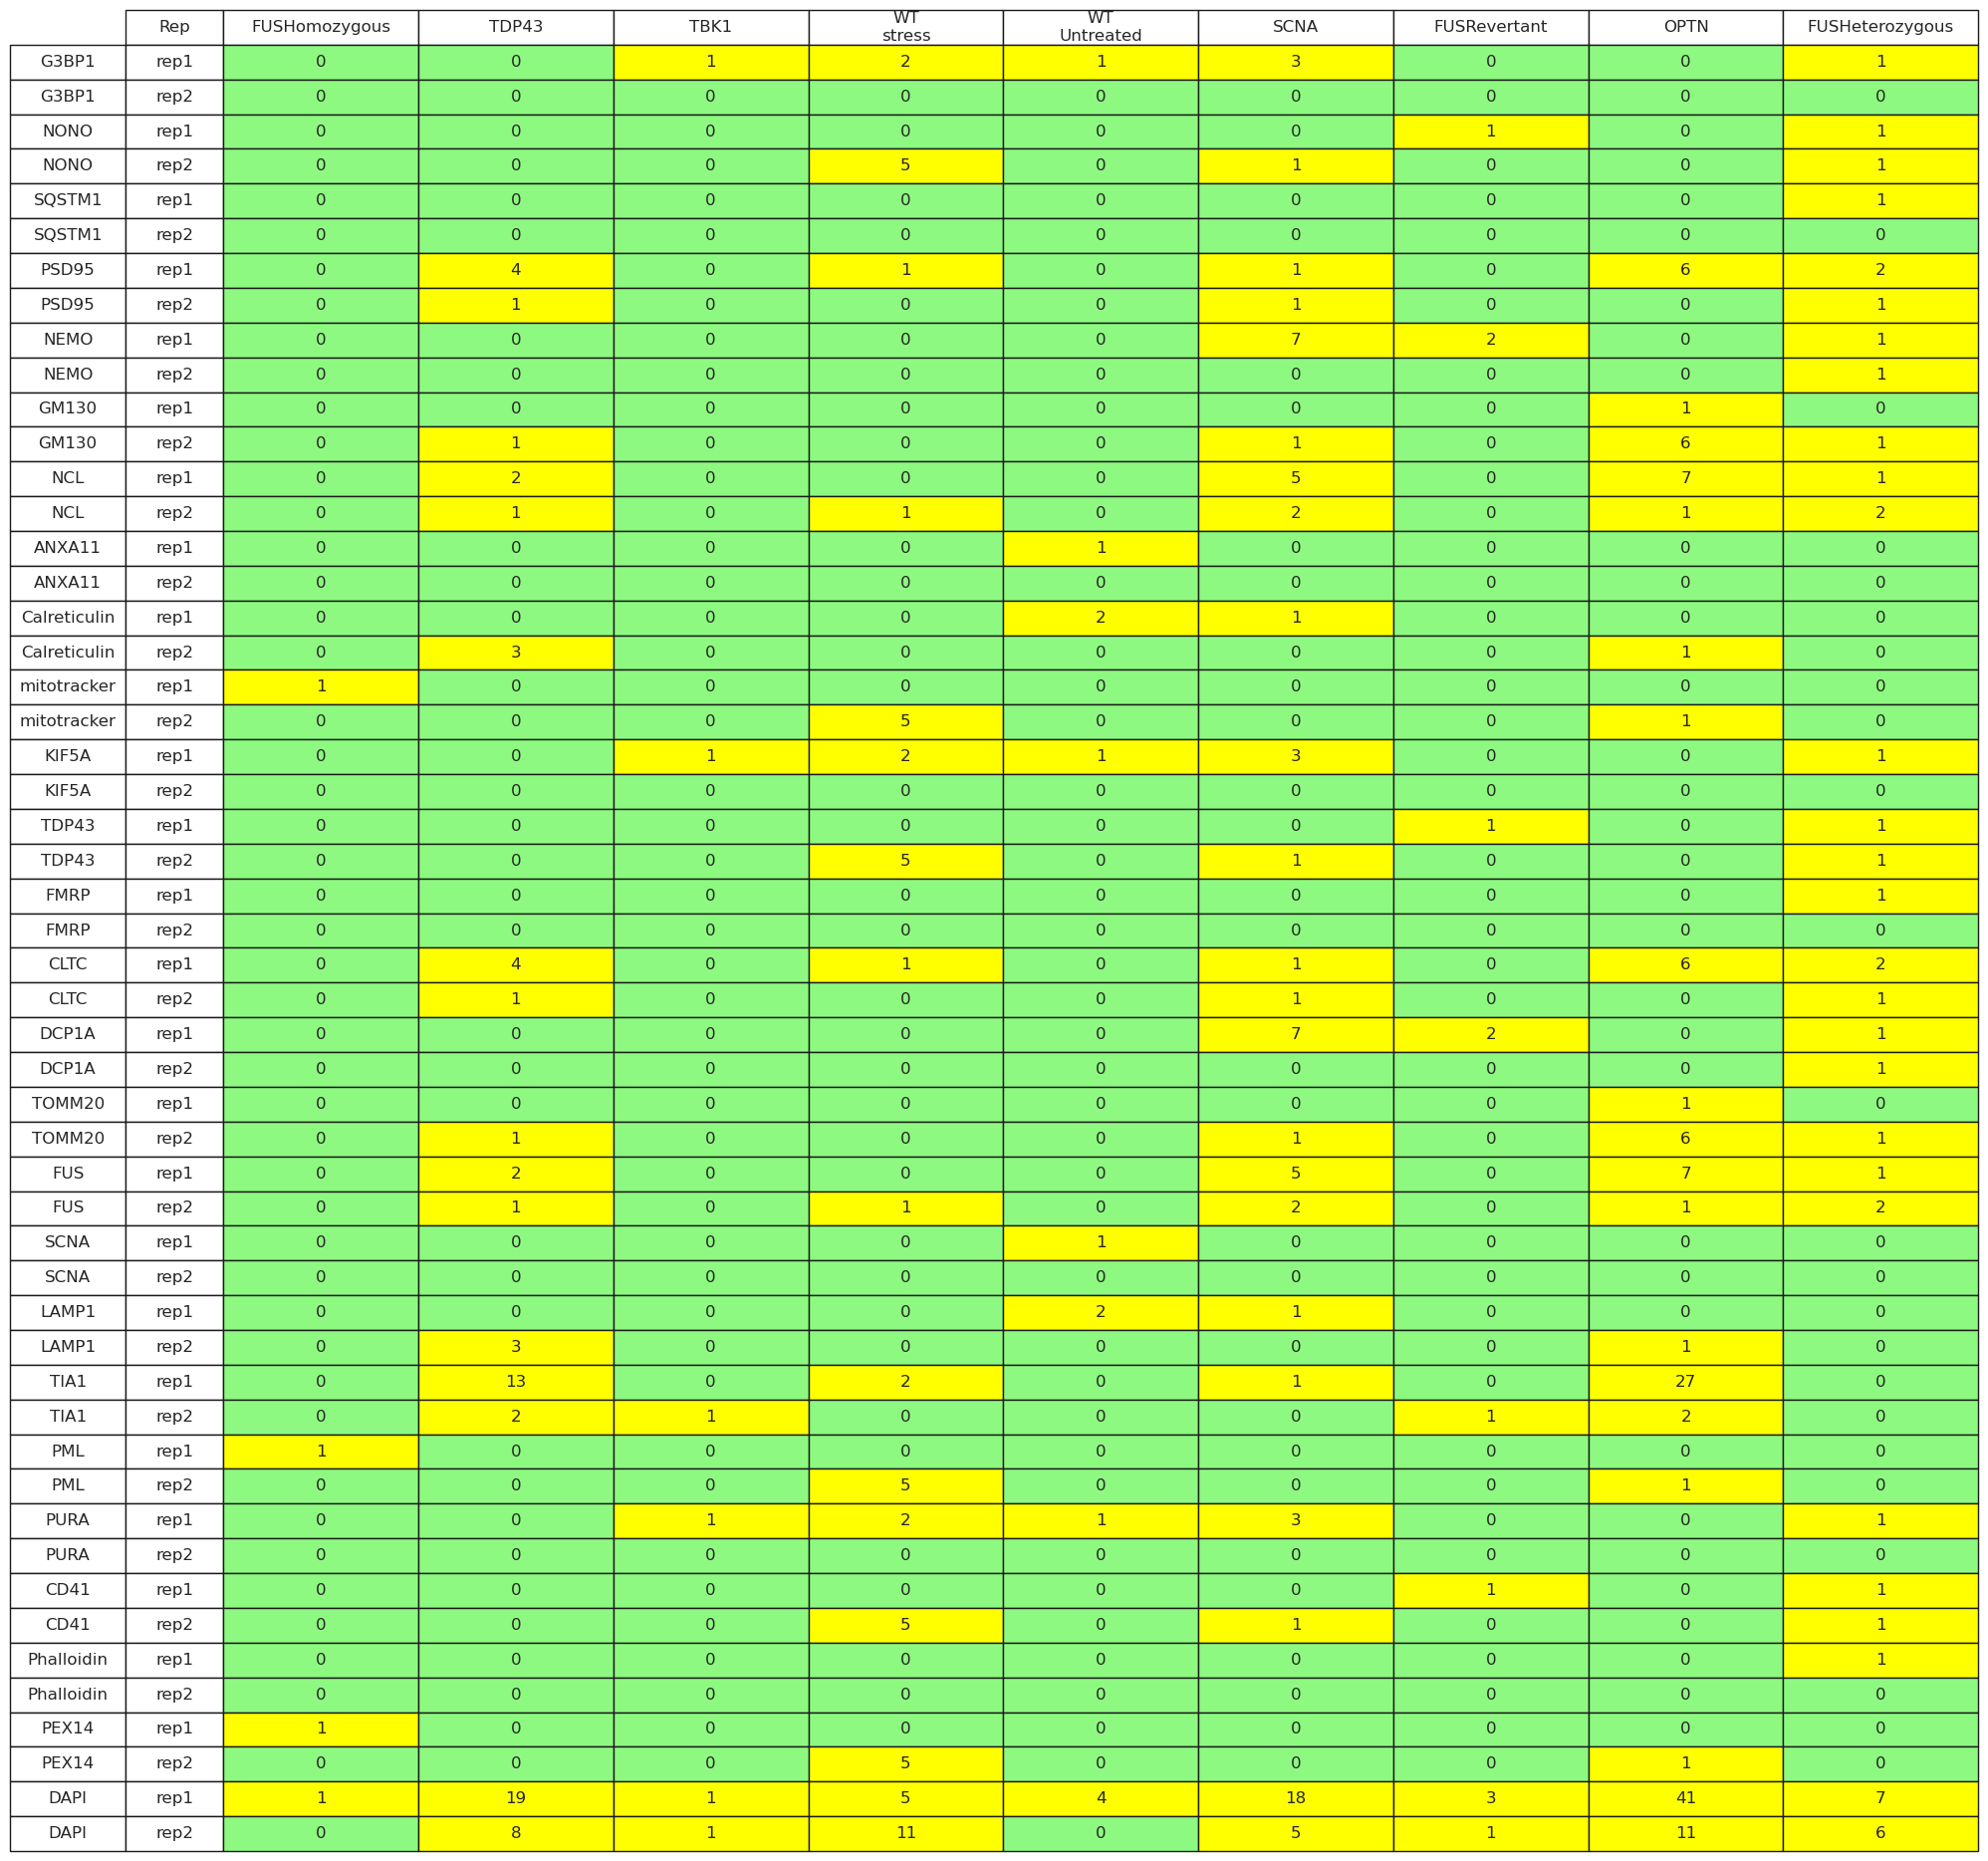

batch9_16bit


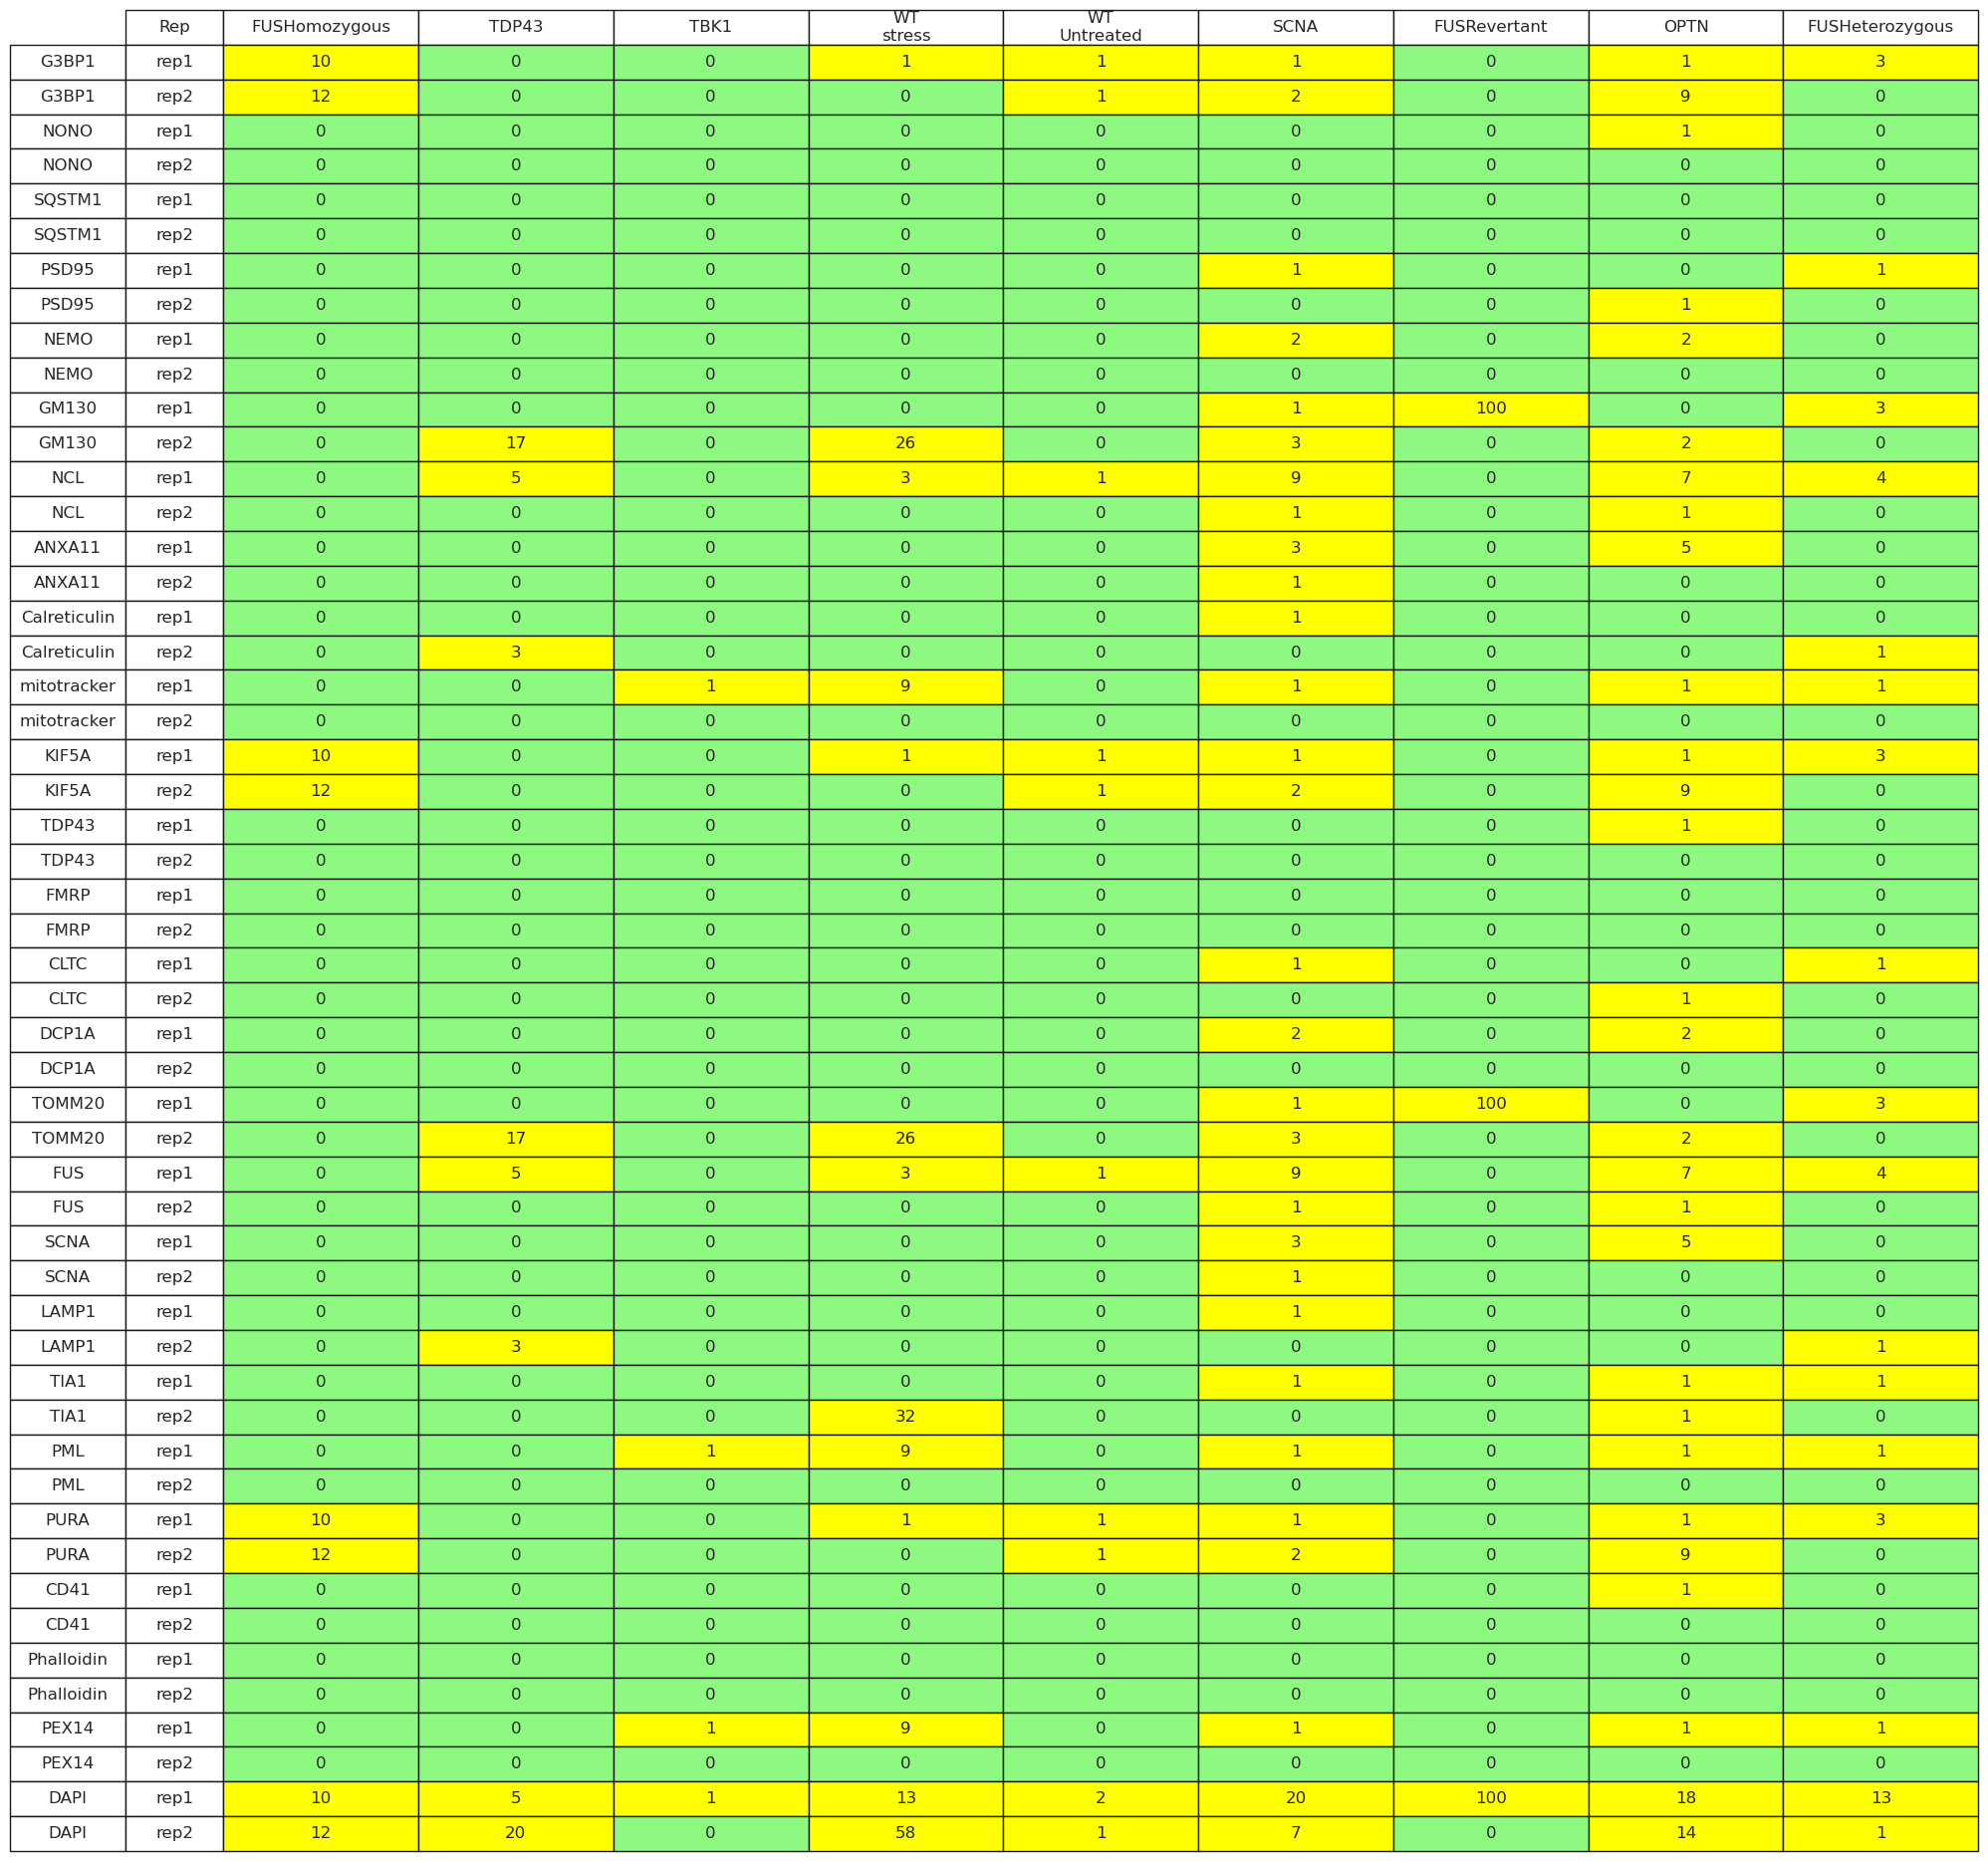

In [7]:
display_diff(batches, raws, procs, PLOT_PATH)

In [8]:
#for batch in list(range(3,9)) + ['7_16bit','8_16bit','9_16bit']: #problem with batch9: files that are 1 bytes!!!  
for batch in batches:
    with contextlib.redirect_stdout(io.StringIO()):
        var = sample_and_calc_variance(root_directory_proc, batch, 
                                       sample_size_per_markers=200, num_markers=26)
    print(f'{batch} var: ',var)

batch3 var:  0.008985111296753657
batch4 var:  0.008880271202628397
batch5 var:  0.008852531288291467
batch6 var:  0.012080989034861656
batch7_16bit var:  0.009464436044567284
batch8_16bit var:  0.009771102240117274
batch9_16bit var:  0.009595055522565177



# <font color='red'>Number of sites in each batch and cell line </font>


In [20]:
df[df.filename=='R11_w2confmCherry_s426']

index       DATETIME                filename   batch        cell_line  \
20727     927  060823_173914  R11_w2confmCherry_s426  batch3    FUSHomozygous   
20718     918  060823_173910  R11_w2confmCherry_s426  batch3    FUSHomozygous   
20736     936  060823_173918  R11_w2confmCherry_s426  batch3    FUSHomozygous   
19859      59  060823_173147  R11_w2confmCherry_s426  batch3    FUSHomozygous   
20585     785  060823_173720  R11_w2confmCherry_s426  batch3    FUSHomozygous   
118741    134  280723_125707  R11_w2confmCherry_s426  batch4    FUSHomozygous   
118749    142  280723_125712  R11_w2confmCherry_s426  batch4    FUSHomozygous   
118751    144  280723_125713  R11_w2confmCherry_s426  batch4    FUSHomozygous   
118731    124  280723_125702  R11_w2confmCherry_s426  batch4    FUSHomozygous   
119966   1359  280723_131141  R11_w2confmCherry_s426  batch4    FUSHomozygous   
119861   1254  280723_131040  R11_w2confmCherry_s426  batch4    FUSHomozygous   
119779   1172  280723_130938  R11_w2confmCherry_s426  batch4    FUSHomozygous   
119763   1156  280723_130921  R11_w2confmCherry_s426  batch4    FUSHomozygous   
119764   1157  280723_130921  R11_w2confmCherry_s426  batch4    FUSHomozygous   
38030    1165  280723_143356  R11_w2confmCherry_s426  batch5    FUSHomozygous   
38038    1173  280723_143410  R11_w2confmCherry_s426  batch5    FUSHomozygous   
38054    1189  280723_143419  R11_w2confmCherry_s426  batch5    FUSHomozygous   
36996     131  280723_141858  R11_w2confmCherry_s426  batch5    FUSHomozygous   
37001     136  280723_141904  R11_w2confmCherry_s426  batch5    FUSHomozygous   
37007     142  280723_141906  R11_w2confmCherry_s426  batch5    FUSHomozygous   
37006     141  280723_141905  R11_w2confmCherry_s426  batch5    FUSHomozygous   
37004     139  280723_141905  R11_w2confmCherry_s426  batch5    FUSHomozygous   
38147    1282  280723_143536  R11_w2confmCherry_s426  batch5    FUSHomozygous   
38154    1289  280723_143542  R11_w2confmCherry_s426  batch5    FUSHomozygous   
90393    4971  120723_015755  R11_w2confmCherry_s426  batch6             SCNA   
78305    1840  110723_225637  R11_w2confmCherry_s426  batch6            TDP43   
78311    1846  110723_225641  R11_w2confmCherry_s426  batch6            TDP43   
113231  14424  030823_202218  R11_w2confmCherry_s426  batch6     FUSRevertant   
101143   2336  030823_174658  R11_w2confmCherry_s426  batch6            TDP43   
101148   2341  030823_174700  R11_w2confmCherry_s426  batch6            TDP43   
101147   2340  030823_174659  R11_w2confmCherry_s426  batch6            TDP43   
59006    2341  270723_142844  R11_w2confmCherry_s426  batch7            TDP43   
59003    2338  270723_142843  R11_w2confmCherry_s426  batch7            TDP43   
59002    2337  270723_142842  R11_w2confmCherry_s426  batch7            TDP43   
58999    2334  270723_142842  R11_w2confmCherry_s426  batch7            TDP43   
59000    2335  270723_142842  R11_w2confmCherry_s426  batch7            TDP43   
61200    4535  270723_150137  R11_w2confmCherry_s426  batch7             TBK1   
74405   17740  270723_181054  R11_w2confmCherry_s426  batch7  FUSHeterozygous   
148581   8934  300723_192232  R11_w2confmCherry_s426  batch8             SCNA   
36530    2335  300723_170436  R11_w2confmCherry_s426  batch8            TDP43   
36531    2336  300723_170436  R11_w2confmCherry_s426  batch8            TDP43   
36538    2343  300723_170439  R11_w2confmCherry_s426  batch8            TDP43   
36533    2338  300723_170436  R11_w2confmCherry_s426  batch8            TDP43   
36532    2337  300723_170436  R11_w2confmCherry_s426  batch8            TDP43   
2343     2343  310723_200631  R11_w2confmCherry_s426  batch9            TDP43   
2339     2339  310723_200628  R11_w2confmCherry_s426  batch9            TDP43   
2330     2330  310723_200622  R11_w2confmCherry_s426  batch9            TDP43   
2334     2334  310723_200626  R11_w2confmCherry_s426  batch9            TDP43   
2336     2336  310723_200628  R11_w2con

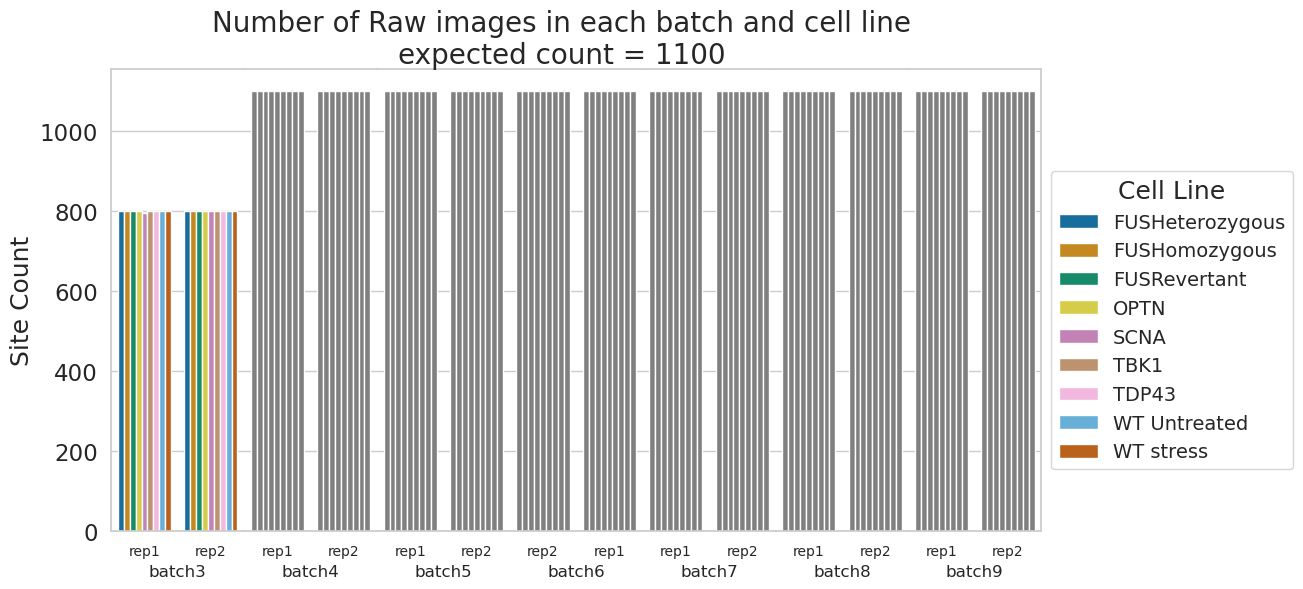

In [13]:
df_no_per = df[df.batch!='Perturbations']
plot_sites_count(df_no_per, expected_raw, lines_order, custom_palette, split_to_reps=True)

# <font color='red'>Number of Cells in Site for each batch and cell line </font>

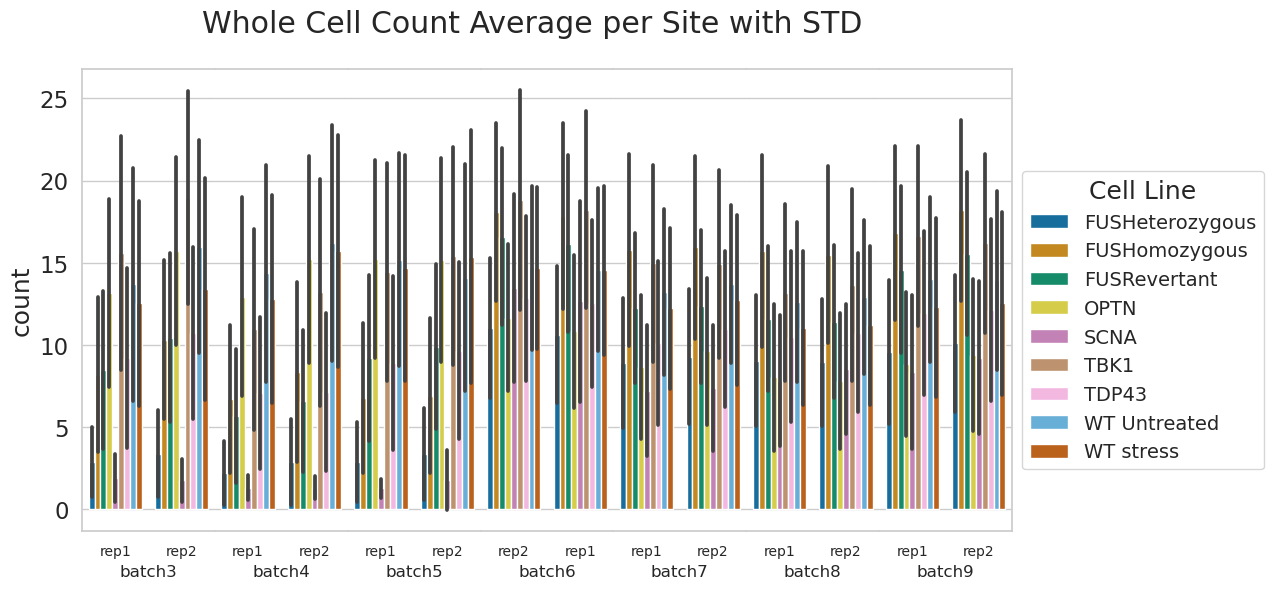

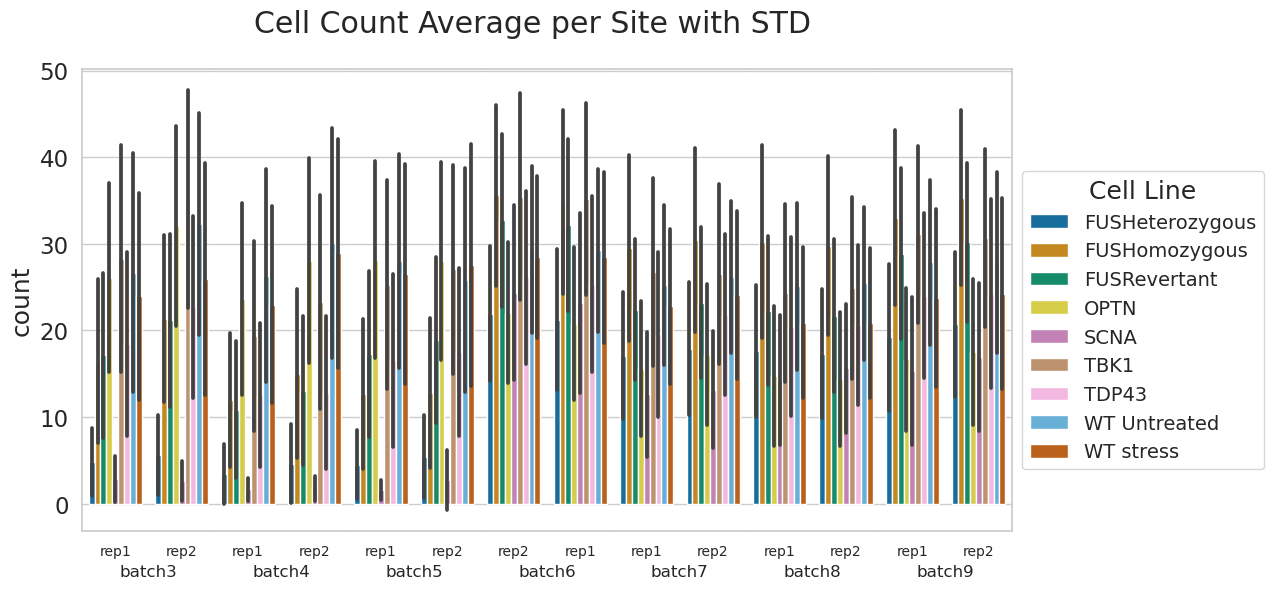

In [11]:
df_no_empty_sites = df_no_per[df_no_per.n_valid_tiles !=0]
plot_cell_count(df_no_empty_sites, lines_order, custom_palette, whole_cells=True)

plot_cell_count(df_no_empty_sites, lines_order, custom_palette, whole_cells=False)
# can add norm=True to norm by max

In [6]:
df.cells_counts_list

83194    [0, 2, 1, 0, 3, 0, 0, 1, 1, 2, 0, 1, 4, 1, 0, 2]
83581    [2, 5, 1, 2, 1, 2, 0, 1, 4, 1, 0, 3, 4, 3, 0, 2]
83582    [0, 1, 3, 2, 1, 3, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0]
83583    [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0]
83584    [4, 2, 1, 5, 3, 2, 0, 0, 5, 4, 2, 5, 2, 2, 3, 1]
                               ...                       
13204    [1, 1, 3, 1, 2, 1, 5, 2, 2, 2, 5, 0, 1, 2, 1, 0]
13205    [1, 3, 1, 0, 2, 4, 1, 1, 3, 2, 1, 2, 3, 2, 3, 2]
13206    [1, 0, 1, 0, 0, 0, 3, 2, 2, 2, 1, 1, 1, 1, 1, 0]
13199    [0, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1]
0        [1, 0, 2, 1, 1, 1, 0, 5, 2, 0, 0, 0, 1, 3, 1, 2]
Name: cells_counts_list, Length: 136396, dtype: object


# <font color='blue'>number of valid tiles per image (site)</font>


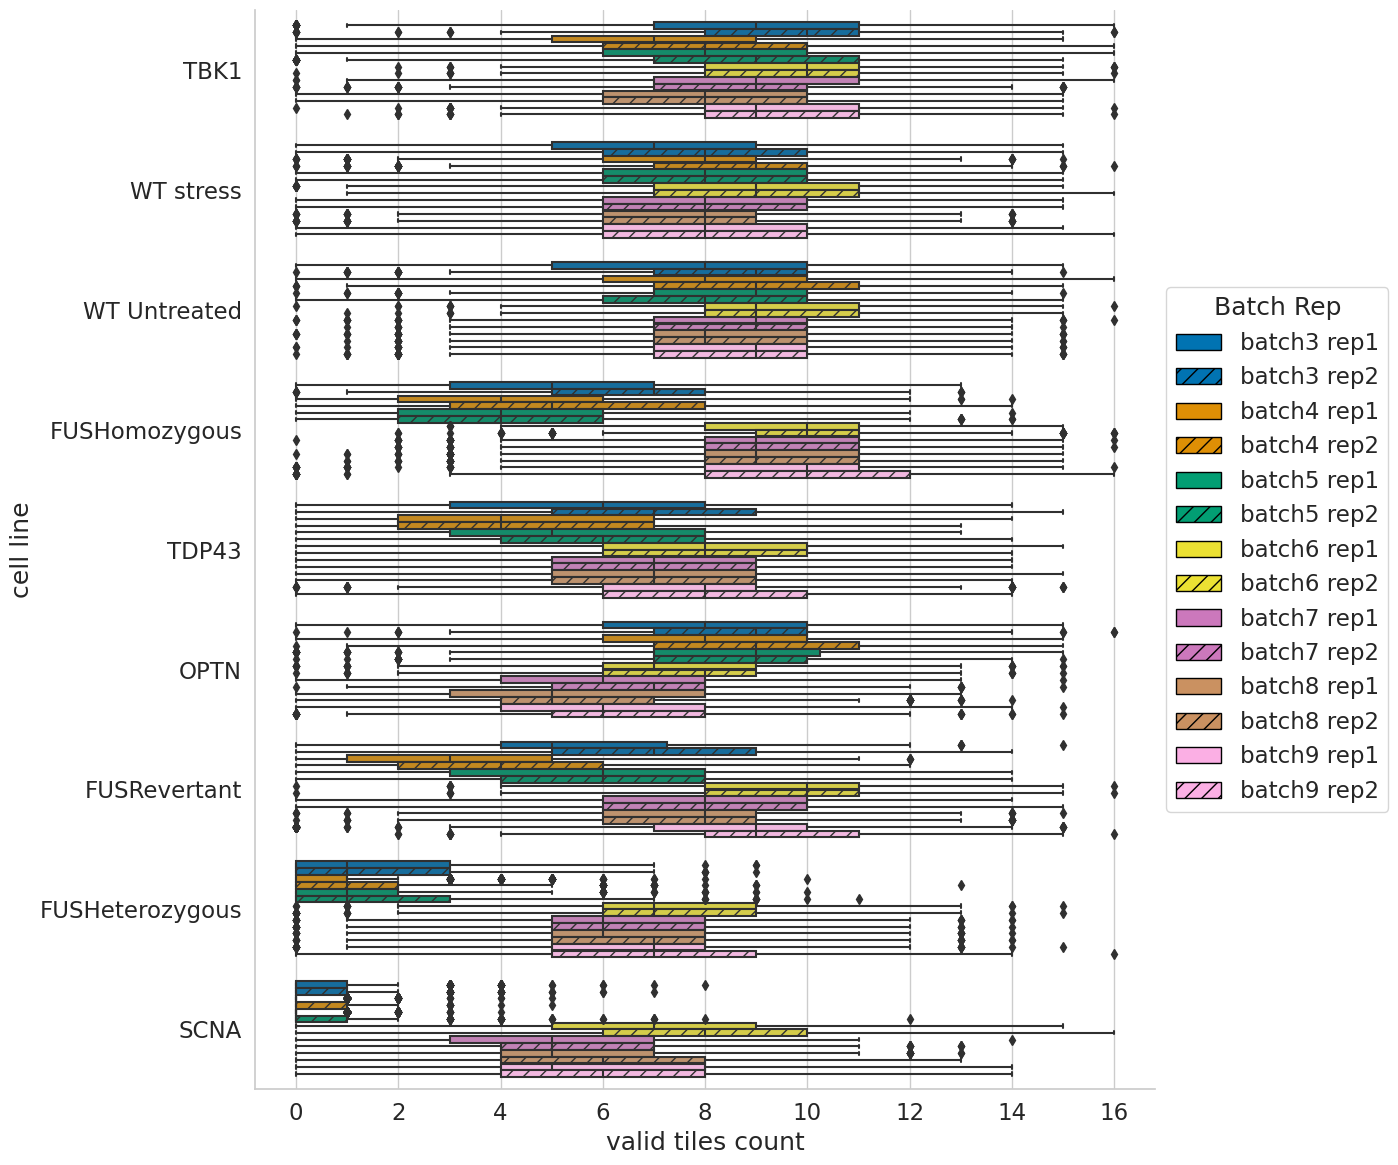

In [12]:
plot_n_valid_tiles_count(df_no_per, custom_palette,reps, batch_min=3, batch_max=9)

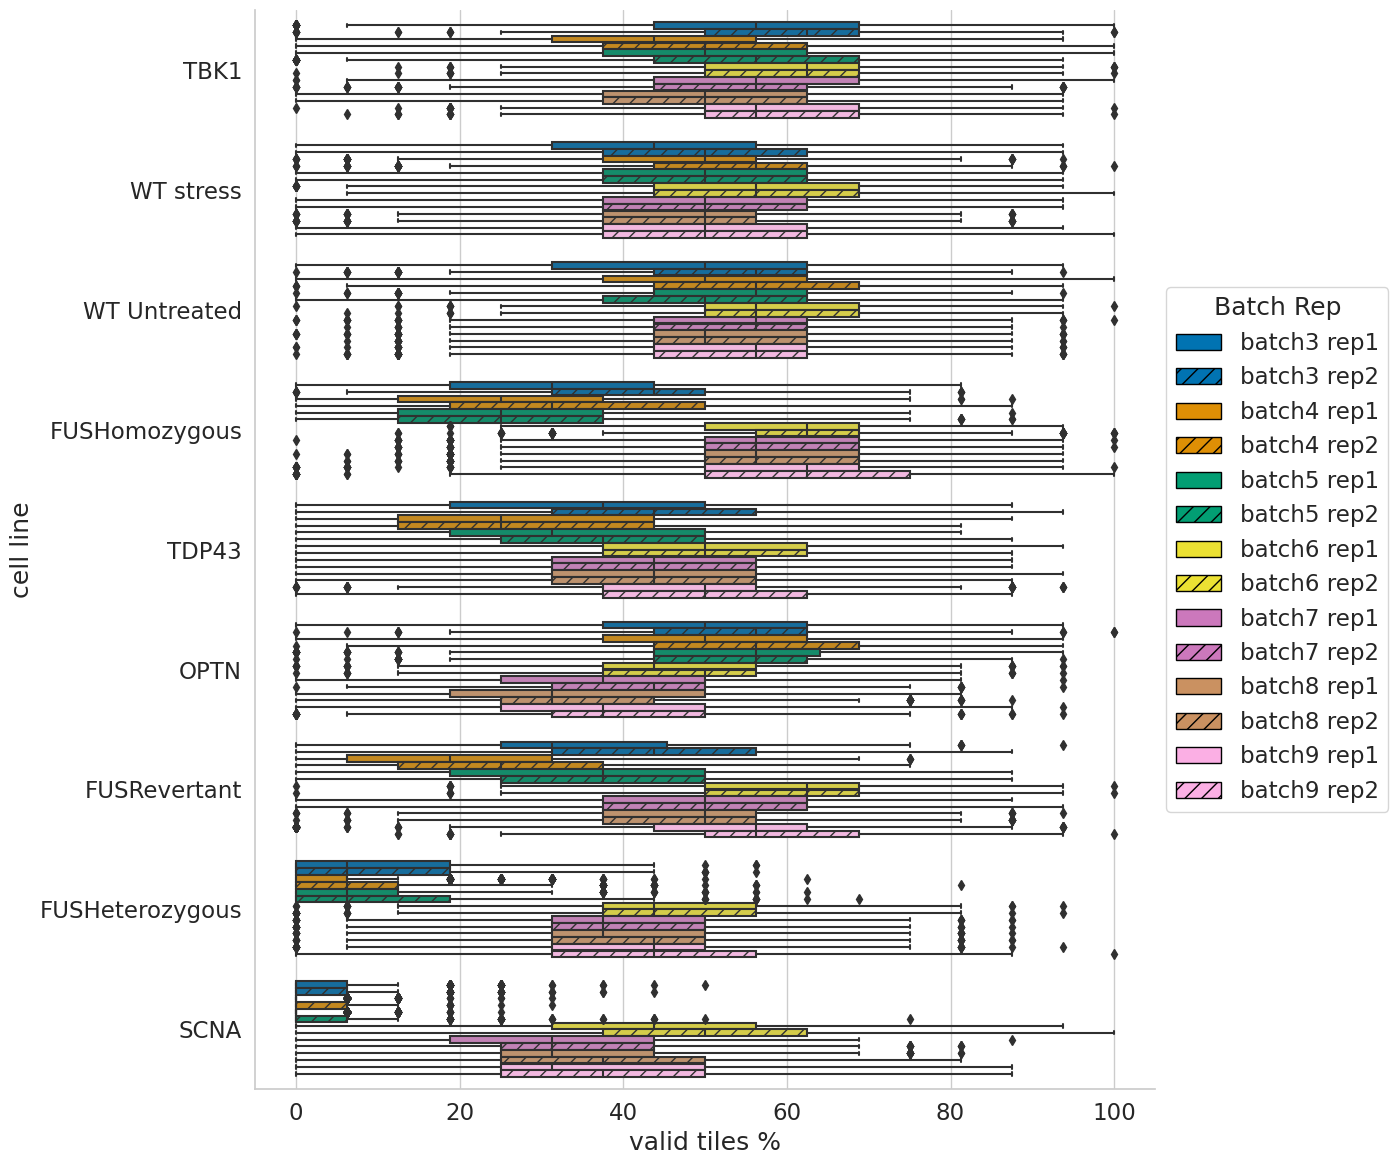

In [21]:
plot_p_valid_tiles_count(df_no_per, custom_palette,reps, batch_min=3, batch_max=9)


## <font color='purple'>Heatmap QC per batch, panel and cell line(tiles that passed QC condition)  </font>


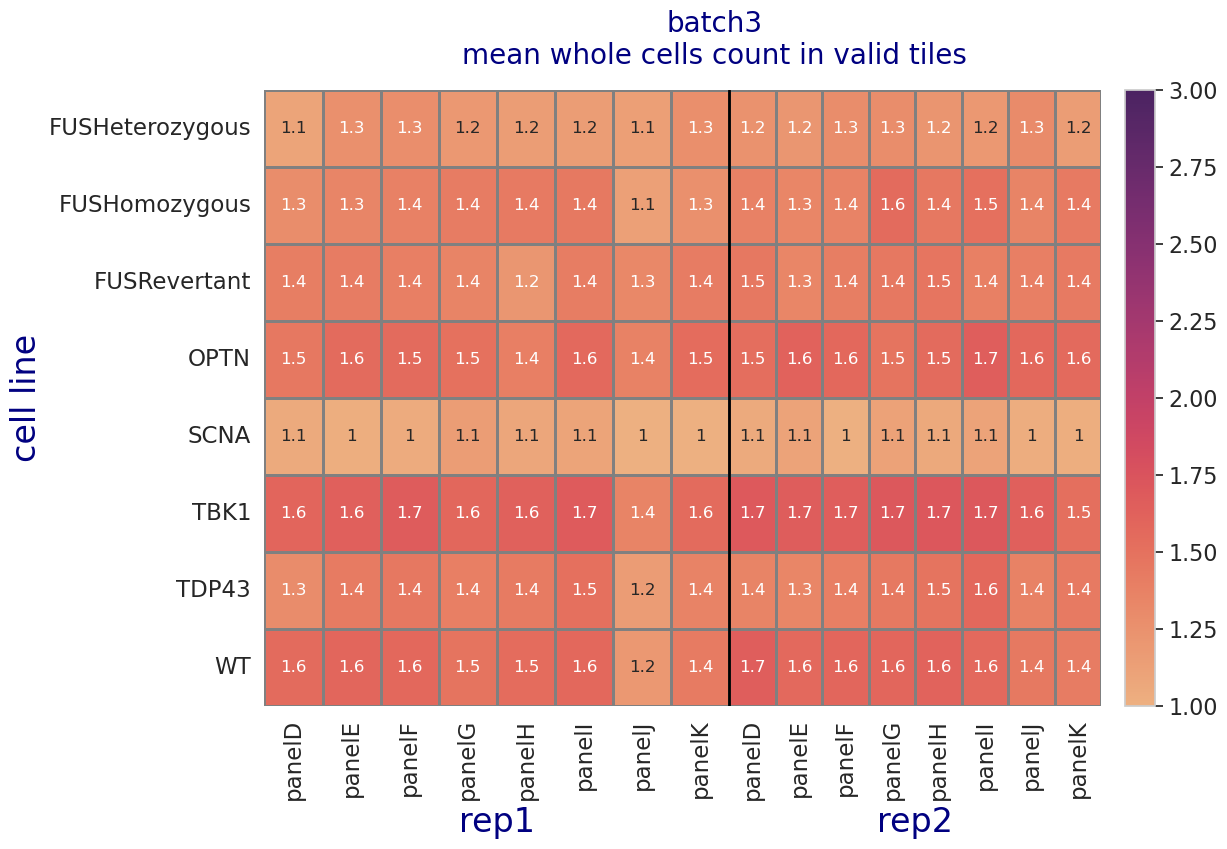

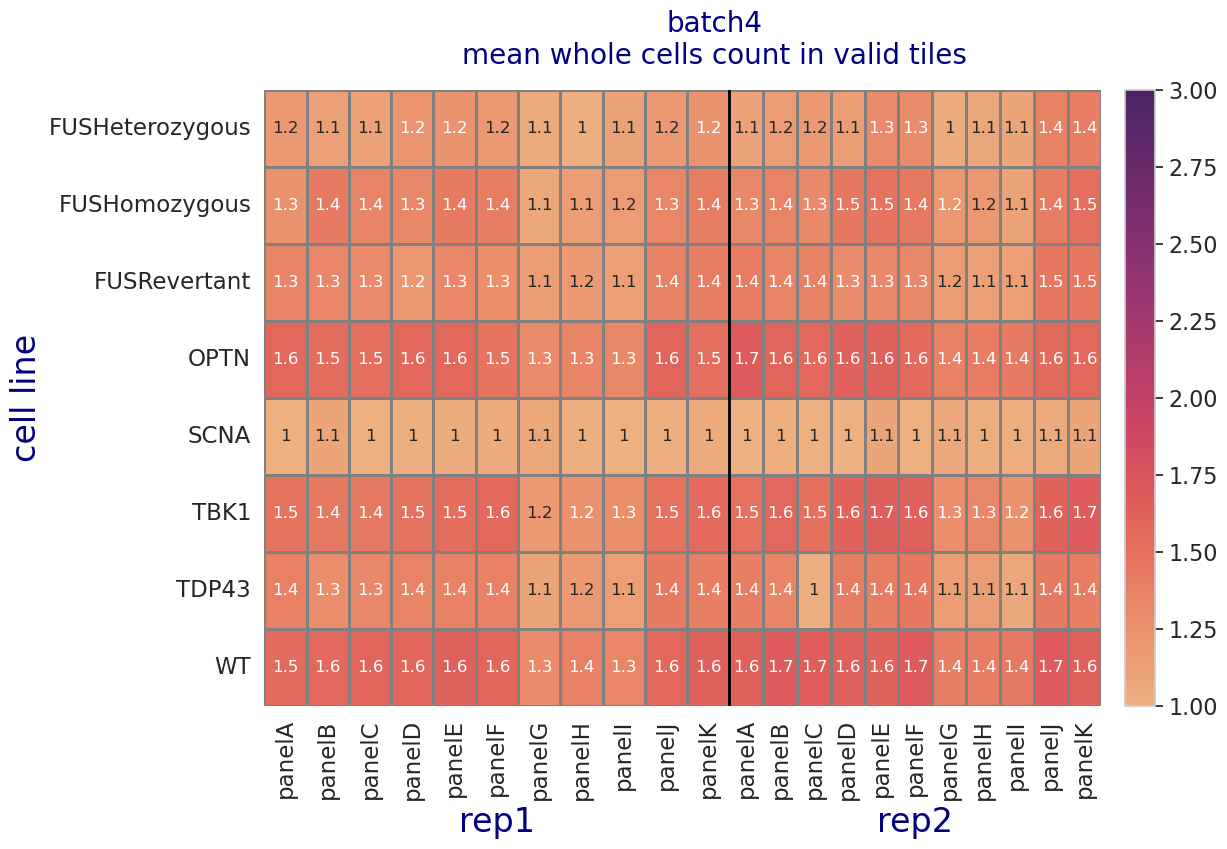

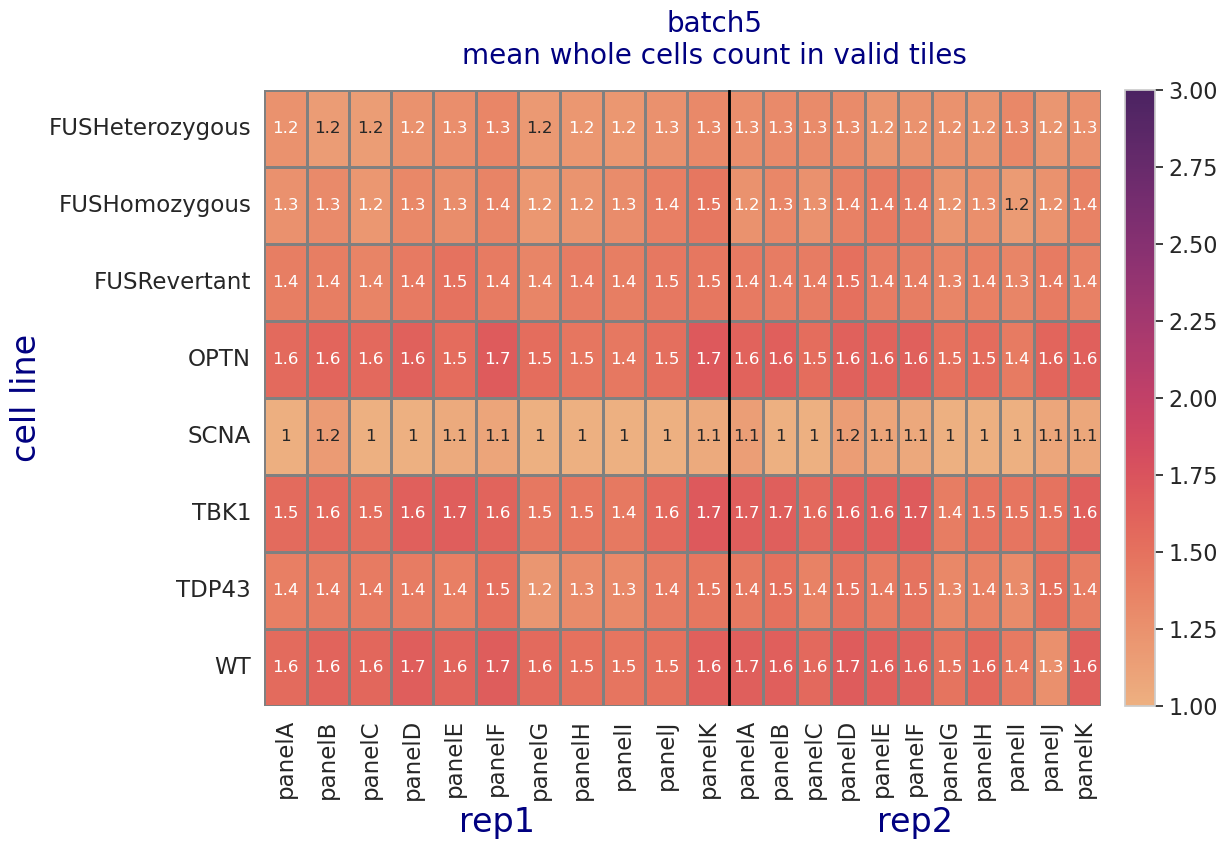

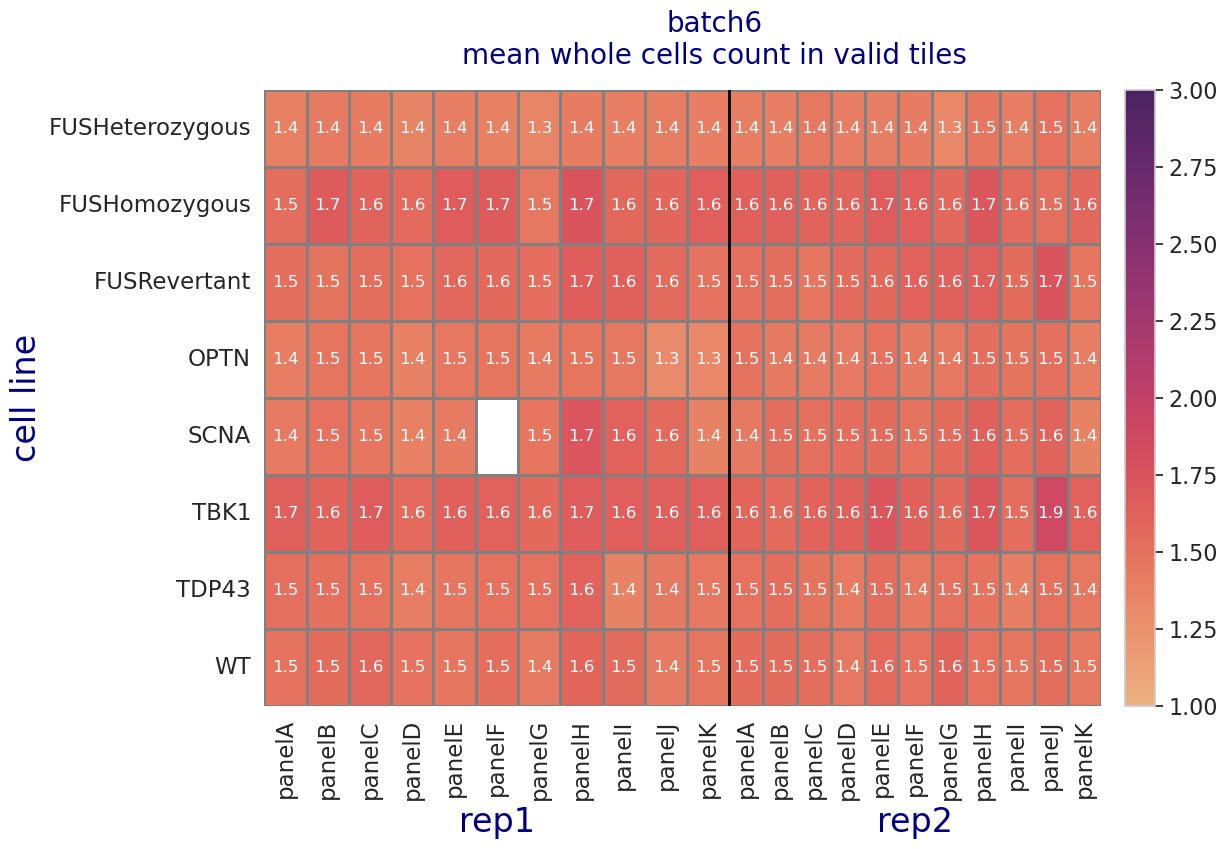

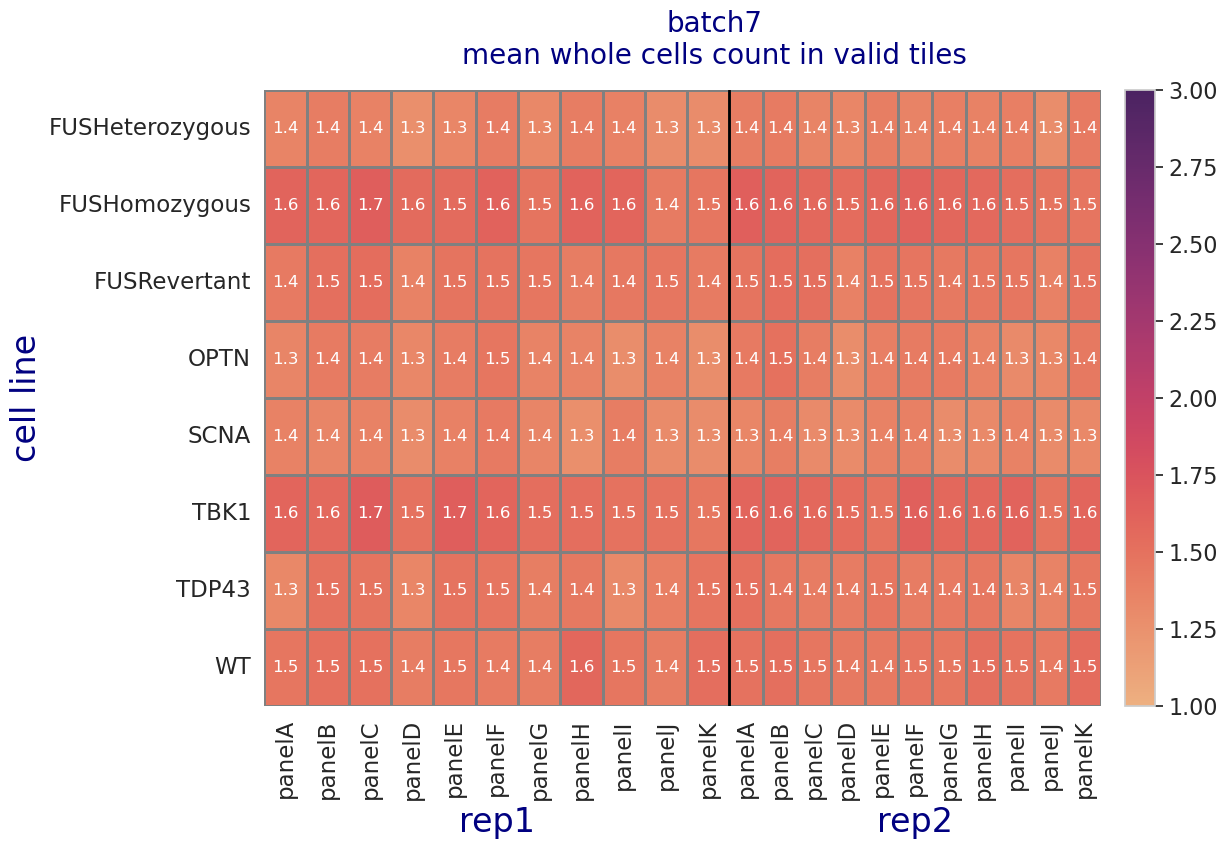

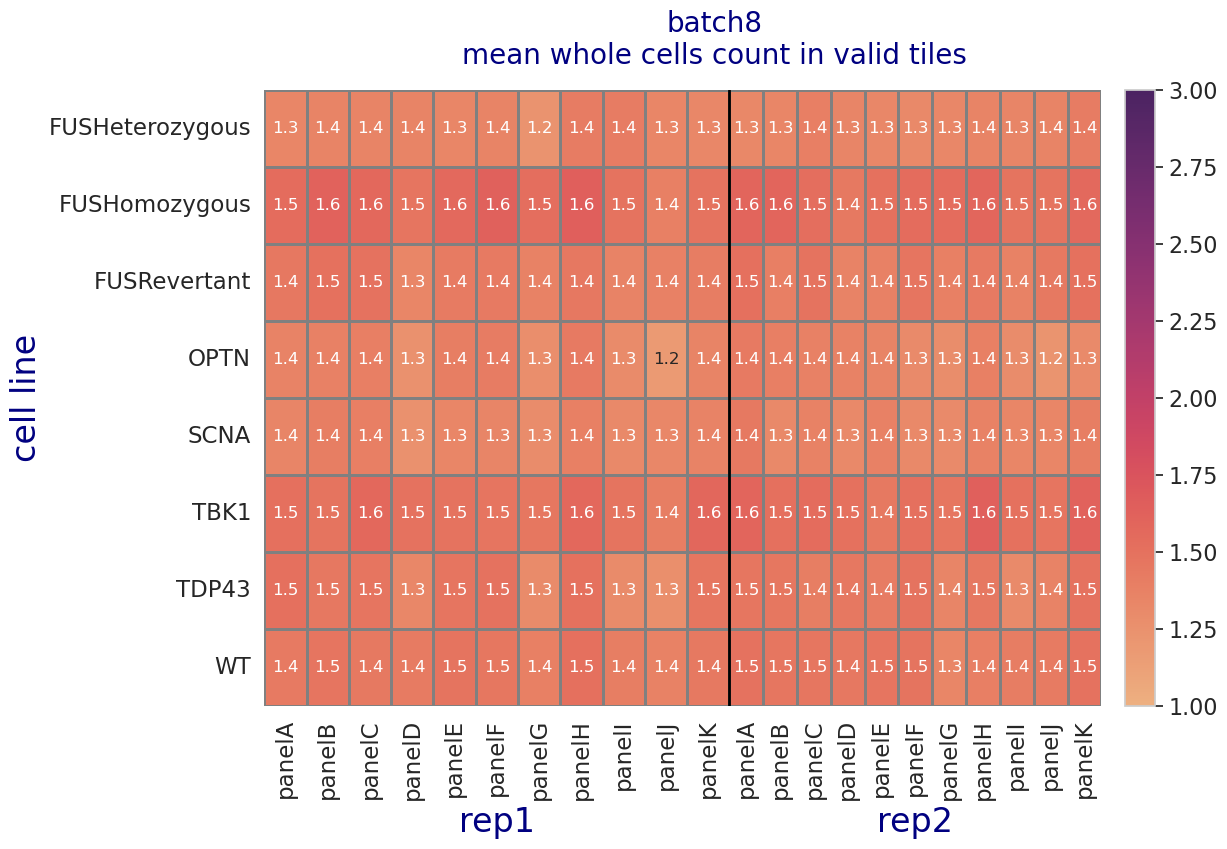

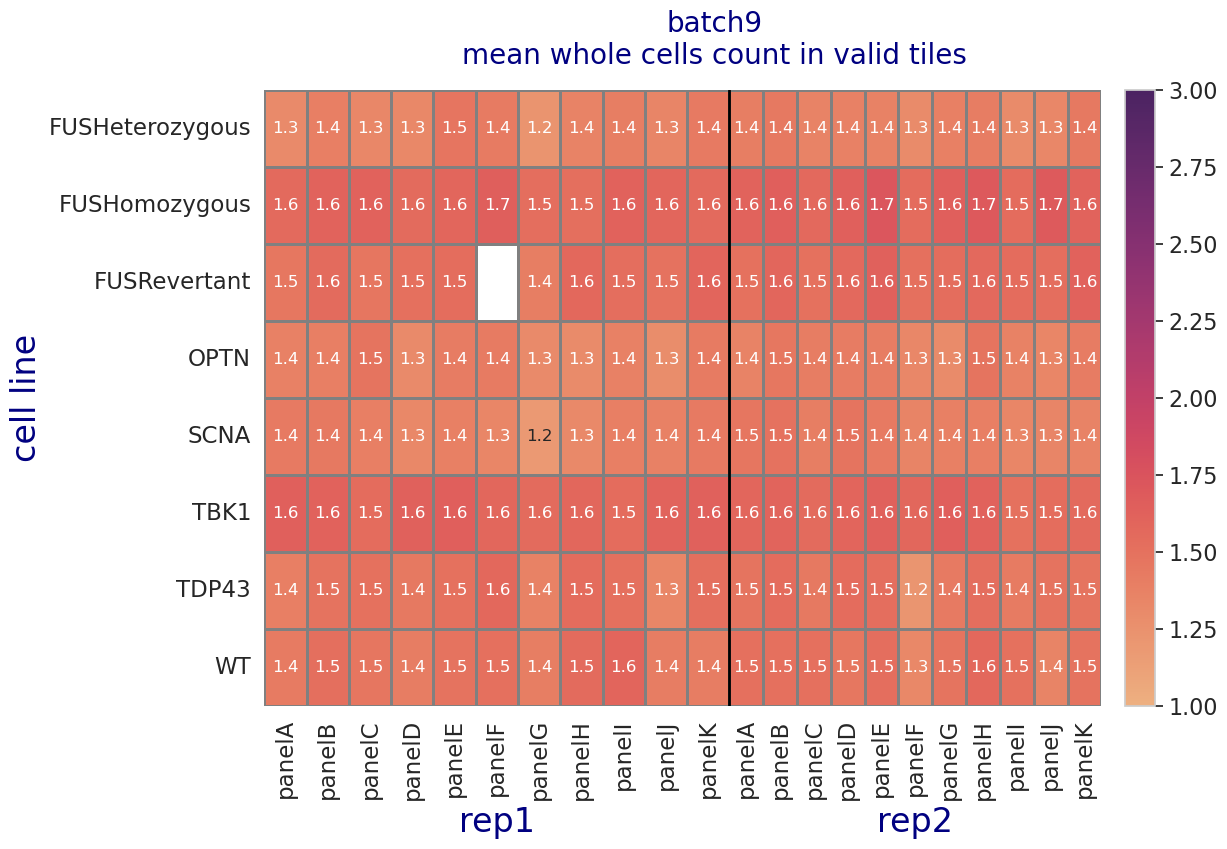

In [13]:
plot_hm(df_no_per, split_by='rep', rows='cell_line', columns='panel')

# Assessing Staining Reproducibility and Outliers

batch4


/home/labs/hornsteinlab/Collaboration/MOmaps_Noam/MOmaps/src/common/lib/images_qc.py:732: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


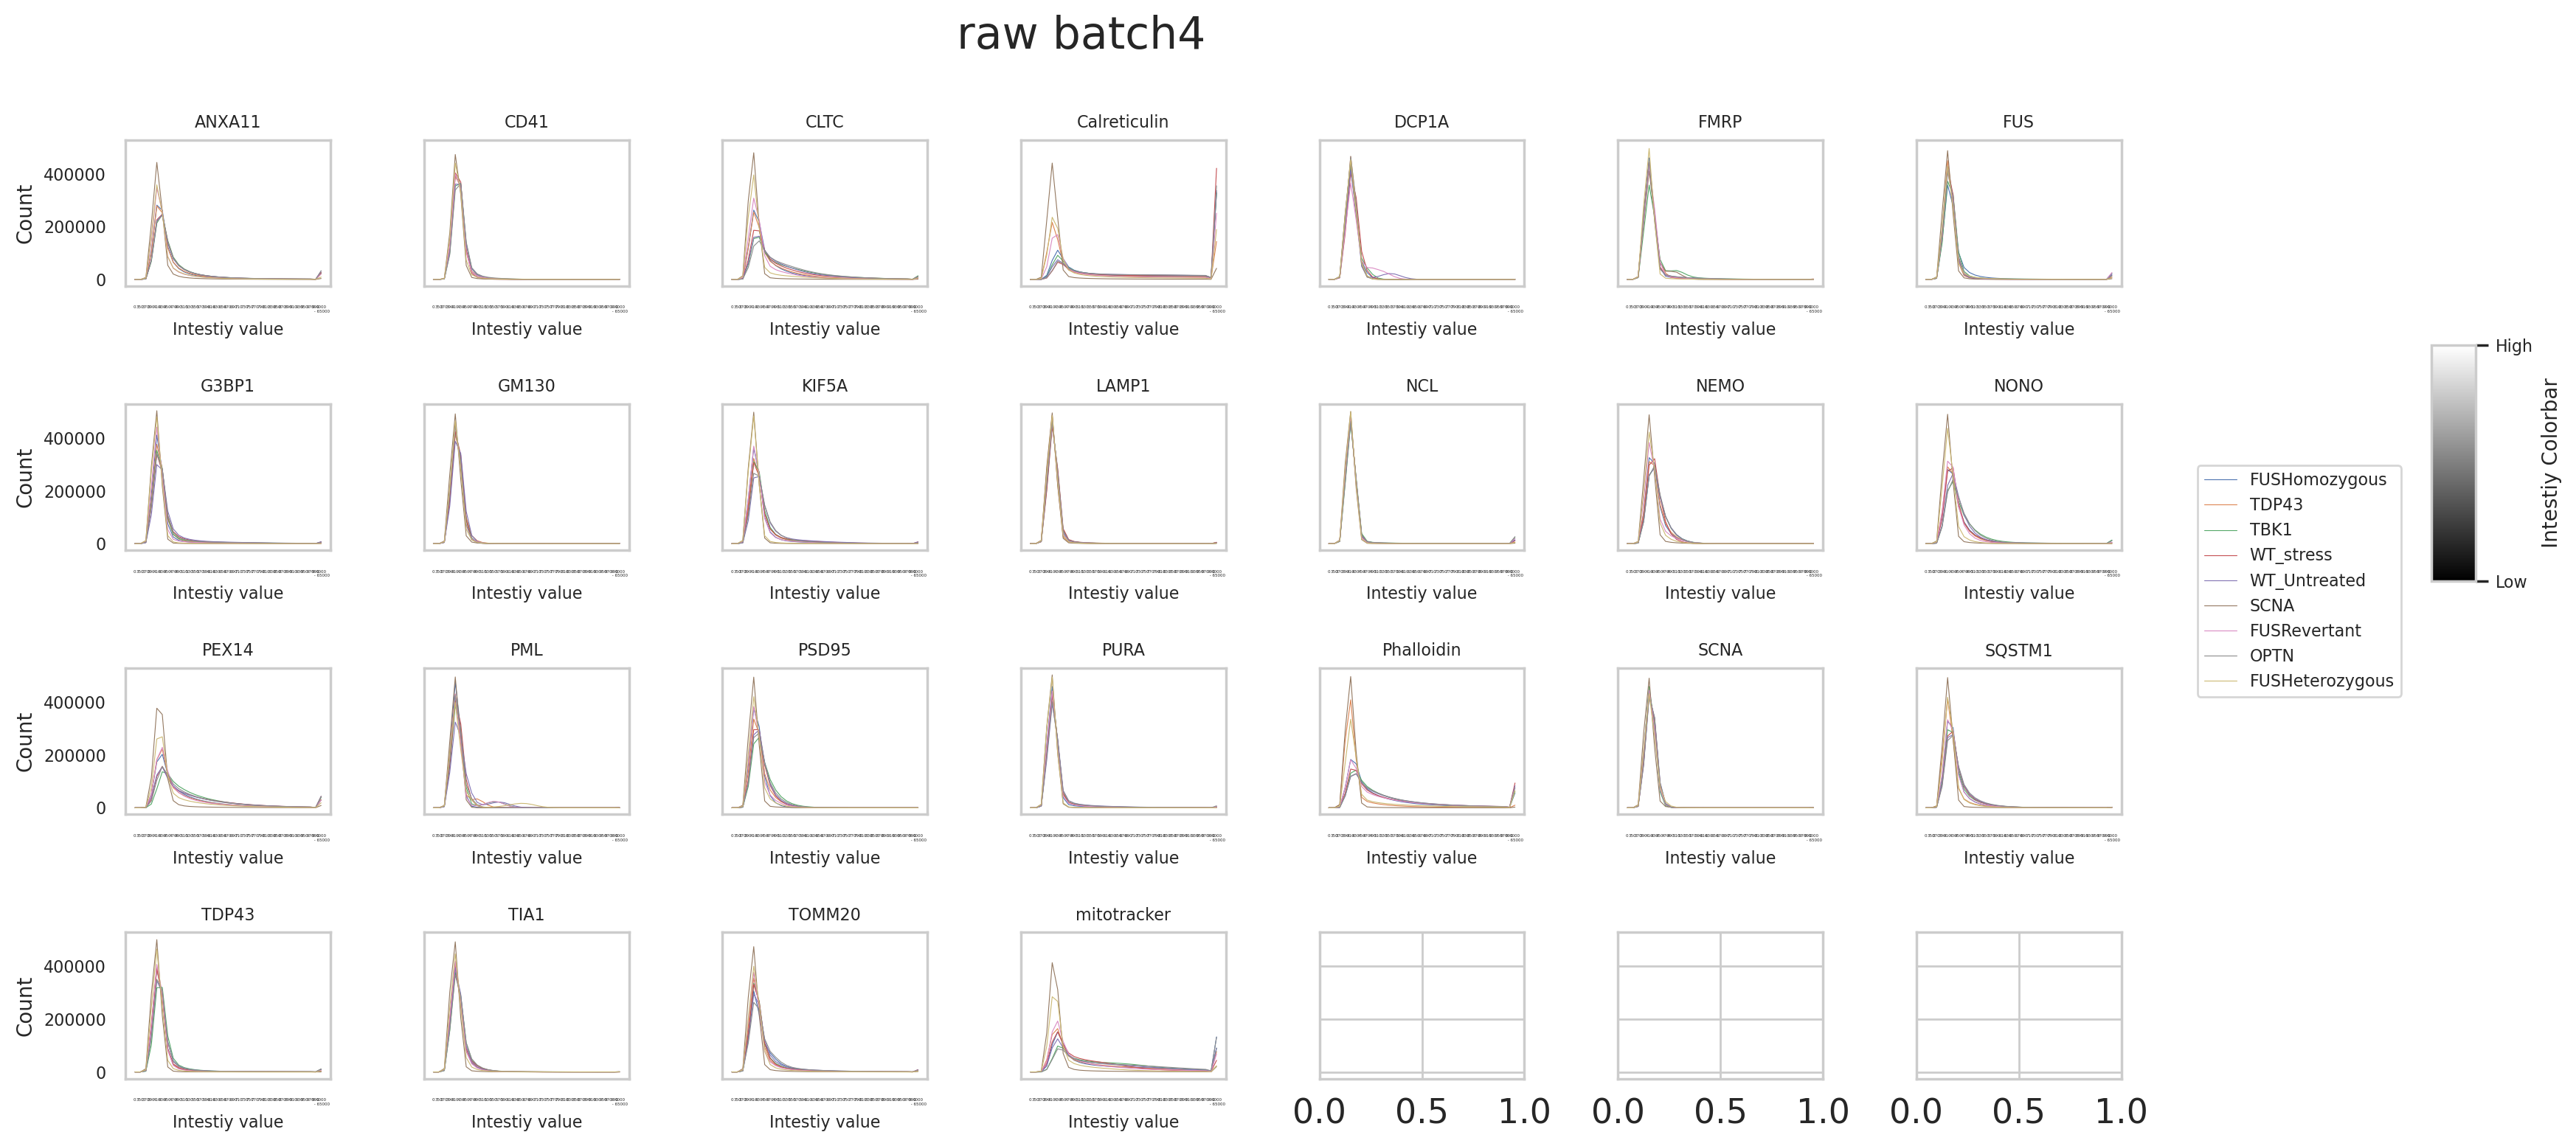

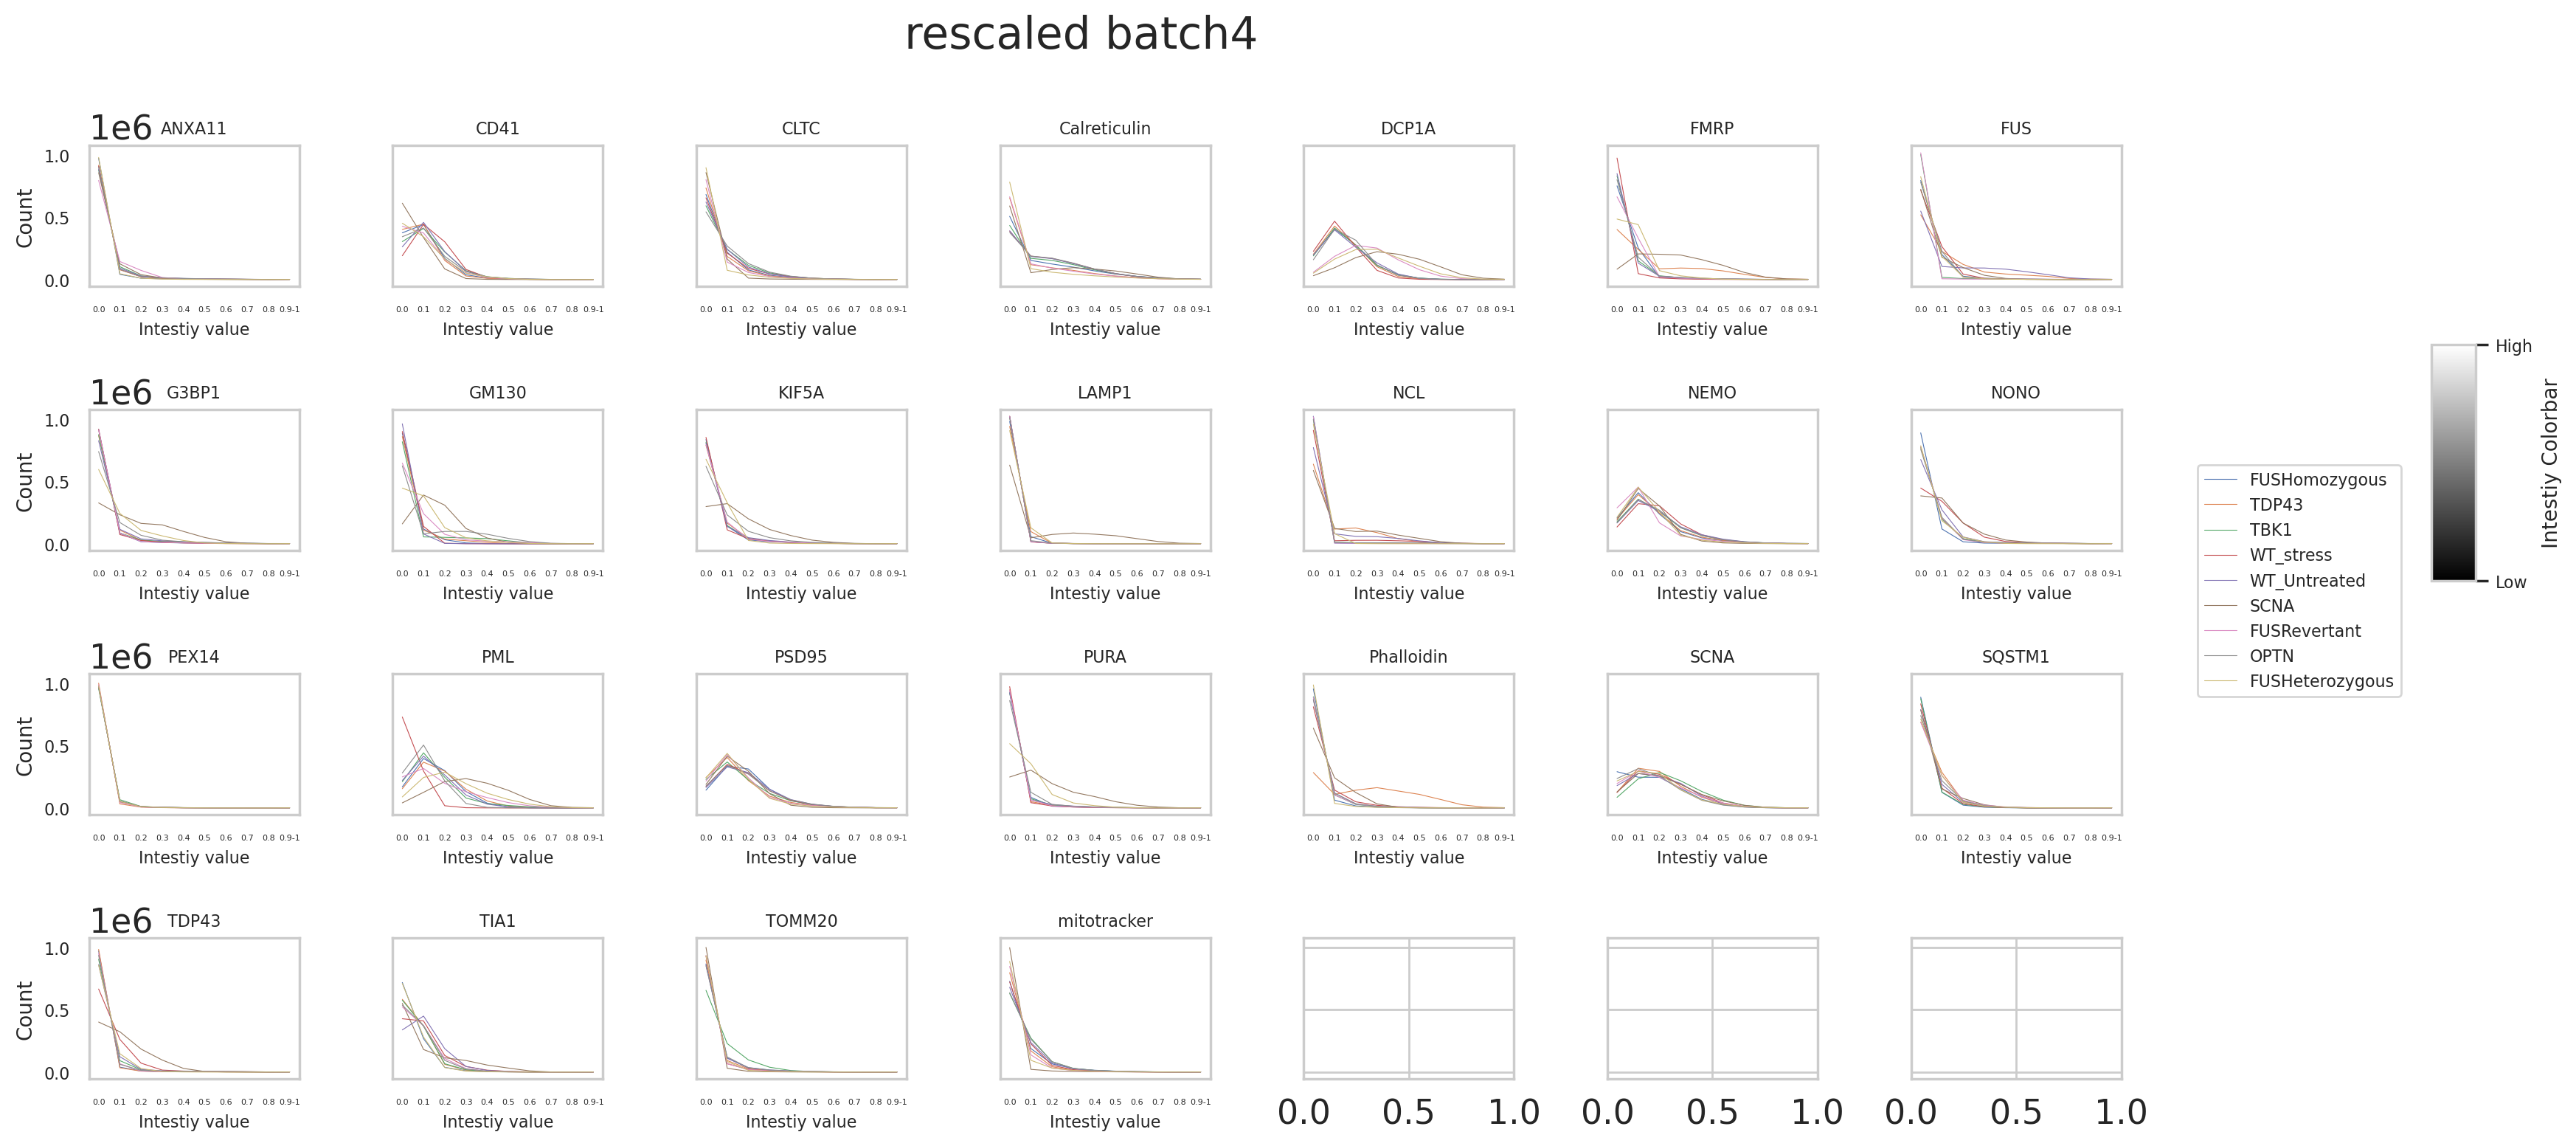

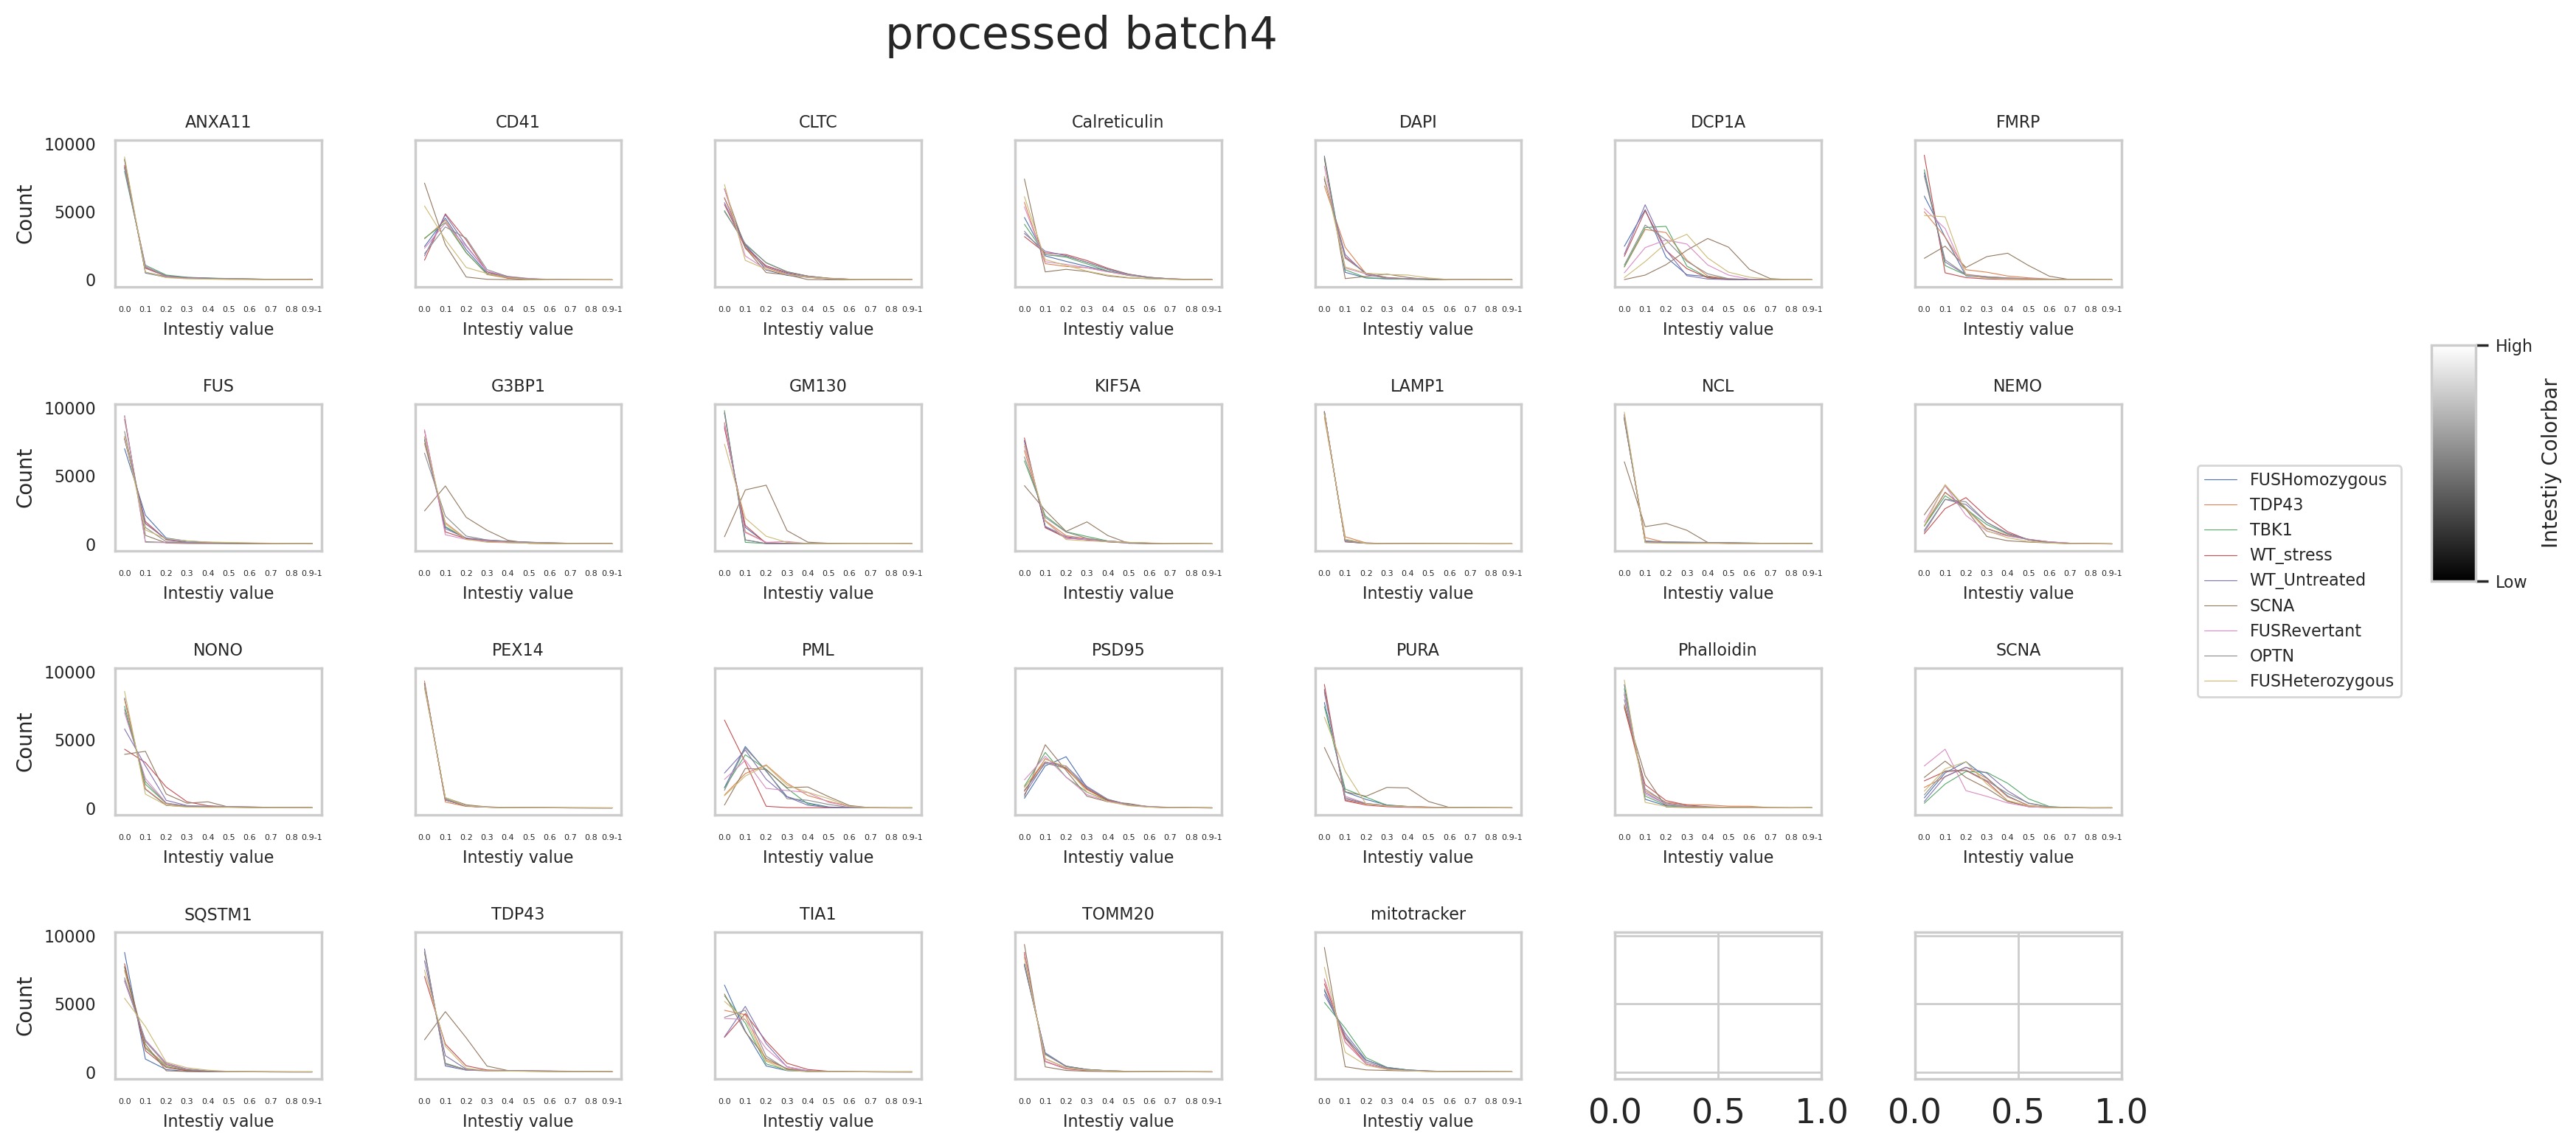

In [15]:
#for batch in batches:
for batch in ['batch4']:
    print(batch)
    #batch_num = batch.replace('batch',"")
    run_calc_hist_new(batch,cell_lines_for_disp, markers, ncols=7, nrows=4,
                           hist_sample=10,sample_size_per_markers=200)
    print("="*30)

In [6]:
# save notebook as HTML ( the HTML will be saved in the same folder the original script is)
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))
os.system('jupyter nbconvert --to html src/preprocessing/notebooks/cell_count_stats_analysis.ipynb')

<IPython.core.display.Javascript object>

[NbConvertApp] Converting notebook src/preprocessing/notebooks/cell_count_stats_analysis.ipynb to html
[NbConvertApp] Writing 11538818 bytes to src/preprocessing/notebooks/cell_count_stats_analysis.html


0

In [10]:
df[df.batch=='batch9'].n_valid_tiles.sum()

155477